# Feature Selection and Initial Cleaning

For the initial feature selection and cleaning, I go column by column and make an initial decision if that <br>
column(feature) will be of value to the analysis for this project. I will then clean each column as I proceed <br>
through the data set. <br>

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the datset for cleaning 
def import_and_create_df():

    file = ('../data/main_data_not_cleaned.csv')
    
    # create data frame
    frame = pd.read_csv(file)
    df = frame.copy()

    return df

As the data set already contains the Fighters name in Fighter_1 and Fighter_2 columns<br>
The first and last name columns wont be needed.<br>
<br>
We wont be performing any analysis on the Nicknames either and they dont hold<br>
any value when computing other possible features so it can also be removed.<br>

In [3]:
# remove the initial uneeded features from the dataset
def remove_initial_features():
    # create dataframe 
    frame = import_and_create_df()
    df = frame.copy()
    
    # remove columns that aren't needed
    df.drop(['First Name F_1', 'First Name F_2',
             'Last Name F_1', 'Last Name F_2',
             'Nickname F_1', 'Nickname F_2'] , axis=1, inplace=True)
    
    return df

## WEIGHT CLASSES

For the weight classes, the UFC changed rules and weight classes from its beginging inception in 1996 to a more unified <br>
approach in 1999/2000 for this reason some weight classes are not used any more, such as the Open weight class. <br>
Initial investigation into whether it would be useful in analysis of fights since rule changes.

In [4]:
# create copy of the initial data frame
weight_classes_df = remove_initial_features().copy()

In [5]:
# count the fights per weight class
weight_class_count_fights_df = weight_classes_df.groupby('Weight class')['Weight class'].count()
weight_class_count_fights_df

Weight class
Bantamweight              510
Catch Weight               41
Featherweight             587
Flyweight                 242
Heavyweight               610
Light Heavyweight         589
Lightweight              1141
Middleweight              862
Open Weight               117
Super Heavyweight           1
Welterweight             1120
Women's Bantamweight      160
Women's Featherweight      18
Women's Flyweight         140
Women's Strawweight       212
Name: Weight class, dtype: int64

### Open Weight Class

Open weight class was used in the early days of the UFC promotions as fighters where not seperated<br>
by their weight like today's Mixed Martial Arts promotions.<br>
We can check the last time Open weight class was used in the UFC. 

In [6]:
# create fitered dataframe for the max date in open weight class fights
check_open_weight = weight_classes_df[weight_classes_df['Weight class'] == 'Open Weight']

# check we have the correct number of fights
print('Open weight fights: ' + str(len(check_open_weight)))

Open weight fights: 117


In [7]:
# print the last time Open weight was used as a weight class
print('Last date Open weight was used in UFC: ' + str(check_open_weight['Date'].max()))

Last date Open weight was used in UFC: 1999-11-19


In [8]:
# Open weight as a % of all fights
op_count = len(check_open_weight)
all_count = len(weight_classes_df)
percent_of_fights = round((op_count / all_count)*100,2)
print('Open Weight Class as % of all UFC fights: '+ str(percent_of_fights) +'%')


Open Weight Class as % of all UFC fights: 1.84%


Open weight hasn't been used in the UFC since 19th of November 1999, Almost 22 years.<br>
For the purposes of this analysis under the current rules of Mixed Martial Arts<br> 
I don't believe open weight class would be appropriate in the data set and only accounts for 1.84% of all fights

In [9]:
# filter out open weight class
weight_classes_df = weight_classes_df[weight_classes_df['Weight class'] != 'Open Weight']

### Super Heavy Weight

From above, Super heavy weight has only ever had one fight. Check to see when it was.<br>

In [10]:
# create fitered dataframe for the max date in Super Heavyweight class fights
check_shw = weight_classes_df[weight_classes_df['Weight class'] == 'Super Heavyweight']

# check we have the correct number of fights
print('Super Heavyweight fights: ' + str(len(check_shw)))


Super Heavyweight fights: 1


In [11]:
# print the last time Super Heavyweight was used as a weight class
print('Last date Super Heavyweight was used in UFC: ' + str(check_shw['Date'].max()))

Last date Super Heavyweight was used in UFC: 2000-11-17


In [12]:
# Super Heavyweight as a % of all fights
shw_count = len(check_shw)
all_count = len(weight_classes_df)
percent_of_fights = round((shw_count / all_count)*100,2)
print('Super Heavyeight Class as % of all UFC fights: '+ str(percent_of_fights) +'%')

Super Heavyeight Class as % of all UFC fights: 0.02%


Super Heavyweight only accounts for one fight in the UFC and was almost 21 years ago.<br>
With the Open weight class removed Super Heavyweight still only accounts for 0.02% of UFC fights <br>
As the weight class is not used in the modern rules of the UFC I don't believe it has any value in the analysis.<br>
It can be removed.

In [13]:
# filter out Super Heavyweight class
weight_classes_df = weight_classes_df[weight_classes_df['Weight class'] != 'Super Heavyweight']

With Open class and Super Heavy weight removed from the dataset we can see the distribution of <br>
fights left across the remaining weight classes.

In [14]:
# create function to plot the bar graph and export png
def plot_bar(frame,img_name, items):
    count = frame.groupby(items)[items].count()
    count  = count.to_frame()
    count.rename(columns={items:'Count'}, inplace=True)
    count.reset_index(inplace = True)

    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')
    
    bar_x = count[items]
    bar_y = count['Count']
    bar_plot = plt.bar(bar_x, bar_y)
    plt.xticks(rotation=90)
    plt.title(items)
    plt.ylabel('Number of Fights')
    

    
    def sum_label(rec):
        for idx,rec in enumerate(bar_plot):
            height = rec.get_height()
            ax.text(rec.get_x() + rec.get_width()/2., height,
                    bar_y[idx],
                    ha='center', va='bottom', rotation=0)
    
    sum_label(bar_plot)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.savefig('../graphs/'+ 
                img_name +'.jpg', bbox_inches="tight", dpi=150)
    
    plt.show()
    plt.clf()
    plt.close()
    

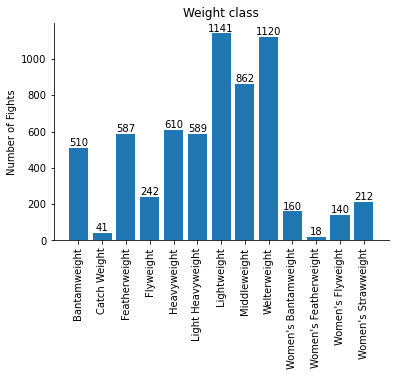

In [15]:
# plot the bar graph
plot_bar(weight_classes_df, 'Weight Classes', 'Weight class')

## WIN TYPES

Win types are the type of decision in the "Win decided by" column, some of these can be split out to make<br>
the features easier to clean up and analyse later.<br>

In [16]:
# Create data frame for exploring the win types
df_win_types = weight_classes_df.copy()

In [17]:
df_win_types.head()

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
0,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Light Heavyweight,Glover Teixeira,Jan Blachowicz,SUB,Rear Naked Choke,2,182,Glover Teixeira,...,6.0,6.0,2.0,2.0,26.0,43.0,1.0,1.0,1.0,1.0
1,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Bantamweight,Petr Yan,Cory Sandhagen,U-DEC,NaN,5,300,Petr Yan,...,28.0,32.0,23.0,24.0,168.0,443.0,1.0,2.0,0.0,0.0
2,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Lightweight,Islam Makhachev,Dan Hooker,SUB,Kimura,1,145,Islam Makhachev,...,0.0,0.0,3.0,3.0,4.0,13.0,0.0,0.0,0.0,0.0
3,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Heavyweight,Alexander Volkov,Marcin Tybura,U-DEC,NaN,3,300,Alexander Volkov,...,15.0,17.0,4.0,5.0,47.0,121.0,11.0,18.0,0.0,0.0
4,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Welterweight,Khamzat Chimaev,Li Jingliang,SUB,Rear Naked Choke,1,196,Khamzat Chimaev,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


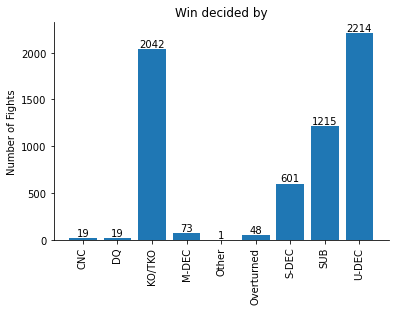

In [18]:
# plot the win types
plot_bar(df_win_types, 'Win Types','Win decided by' )

#### Decision Types 

Because the decisions types are seperated out by U-DEC, M-DEC and S-DEC I'll combine these into one level Decision and <br>
move the U(Unanimous), M(Majority) and S(Split) into the Win Method column

In [19]:
# Convert the Win decided by to Decision and make additions to the Win Method Column 

df_win_types['Win Method'] = np.where(df_win_types['Win decided by']=='M-DEC',
                                      'Majority Decision',
                                      df_win_types['Win Method'])

df_win_types['Win Method'] = np.where(df_win_types['Win decided by']=='S-DEC',
                                      'Split Decision',
                                      df_win_types['Win Method'])

df_win_types['Win Method'] = np.where(df_win_types['Win decided by']=='U-DEC',
                                      'Unanimous Decision',
                                      df_win_types['Win Method'])

df_win_types['Win decided by'] = np.where(df_win_types['Win decided by'].str.contains('DEC'),
                                          'Decision',
                                          df_win_types['Win decided by'])


In [20]:
print(df_win_types['Win decided by'].unique())

['SUB' 'Decision' 'KO/TKO' 'Other' 'CNC' 'DQ' 'Overturned']


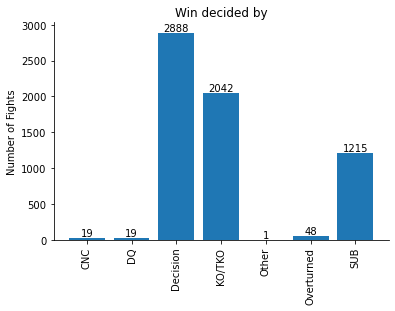

In [21]:
# plot the new data
plot_bar(df_win_types, 'Win Types Adjusted', 'Win decided by')

Other Win decided types are:
- CNC (Could not continue)
- DQ (Disqualification)
- Other
- Overturned
<br>
These fights are fights that had no clear winner, CNC is where a fighter could not continue and no fighter was<br>
declared the winner. DQ is where one fighter was disqualified. Other we can investigate and Overturned is <br>
usually where a decision for the fight was overturned due to mitgating circumstances, usually a failed drug test<br>
after the fight.

In [22]:
# Investigate the Other circumstance in the above
df_other = df_win_types[df_win_types['Win decided by']=='Other']
df_other

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
48,UFC Fight Night: Santos vs. Walker,2021-10-02,Middleweight,NO CONTEST,NO CONTEST,Other,NaN,1,223,Kevin Holland,...,3.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,3.0,5.0


In [23]:
# Investigate the DQ circumstance in the above
df_other = df_win_types[df_win_types['Win decided by']=='DQ']
df_other

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
265,UFC Fight Night: Reyes vs. Prochazka,2021-05-01,Women's Strawweight,Luana Pinheiro,Randa Markos,DQ,NaN,1,256,Luana Pinheiro,...,6.0,7.0,0.0,1.0,12.0,34.0,5.0,5.0,1.0,1.0
342,UFC 259: Blachowicz vs. Adesanya,2021-03-06,Bantamweight,Aljamain Sterling,Petr Yan,DQ,NaN,4,269,Aljamain Sterling,...,21.0,24.0,17.0,17.0,64.0,106.0,12.0,18.0,10.0,13.0
842,UFC Fight Night: Anderson vs. Blachowicz,2020-02-15,Welterweight,Diego Sanchez,Michel Pereira,DQ,NaN,3,189,Diego Sanchez,...,28.0,33.0,5.0,6.0,39.0,75.0,10.0,11.0,4.0,5.0
844,UFC Fight Night: Anderson vs. Blachowicz,2020-02-15,Lightweight,Brok Weaver,Kazula Vargas,DQ,NaN,1,242,Brok Weaver,...,5.0,10.0,4.0,5.0,9.0,21.0,3.0,5.0,3.0,3.0
1393,UFC Fight Night: Cejudo vs. Dillashaw,2019-01-19,Heavyweight,Allen Crowder,Greg Hardy,DQ,NaN,2,148,Allen Crowder,...,5.0,5.0,3.0,3.0,17.0,51.0,6.0,7.0,6.0,6.0
1794,UFC 222: Cyborg vs. Kunitskaya,2018-03-03,Middleweight,CB Dollaway,Hector Lombard,DQ,NaN,1,300,CB Dollaway,...,2.0,4.0,9.0,11.0,18.0,32.0,1.0,1.0,0.0,0.0
1981,UFC 217: Bisping vs. St-Pierre,2017-11-04,Heavyweight,Mark Godbeer,Walt Harris,DQ,NaN,1,269,Mark Godbeer,...,4.0,7.0,0.0,0.0,5.0,19.0,1.0,1.0,15.0,18.0
2919,UFC Fight Night: Belfort vs Henderson 3,2015-11-07,Lightweight,Abel Trujillo,Gleison Tibau,DQ,Rear Naked Choke,1,105,Abel Trujillo,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,3.0
2967,UFC 191: Johnson vs Dodson 2,2015-09-05,Middleweight,Joe Riggs,Ron Stallings,DQ,NaN,2,148,Joe Riggs,...,2.0,3.0,4.0,4.0,17.0,28.0,4.0,5.0,3.0,3.0
3797,UFC Fight Night: Saffiedine vs Lim,2014-01-04,Welterweight,Kiichi Kunimoto,Luiz Dutra,DQ,NaN,1,177,Kiichi Kunimoto,...,4.0,4.0,1.0,1.0,9.0,17.0,1.0,1.0,0.0,0.0


In [24]:
# Investigate the Other circumstance in the above
df_other = df_win_types[df_win_types['Win decided by']=='CNC']
df_other

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
178,UFC Fight Night: Gane vs. Volkov,2021-06-26,Featherweight,NO CONTEST,NO CONTEST,CNC,NaN,2,46,Andre Fili,...,3.0,4.0,5.0,5.0,15.0,34.0,0.0,0.0,0.0,0.0
223,UFC Fight Night: Rozenstruik vs. Sakai,2021-06-05,Lightweight,NO CONTEST,NO CONTEST,CNC,NaN,2,134,Alan Patrick,...,13.0,17.0,1.0,1.0,11.0,37.0,9.0,13.0,26.0,35.0
327,UFC Fight Night: Edwards vs. Muhammad,2021-03-13,Welterweight,NO CONTEST,NO CONTEST,CNC,NaN,2,18,Leon Edwards,...,1.0,3.0,0.0,0.0,6.0,23.0,2.0,3.0,0.0,0.0
332,UFC Fight Night: Edwards vs. Muhammad,2021-03-13,Middleweight,NO CONTEST,NO CONTEST,CNC,NaN,1,277,Eryk Anders,...,2.0,2.0,6.0,8.0,11.0,38.0,4.0,4.0,0.0,0.0
1026,UFC Fight Night: Rodriguez vs. Stephens,2019-09-21,Featherweight,NO CONTEST,NO CONTEST,CNC,NaN,1,15,Yair Rodriguez,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1040,UFC Fight Night: Cowboy vs. Gaethje,2019-09-14,Heavyweight,NO CONTEST,NO CONTEST,CNC,NaN,1,243,Todd Duffee,...,0.0,0.0,4.0,5.0,14.0,23.0,2.0,6.0,0.0,0.0
2199,UFC 211: Miocic vs. Dos Santos,2017-05-13,Lightweight,NO CONTEST,NO CONTEST,CNC,NaN,2,242,Eddie Alvarez,...,7.0,11.0,5.0,5.0,61.0,127.0,12.0,17.0,0.0,0.0
2345,UFC 207: Nunes vs. Rousey,2016-12-30,Welterweight,NO CONTEST,NO CONTEST,CNC,NaN,1,213,Alex Oliveira,...,6.0,8.0,2.0,2.0,6.0,9.0,6.0,7.0,5.0,7.0
2838,UFC on FOX: Dos Anjos vs. Cowboy 2,2015-12-19,Featherweight,NO CONTEST,NO CONTEST,CNC,NaN,2,94,Cole Miller,...,6.0,11.0,10.0,13.0,24.0,77.0,1.0,2.0,0.0,0.0
2870,UFC Fight Night: Namajunas vs. VanZant,2015-12-10,Middleweight,NO CONTEST,NO CONTEST,CNC,NaN,1,11,Antonio Carlos Junior,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0


In [25]:
# Investigate the Other circumstance in the above
df_other = df_win_types[df_win_types['Win decided by']=='Overturned']
df_other

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
574,UFC Fight Night: Covington vs. Woodley,2020-09-19,Welterweight,NO CONTEST,NO CONTEST,Overturned,NaN,3,300,Donald Cerrone,...,30.0,42.0,40.0,45.0,129.0,284.0,18.0,24.0,3.0,4.0
594,UFC Fight Night: Waterson vs. Hill,2020-09-12,Lightweight,NO CONTEST,NO CONTEST,Overturned,Guillotine Choke,1,31,Roosevelt Roberts,...,1.0,2.0,2.0,2.0,4.0,5.0,0.0,0.0,1.0,1.0
624,UFC Fight Night: Munhoz vs. Edgar,2020-08-22,Catch Weight,NO CONTEST,NO CONTEST,Overturned,Punch,2,119,Timur Valiev,...,3.0,3.0,2.0,3.0,11.0,32.0,1.0,1.0,14.0,17.0
664,UFC Fight Night: Whittaker vs. Till,2020-07-25,Welterweight,NO CONTEST,NO CONTEST,Overturned,Rear Naked Choke,1,168,Nicolas Dalby,...,1.0,4.0,7.0,7.0,21.0,32.0,2.0,5.0,7.0,8.0
724,UFC Fight Night: Blaydes vs. Volkov,2020-06-20,Middleweight,NO CONTEST,NO CONTEST,Overturned,Punches,2,290,Marc-Andre Barriault,...,7.0,8.0,3.0,4.0,33.0,80.0,4.0,4.0,0.0,0.0
758,UFC Fight Night: Woodley vs. Burns,2020-05-30,Light Heavyweight,NO CONTEST,NO CONTEST,Overturned,Knee,1,111,Jamahal Hill,...,1.0,1.0,4.0,4.0,4.0,6.0,1.0,1.0,0.0,0.0
863,UFC 247: Jones vs. Reyes,2020-02-08,Bantamweight,NO CONTEST,NO CONTEST,Overturned,Punch,1,38,Domingo Pilarte,...,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,5.0,5.0
977,UFC Fight Night: Reyes vs. Weidman,2019-10-18,Heavyweight,NO CONTEST,NO CONTEST,Overturned,NaN,3,300,Greg Hardy,...,10.0,18.0,1.0,1.0,26.0,96.0,0.0,1.0,0.0,0.0
1012,UFC 243: Whittaker vs. Adesanya,2019-10-05,Bantamweight,NO CONTEST,NO CONTEST,Overturned,Arm Triangle,3,180,Khalid Taha,...,8.0,11.0,3.0,6.0,10.0,31.0,1.0,1.0,9.0,18.0
1140,UFC Fight Night: De Randamie vs. Ladd,2019-07-13,Light Heavyweight,NO CONTEST,NO CONTEST,Overturned,NaN,3,300,Mike Rodriguez,...,10.0,14.0,7.0,8.0,31.0,94.0,9.0,15.0,15.0,19.0


From the above we can see that the Fights in the CNC, Other and Overturned were  declared a no contest<br>
and no winner was decided. Where as the DQ had a winner announced. <br>

In [26]:
# check the % of these fights from the total number of fights
wt_check = len(df_win_types[df_win_types['Win decided by'].str.contains('Other',na=False) | 
                        df_win_types['Win decided by'].str.contains('Overturned',na=False) |
                        df_win_types['Win decided by'].str.contains('CNC',na=False)])

all_count = len(df_win_types)
percent_of_fights = round((wt_check / all_count)*100,2)
print('CNC, Other and Overturned as % of all UFC fights: '+ str(percent_of_fights) +'%')

CNC, Other and Overturned as % of all UFC fights: 1.09%


All these methods of a fight finishing account for 1.09% of all the UFC fights after cleaning the weight classes<br>
These methods of decision won't help in the analysis of the fights as there was no clear winner announced.<br>
Therefore we can rremove them from the clean dataset.

In [27]:
# filtering out the unneeded Win by types
win_types_df_1 = df_win_types[~df_win_types['Win decided by'].str.contains('Other',na=False) & 
                        ~df_win_types['Win decided by'].str.contains('Overturned',na=False) &
                        ~df_win_types['Win decided by'].str.contains('CNC',na=False)]

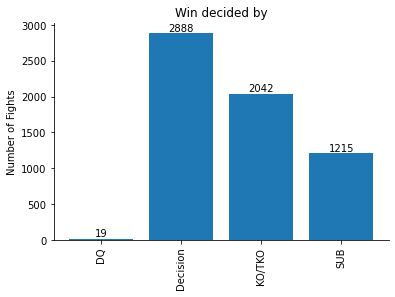

In [28]:
# plot the new data
plot_bar(win_types_df_1, 'Win Types Adjusted Final', 'Win decided by')

## WIN METHODS

Win methods are a sub category of how the win types and are the in fight actions that determined a win type

In [29]:
# create a copy of the finalised win type dataframe
win_method_df = win_types_df_1.copy()

In [30]:
# view the head
win_method_df.head()

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
0,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Light Heavyweight,Glover Teixeira,Jan Blachowicz,SUB,Rear Naked Choke,2,182,Glover Teixeira,...,6.0,6.0,2.0,2.0,26.0,43.0,1.0,1.0,1.0,1.0
1,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Bantamweight,Petr Yan,Cory Sandhagen,Decision,Unanimous Decision,5,300,Petr Yan,...,28.0,32.0,23.0,24.0,168.0,443.0,1.0,2.0,0.0,0.0
2,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Lightweight,Islam Makhachev,Dan Hooker,SUB,Kimura,1,145,Islam Makhachev,...,0.0,0.0,3.0,3.0,4.0,13.0,0.0,0.0,0.0,0.0
3,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Heavyweight,Alexander Volkov,Marcin Tybura,Decision,Unanimous Decision,3,300,Alexander Volkov,...,15.0,17.0,4.0,5.0,47.0,121.0,11.0,18.0,0.0,0.0
4,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Welterweight,Khamzat Chimaev,Li Jingliang,SUB,Rear Naked Choke,1,196,Khamzat Chimaev,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
# get the data info
print(win_method_df[['Event', 'Date', 'Weight class', 'Winner', 'Loser', 'Win decided by', 'Win Method',
                    'Round', 'Time']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 6235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Event           6164 non-null   object
 1   Date            6164 non-null   object
 2   Weight class    6164 non-null   object
 3   Winner          6164 non-null   object
 4   Loser           6164 non-null   object
 5   Win decided by  6164 non-null   object
 6   Win Method      6017 non-null   object
 7   Round           6164 non-null   int64 
 8   Time            6164 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 481.6+ KB
None


In [32]:
# Find the unique values in the method column
win_method_df['Win Method'].unique()

array(['Rear Naked Choke', 'Unanimous Decision', 'Kimura', 'Punch',
       'Knee', 'Arm Triangle', 'Split Decision', 'Majority Decision',
       'Punches', 'Anaconda Choke', 'Armbar', 'Elbow', 'Kick',
       "D'Arce Choke", 'Elbows', 'Heel Hook', 'Guillotine Choke',
       'Flying Knee', nan, 'Triangle Armbar', 'Spinning Back Elbow',
       'Ankle Lock', 'Von Flue Choke', 'Triangle Choke', 'Slam',
       'Forearm Choke', 'Injury', 'Spinning Back Kick', 'Scarf Hold',
       'Spinning Back Fist', 'Kneebar', 'Knees', 'Twister',
       'Peruvian Necktie', 'Neck Crank', 'Schultz Front Headlock',
       'Bulldog Choke', 'Suloev Stretch', 'Kicks', 'Ezekiel Choke',
       'Omoplata', 'Calf Slicer', 'North-South Choke',
       'Inverted Triangle', 'Straight Armbar', 'Keylock',
       'Pace/Pillory Choke', 'Other - Lock', 'Toe Hold', 'Shoulder Choke',
       'Other', 'Other - Choke'], dtype=object)

In [33]:
# Show the number of each unique method
win_method_unique = win_method_df.groupby('Win Method')['Win Method'].count()
win_method_unique

Win Method
Anaconda Choke              24
Ankle Lock                   7
Arm Triangle                79
Armbar                     159
Bulldog Choke                6
Calf Slicer                  2
D'Arce Choke                32
Elbow                       32
Elbows                      90
Ezekiel Choke                2
Flying Knee                 30
Forearm Choke                2
Guillotine Choke           215
Heel Hook                   18
Injury                       8
Inverted Triangle            2
Keylock                      4
Kick                       155
Kicks                        7
Kimura                      38
Knee                        87
Kneebar                     13
Knees                       28
Majority Decision           73
Neck Crank                   9
North-South Choke            5
Omoplata                     2
Other                        3
Other - Choke                1
Other - Lock                 2
Pace/Pillory Choke           1
Peruvian Necktie            

In [34]:
# count NaN values in the Method column
nan_count = win_method_df['Win Method'].isna().sum()
print('Count of NaN values in Win Method Column: ' + str(nan_count))

Count of NaN values in Win Method Column: 147


In [35]:
# % of Win Method that are NaN for the Fight Win Method
count = len(win_method_df)
percent_nan = round((nan_count / count) * 100, 2)
print('% of NaN values in Win Method Column: ' + str(percent_nan)+'%')

% of NaN values in Win Method Column: 2.38%


In [36]:
# find what win decided by type the NaN values are
nan_count = win_method_df['Win Method'].isna().groupby(win_method_df['Win decided by']).sum()
nan_count

Win decided by
DQ           18
Decision      0
KO/TKO      129
SUB           0
Name: Win Method, dtype: int64

To deal with the DQ (disqualified) NaN's in the win method column we can simply replace NaN with "Disqualified"<br>
We can do this because the disqualified metric doesn't tell us the reason for disqualification.

In [37]:
# Replace NaN's in the Win Method for each fight ending in DQ
win_method_df['Win Method'] = np.where(win_method_df['Win decided by']=='DQ', 'Disqualified',win_method_df['Win Method'])

In [38]:
# Check the nan_count again
nan_count = win_method_df['Win Method'].isna().groupby(win_method_df['Win decided by']).sum()
nan_count

Win decided by
DQ            0
Decision      0
KO/TKO      129
SUB           0
Name: Win Method, dtype: int64

Now check the distribution of types of win for KO/TKO to see how to handle the missing values

In [39]:
# Filter just the KO/TKO win decided by type
win_method_ko = win_method_df[win_method_df['Win decided by'].str.contains('KO/TKO', na=False)]

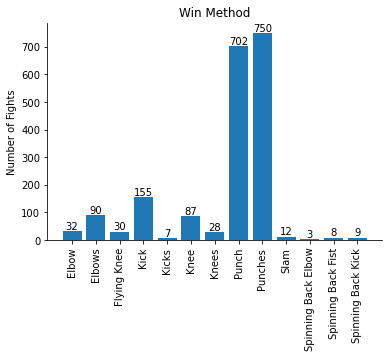

In [40]:
# plot the new data
plot_bar(win_method_ko, 'Win Types For KO_TKO', 'Win Method')

First thing we can see here is that Punches or Punch are a far more common method of KO/TKO than anything else<br>
The next nearest is Kick and then Elbow. We can also see from the graph that we have items that can be grouped<br>
together to make the data set cleaner such as Elbow/Elbows, Kick/Kicks, Knee/Knees and Punch/Punches.<br>
<br>
Renaming these will clean the data set more before we try to deal with the NaN's.

In [41]:
# Renaming the win method for punches, kicks, knees, elbows
win_method_df['Win Method'] = win_method_df['Win Method'].str.replace('Elbows','Elbow')
win_method_df['Win Method'] = win_method_df['Win Method'].str.replace('Kicks', 'Kick')
win_method_df['Win Method'] = win_method_df['Win Method'].str.replace('Knees', 'Knee')
win_method_df['Win Method'] = win_method_df['Win Method'].str.replace('Punches', 'Punch')

Now Recheck the distribution to make sure its correct.

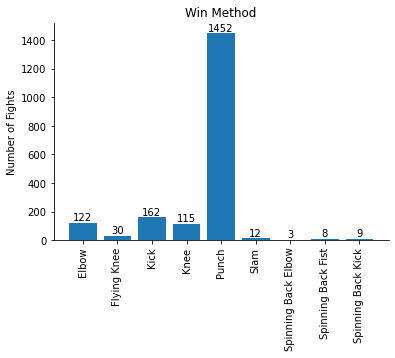

In [42]:
# Filter just the KO/TKO win decided by type
win_method_ko = win_method_df[win_method_df['Win decided by'].str.contains('KO/TKO', na=False)]
# plot the new data
plot_bar(win_method_ko, 'Win Types For KO_TKO Adjusted', 'Win Method')

Now we are ready to deal with the NaN values more comprehensively. There are a few options available based on <br>
the distribution of the win methods for KO/TKO<br>
<br>
We can try:
- Randomly assigning Method to each of the NaNs
- Using a prediction method to try predict and check the accuracy
- Increase each one by an amount relative to its % of the method distribution
<br>

First trying the random assign method. Using Numpy we can randonly assign from a list 

In [43]:
# create list of methods available
choice_list = list(win_method_ko['Win Method'].unique())

# remove the NaN value
choices = [item for item in choice_list if not(pd.isnull(item)) == True]
choices

['Punch',
 'Knee',
 'Elbow',
 'Kick',
 'Flying Knee',
 'Spinning Back Elbow',
 'Slam',
 'Spinning Back Kick',
 'Spinning Back Fist']

In [44]:
# assign choices randomly to the NaN values
win_method_ko_random = win_method_ko.copy()
win_method_ko_random['Win Method'] = np.where(win_method_ko_random['Win Method'].isnull(),
                                              np.random.choice(choices, size=(len(win_method_ko))),
                                              win_method_ko_random['Win Method'])


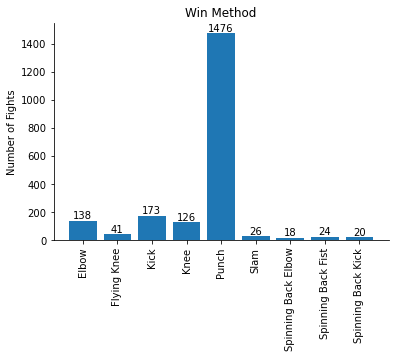

In [45]:
# plot the new data
plot_bar(win_method_ko_random, 'Win Types For KO_TKO Adjusted Randomly', 'Win Method')

Next we can attempt a prediction classification using random forest algotrithim

In [46]:
# make duplicate of win_method_ko dataframe
win_method_rf = win_method_ko.copy()

# remove any of the nan values from the win method column
win_method_rf = win_method_rf[win_method_rf['Win Method'].notnull()]

# check to see if we have any NaNs
nan_count = win_method_rf['Win Method'].isna().groupby(win_method_rf['Win decided by']).sum()
nan_count

Win decided by
KO/TKO    0
Name: Win Method, dtype: int64

Because KO/TKO would normally involve strikes to the head, or body we will inlcude these strikes,<br>
as well as relevant event information.

In [47]:
# reindex the columns that we will use for the classifier
win_method_rf = win_method_rf.reindex(columns=['Weight class','Sig. str. landed F_1', 'Sig. str. thrown F_1',
                                               'Sig. str. landed F_2', 'Sig. str. thrown F_2', 
                                               'Head landed F_1', 'Head thrown F_1', 'Head landed F_2',
                                               'Head thrown F_2', 'Body landed F_1', 'Body thrown F_1',
                                               'Body landed F_2', 'Body thrown F_2','Win Method'])

In [48]:
# create our feautures list
features = win_method_rf.columns[:12]
features


Index(['Weight class', 'Sig. str. landed F_1', 'Sig. str. thrown F_1',
       'Sig. str. landed F_2', 'Sig. str. thrown F_2', 'Head landed F_1',
       'Head thrown F_1', 'Head landed F_2', 'Head thrown F_2',
       'Body landed F_1', 'Body thrown F_1', 'Body landed F_2'],
      dtype='object')

In [49]:
# factorize the columns
win_method_rf['Weight class'] = pd.factorize(win_method_rf['Weight class'])[0]


win_method_rf.head()

,Weight class,Sig. str. landed F_1,Sig. str. thrown F_1,Sig. str. landed F_2,Sig. str. thrown F_2,Head landed F_1,Head thrown F_1,Head landed F_2,Head thrown F_2,Body landed F_1,Body thrown F_1,Body landed F_2,Body thrown F_2,Win Method
10,0,32.0,55.0,35.0,67.0,27.0,48.0,16.0,45.0,5.0,7.0,13.0,16.0,Punch
11,1,4.0,5.0,4.0,6.0,4.0,5.0,3.0,5.0,0.0,0.0,1.0,1.0,Knee
19,0,11.0,21.0,7.0,21.0,8.0,18.0,5.0,19.0,0.0,0.0,2.0,2.0,Punch
20,2,68.0,90.0,56.0,109.0,53.0,73.0,50.0,103.0,15.0,16.0,0.0,0.0,Punch
24,3,24.0,46.0,11.0,21.0,21.0,40.0,5.0,13.0,1.0,1.0,1.0,1.0,Punch


In [50]:
# factorize the win method
y = pd.factorize(win_method_rf['Win Method'])[0]
y

array([0, 1, 0, ..., 0, 2, 1], dtype=int64)

In [51]:
# check the lenght of the factorized and features 
print('Size of y: ' + str(len(y)) + ' Size of features: ' + str(len(win_method_rf)))

Size of y: 1913 Size of features: 1913


In [52]:
# import train test from sklearn
from sklearn.model_selection import train_test_split

# create the test and train sets
x_train, x_test, y_train, y_test = train_test_split(win_method_rf[features], y, test_size=0.1)

In [53]:
# check the size of x_train and x_test
print('Size of x_train: ' + str(len(x_train)) +  ', Size of x_test: ' + str(len(x_test)))

Size of x_train: 1721, Size of x_test: 192


In [54]:
# check the contents of the x_train
x_train.head()

,Weight class,Sig. str. landed F_1,Sig. str. thrown F_1,Sig. str. landed F_2,Sig. str. thrown F_2,Head landed F_1,Head thrown F_1,Head landed F_2,Head thrown F_2,Body landed F_1,Body thrown F_1,Body landed F_2
4401,6,2.0,4.0,3.0,8.0,1.0,3.0,0.0,3.0,1.0,1.0,3.0
2356,5,9.0,32.0,13.0,40.0,8.0,30.0,8.0,34.0,1.0,2.0,0.0
5138,11,9.0,22.0,4.0,19.0,7.0,19.0,0.0,14.0,0.0,1.0,2.0
2603,3,22.0,33.0,6.0,10.0,22.0,33.0,3.0,7.0,0.0,0.0,2.0
2681,6,13.0,16.0,0.0,1.0,12.0,15.0,0.0,0.0,1.0,1.0,0.0


In [55]:
# check the contents of the y_train
y_train

array([0, 0, 0, ..., 0, 0, 7], dtype=int64)

In [56]:
# import the classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier
clf = RandomForestClassifier(n_estimators=20)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [57]:
# Get the accuracy against the test data
clf.score(x_test, y_test)

0.765625

In [58]:
# plot a confusion matrix to visualise
from sklearn.metrics import confusion_matrix

y_predicted = clf.predict(x_test)

confusion = confusion_matrix(y_test, y_predicted)
confusion

array([[146,   0,   0,   1,   0,   0],
       [ 10,   1,   0,   0,   0,   0],
       [ 16,   0,   0,   0,   0,   0],
       [ 16,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0]], dtype=int64)

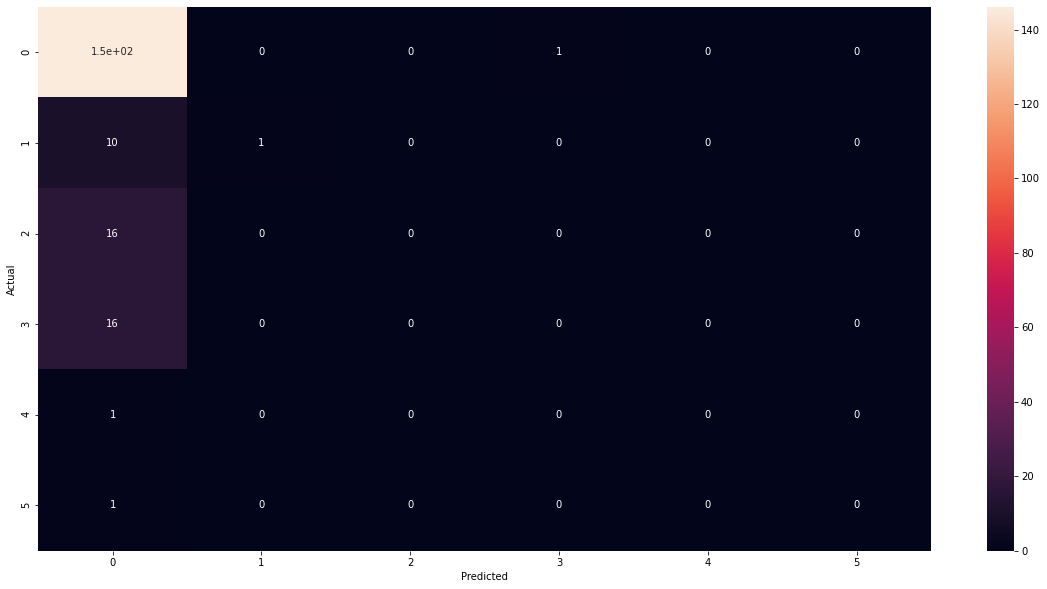

In [59]:
# plot the above with seaborn to get better understanding
import seaborn as sn

plt.figure(figsize=(20,10))
sn.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../graphs/rf_confusion_matrix.jpg', bbox_inches="tight", dpi=150)
plt.show()

After making multiple adjustments to the parameters of the classifier and running several times the accuracy was between 74% and 78%. For the shape of the data, a classification prediction doesn't fit well. In the above matrix classification other than Punches was not at an accurate enough level to use to impute null values

The third method will now be tested by increasing each attribute by its relative percentage. <br>
This should maintain the shape of the data.

In [60]:
# make a duplicate of the win_method_ko data frame
win_method_pinc = win_method_ko.copy()

In [61]:
# get the number of each type
punch = len(win_method_pinc[win_method_pinc['Win Method']=='Punch'])
knee = len(win_method_pinc[win_method_pinc['Win Method']=='Knee'])
elbow = len(win_method_pinc[win_method_pinc['Win Method']=='Elbow'])
kick = len(win_method_pinc[win_method_pinc['Win Method']=='Kick'])
flying_knee = len(win_method_pinc[win_method_pinc['Win Method']=='Flying Knee'])
spinning_back_elbow = len(win_method_pinc[win_method_pinc['Win Method']=='Spinning Back Elbow'])
slam = len(win_method_pinc[win_method_pinc['Win Method']=='Slam'])
spinning_back_kick = len(win_method_pinc[win_method_pinc['Win Method']=='Spinning Back Kick'])
spinning_back_fist = len(win_method_pinc[win_method_pinc['Win Method']=='Spinning Back Fist'])

# total
total_methods = (punch + knee + elbow + kick + flying_knee + spinning_back_elbow + 
                slam + spinning_back_kick + spinning_back_fist)

# null value count
null_ko = win_method_pinc['Win Method'].isna().sum()

In [62]:
# print out the values

print("Total number of methods with null removed: " + str(total_methods))
print("Punch: " + str(punch) + " " + str(round((punch/total_methods)*100,2)) +"%")
print("Knee: " + str(knee) + " " + str(round((knee/total_methods)*100,2)) +"%")
print("Elbow: " + str(elbow) + " " + str(round((elbow/total_methods)*100,2)) +"%")
print("Kick: " + str(kick) + " " + str(round((kick/total_methods)*100,2)) +"%")
print("Flying Knee: " + str(flying_knee) + " " + 
      str(round((flying_knee/total_methods)*100,2)) +"%")
print("Spinning Back Elbow: " + str(spinning_back_elbow) + " " + 
      str(round((spinning_back_elbow/total_methods)*100,2)) +"%")
print("Slam: " + str(slam) + " " + str(round((slam/total_methods)*100,2)) +"%")
print("Spinning Back Kick: " + str(spinning_back_kick) + " " + 
      str(round((spinning_back_kick/total_methods)*100,2)) +"%")
print("Spinning Back Fist: " + str(spinning_back_fist) + " " + 
      str(round((spinning_back_fist/total_methods)*100,2)) +"%")
print("Count of Nulls: " + str(null_ko))

Total number of methods with null removed: 1913
Punch: 1452 75.9%
Knee: 115 6.01%
Elbow: 122 6.38%
Kick: 162 8.47%
Flying Knee: 30 1.57%
Spinning Back Elbow: 3 0.16%
Slam: 12 0.63%
Spinning Back Kick: 9 0.47%
Spinning Back Fist: 8 0.42%
Count of Nulls: 129


Using the percentages above we can see how many to add for each method. <br>
For the Spinning Back Elbow we can use 0, for the Spinning Back Fist we can also use 0<br>
This makes sure we get the same amount as the amount of nulls to fill in. <br>
We will also round the percentages<br>

In [63]:
# get the values in regards to the null values
punch_adj = round((null_ko/100) * 75.9)
knee_adj = round((null_ko/100) * 6.01)
elbow_adj = round((null_ko/100) * 6.38)
kick_adj = round((null_ko/100) * 8.47)
flying_knee_adj = round((null_ko/100) * 1.57)
spin_elbow_adj = round((null_ko/100) * 0)
slam_adj = round((null_ko/100) * 0.63)
spin_bkick_adj = round((null_ko/100) * 0.47)
spin_bfist_adj = round((null_ko/100) * 0)

print("Punches to add: " + str(punch_adj) + "\n" +
      "Knees to add: " + str(knee_adj) + "\n" +
      "Elbow to add: " + str(elbow_adj) + "\n" +
      "Kick to add: " + str(kick_adj) + "\n" +
      "Flying Knee to add: " + str(flying_knee_adj) + "\n" +
      "Slam to add: " + str(slam_adj) + "\n" +
      "Spinning Back Elbow to add: " + str(spin_elbow_adj) + "\n" +
      "Spinning Back Kick to add: " + str(spin_bkick_adj) + "\n" +
      "Spinning Back Fist to add: " + str(spin_bfist_adj) + "\n" +
      "Total: " + str(punch_adj + knee_adj + elbow_adj + 
                      kick_adj + flying_knee_adj + spin_elbow_adj + 
                      slam_adj + spin_bkick_adj + spin_bfist_adj))



Punches to add: 98
Knees to add: 8
Elbow to add: 8
Kick to add: 11
Flying Knee to add: 2
Slam to add: 1
Spinning Back Elbow to add: 0
Spinning Back Kick to add: 1
Spinning Back Fist to add: 0
Total: 129


In [64]:
# create dataframe of adjusted methods
ko_method_punch = pd.concat([pd.DataFrame(['Punch'], 
                       columns=['Method'])for n in range(punch_adj)], ignore_index=True)

ko_method_knee = pd.concat([pd.DataFrame(['Knee'], 
                       columns=['Method'])for n in range(knee_adj)], ignore_index=True)

ko_method_elbow = pd.concat([pd.DataFrame(['Elbow'], 
                       columns=['Method'])for n in range(elbow_adj)], ignore_index=True)

ko_method_kick = pd.concat([pd.DataFrame(['Kick'], 
                       columns=['Method'])for n in range(kick_adj)], ignore_index=True)

ko_method_flying_knee = pd.concat([pd.DataFrame(['Flying Knee'], 
                       columns=['Method'])for n in range(flying_knee_adj)], ignore_index=True)

ko_method_slam = pd.concat([pd.DataFrame(['Slam'], 
                       columns=['Method'])for n in range(slam_adj)], ignore_index=True)

ko_method_spin_kick = pd.concat([pd.DataFrame(['Spinning Back Kick'], 
                       columns=['Method'])for n in range(spin_bkick_adj)], ignore_index=True)


ko_method = pd.concat([ko_method_punch, ko_method_knee,
                       ko_method_elbow, ko_method_kick,
                       ko_method_flying_knee,ko_method_slam,
                       ko_method_spin_kick])
ko_method = ko_method['Method'].values.tolist()
ko_method

['Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Knee',
 'Knee',
 '

In [65]:
# Set the NaN values in the win_method_pinc to the values create
win_method_pinc.loc[win_method_pinc['Win Method'].isnull(), 'Win Method'] = ko_method

In [66]:
# null value count
null_ko = win_method_pinc['Win Method'].isna().sum()
print('Null value count now in Win Methods: ' + str(null_ko))

Null value count now in Win Methods: 0


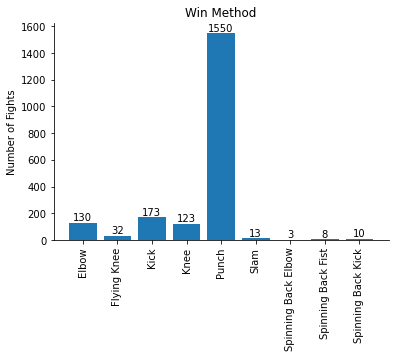

In [67]:
# plot the new data
plot_bar(win_method_pinc, 'Win Types For KO_TKO % increase', 'Win Method')

In [68]:
# Display all graphs beside each other for methods
import matplotlib.image as mpimg
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 22 ,8


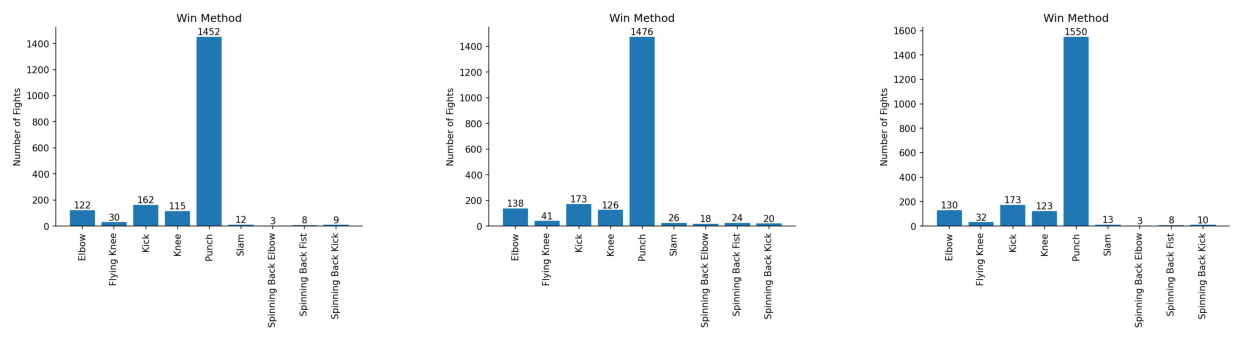

In [69]:
# read images
img_A = mpimg.imread('../graphs/Win Types For KO_TKO Adjusted.jpg')
img_B = mpimg.imread('../graphs/Win Types For KO_TKO Adjusted Randomly.jpg')
img_C = mpimg.imread('../graphs/Win Types For KO_TKO % increase.jpg')

# display images
fig, ax = plt.subplots(1,3)
fig.patch.set_facecolor('white')

#hide axes and borders
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

# show graphs
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)

In the above graphs we have the original with the missing values, then where random choices where made<br>
for the win method and next where the relative percentage was used. The RandomForest classifier isn't<br>
displayed as the models accuracy wasn't high enough to be considered. 

Because the random method givesa a higher output on the less likely scenarios. I will proceed with using <br>
the relative percentage method for imputing the NaN values.

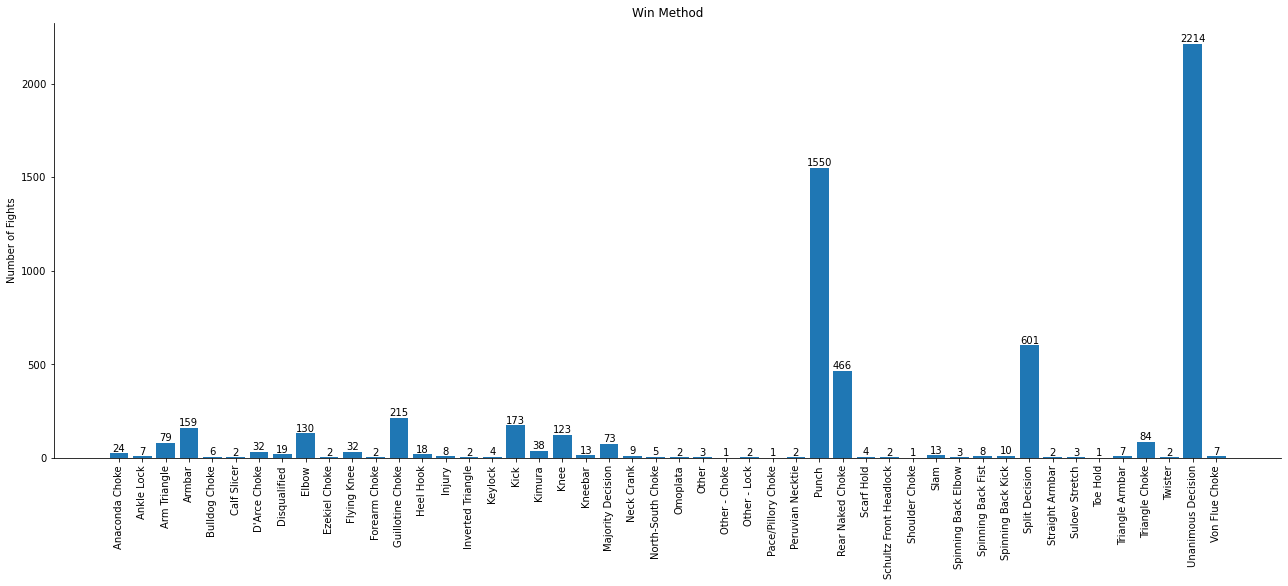

In [70]:
# fill the NaN values in the main data frame
win_method_df.loc[win_method_df['Win Method'].isnull(), 'Win Method'] = ko_method

# display the newly adjusted data
plot_bar(win_method_df, 'Win Types Adjusted Final', 'Win Method')

In [71]:
# check to see if we have any NaNs
nan_count = win_method_df['Win Method'].isna().groupby(win_method_df['Win decided by']).sum()
nan_count

Win decided by
DQ          0
Decision    0
KO/TKO      0
SUB         0
Name: Win Method, dtype: int64

In [72]:
# check data info for first 9 columns (event info) 
print(win_method_df[['Event', 'Date', 'Weight class', 'Winner',
                     'Loser', 'Win decided by', 'Win Method', 'Round', 'Time']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 6235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Event           6164 non-null   object
 1   Date            6164 non-null   object
 2   Weight class    6164 non-null   object
 3   Winner          6164 non-null   object
 4   Loser           6164 non-null   object
 5   Win decided by  6164 non-null   object
 6   Win Method      6164 non-null   object
 7   Round           6164 non-null   int64 
 8   Time            6164 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 610.6+ KB
None


# Fighter Info

Now the event and general fight info are cleaned, move onto the Fighter details and fighter attributes for the fight.

In [73]:
# create fighter dataframe
fighter_df = win_method_df.copy()

In [74]:
# Print Fighter 1 data info
print(fighter_df[['Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1','Wins F_1','Losses F_1','Draws F_1',
                    'DOB F_1','KD F_1', 'Sig. str. landed F_1',
                    'Sig. str. thrown F_1','Sig. str. % F_1',
                    'Total str. landed F_1', 'Total str. thrown F_1',
                    'Td completed F_1','Td attempted F_1','Td % F_1',
                    'Sub. att F_1', 'Rev. F_1', 'Ctrl F_1',
                    'Head landed F_1', 'Head thrown F_1',
                    'Body landed F_1','Body thrown F_1',
                    'Leg landed F_1', 'Leg thrown F_1',
                    'Distance landed F_1','Distance thrown F_1',
                    'Clinch landed F_1','Clinch thrown F_1',
                    'Ground landed F_1','Ground thrown F_1']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 6235
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 1              6164 non-null   object 
 1   Height F_1             6161 non-null   float64
 2   Weight F_1             6162 non-null   float64
 3   Reach F_1              5941 non-null   float64
 4   Stance F_1             6152 non-null   object 
 5   Wins F_1               6164 non-null   int64  
 6   Losses F_1             6164 non-null   int64  
 7   Draws F_1              6164 non-null   int64  
 8   DOB F_1                6135 non-null   object 
 9   KD F_1                 6158 non-null   float64
 10  Sig. str. landed F_1   6158 non-null   float64
 11  Sig. str. thrown F_1   6158 non-null   float64
 12  Sig. str. % F_1        6136 non-null   float64
 13  Total str. landed F_1  6158 non-null   float64
 14  Total str. thrown F_1  6158 non-null   float64
 15  Td c

In [75]:
# Print Fighter 2 data info
print(fighter_df[['Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2','Wins F_2','Losses F_2','Draws F_2',
                    'DOB F_2','KD F_2', 'Sig. str. landed F_2',
                    'Sig. str. thrown F_2','Sig. str. % F_2',
                    'Total str. landed F_2', 'Total str. thrown F_2',
                    'Td completed F_2','Td attempted F_2','Td % F_2',
                    'Sub. att F_2', 'Rev. F_2', 'Ctrl F_2',
                    'Head landed F_2', 'Head thrown F_2',
                    'Body landed F_2','Body thrown F_2',
                    'Leg landed F_2', 'Leg thrown F_2',
                    'Distance landed F_2','Distance thrown F_2',
                    'Clinch landed F_2','Clinch thrown F_2',
                    'Ground landed F_2','Ground thrown F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 6235
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 2              6164 non-null   object 
 1   Height F_2             6153 non-null   float64
 2   Weight F_2             6156 non-null   float64
 3   Reach F_2              5294 non-null   float64
 4   Stance F_2             6094 non-null   object 
 5   Wins F_2               6164 non-null   int64  
 6   Losses F_2             6164 non-null   int64  
 7   Draws F_2              6164 non-null   int64  
 8   DOB F_2                6058 non-null   object 
 9   KD F_2                 6158 non-null   float64
 10  Sig. str. landed F_2   6158 non-null   float64
 11  Sig. str. thrown F_2   6158 non-null   float64
 12  Sig. str. % F_2        6117 non-null   float64
 13  Total str. landed F_2  6158 non-null   float64
 14  Total str. thrown F_2  6158 non-null   float64
 15  Td c

We know from the size of the dataframe there are 6164 fights but only 6158 fights have details about<br>
what happened in each fight. There are 6 fights with details missing. We can investigate these further to see. 

In [76]:
# print the fights missing details
missing_fights = fighter_df[fighter_df['KD F_1'].isnull() & fighter_df['KD F_2'].isnull()]
missing_fights

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
6177,UFC - Ultimate Brazil,1998-10-16,Lightweight,Cesar Marscucci,Paulo Santos,KO/TKO,Flying Knee,1,627,Cesar Marscucci,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6185,UFC 17: Redemption,1998-05-15,Heavyweight,Andre Roberts,Harry Moskowitz,Decision,Unanimous Decision,2,180,Andre Roberts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6193,UFC 16: Battle in the Bayou,1998-03-13,Lightweight,Chris Brennan,Courtney Turner,SUB,Armbar,1,80,Chris Brennan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6194,UFC 16: Battle in the Bayou,1998-03-13,Lightweight,Laverne Clark,Josh Stuart,KO/TKO,Slam,1,75,Laverne Clark,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6234,UFC 12: Judgement Day,1997-02-07,Heavyweight,Justin Martin,Eric Martin,SUB,Heel Hook,1,14,Justin Martin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6235,UFC 12: Judgement Day,1997-02-07,Lightweight,Nick Sanzo,Jackie Lee,KO/TKO,Spinning Back Kick,1,48,Nick Sanzo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The six fights missing details, match up with a physical check of the website that these <br>
fights are indeed missing the fight details.t<br>


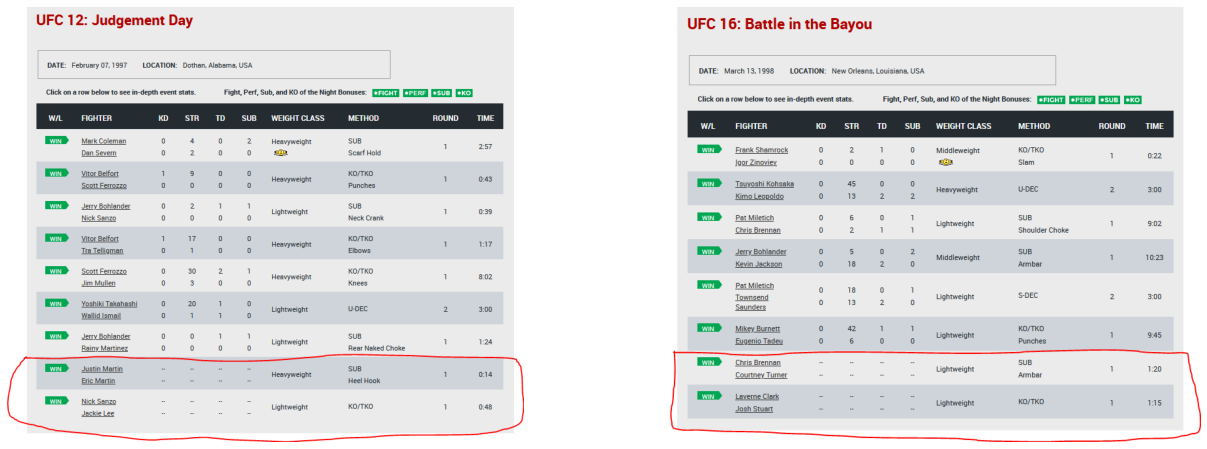

In [77]:
# read images
img_1 = mpimg.imread('../imgs/UFC_12_nans.png')
img_2 = mpimg.imread('../imgs/UFC_16_nans.png')

# display images
fig, ax = plt.subplots(1,2)

#hide axes and borders
ax[0].axis('off')
ax[1].axis('off')

# show graphs
ax[0].imshow(img_1)
ax[1].imshow(img_2)



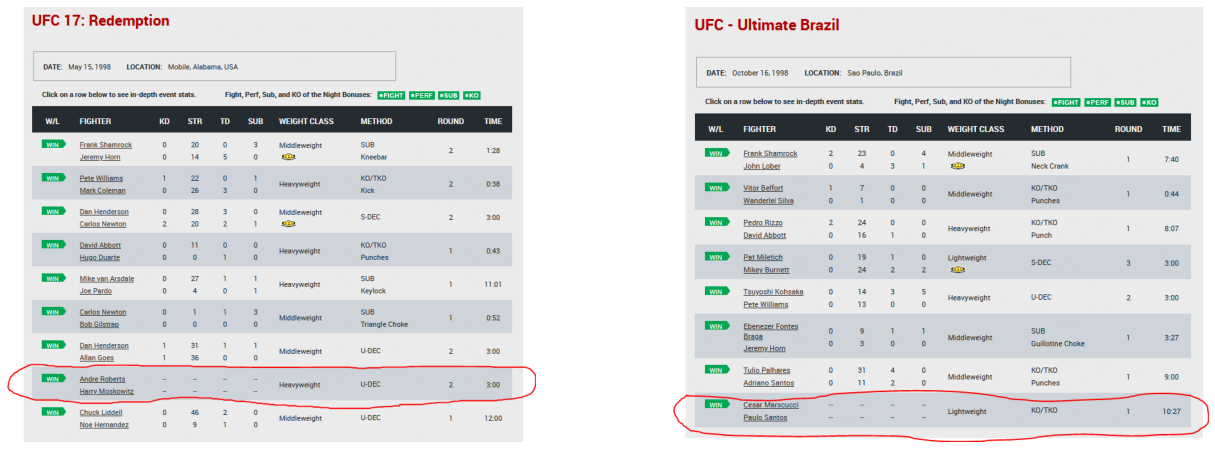

In [78]:
# read images
img_3 = mpimg.imread('../imgs/UFC_17_nans.png')
img_4 = mpimg.imread('../imgs/UFC_Ultimate_Brazil_nans.png')

# display images
fig, ax = plt.subplots(1,2)

#hide axes and borders
ax[0].axis('off')
ax[1].axis('off')

# show graphs
ax[0].imshow(img_3)
ax[1].imshow(img_4)

Because these fights are missing all of their details we would not be able to predict or use another <br>
method to attempt and fill these blanks. Also these fights are all before the unified rules of <br>
Mixed Martial Arts and they represent 0.097% of the remaining fights. We can remove these fights without<br>
having a significant affect on the analysis. 

In [79]:
# Remove fights missing all their fight details
fighter_df = fighter_df[~fighter_df['KD F_1'].isnull() & ~fighter_df['KD F_2'].isnull()]

Recheck the Fighter 1 details

In [80]:
# Print Fighter 1 data info
print(fighter_df[['Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1','Wins F_1','Losses F_1','Draws F_1',
                    'DOB F_1','KD F_1', 'Sig. str. landed F_1',
                    'Sig. str. thrown F_1','Sig. str. % F_1',
                    'Total str. landed F_1', 'Total str. thrown F_1',
                    'Td completed F_1','Td attempted F_1','Td % F_1',
                    'Sub. att F_1', 'Rev. F_1', 'Ctrl F_1',
                    'Head landed F_1', 'Head thrown F_1',
                    'Body landed F_1','Body thrown F_1',
                    'Leg landed F_1', 'Leg thrown F_1',
                    'Distance landed F_1','Distance thrown F_1',
                    'Clinch landed F_1','Clinch thrown F_1',
                    'Ground landed F_1','Ground thrown F_1']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6233
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 1              6158 non-null   object 
 1   Height F_1             6156 non-null   float64
 2   Weight F_1             6157 non-null   float64
 3   Reach F_1              5941 non-null   float64
 4   Stance F_1             6149 non-null   object 
 5   Wins F_1               6158 non-null   int64  
 6   Losses F_1             6158 non-null   int64  
 7   Draws F_1              6158 non-null   int64  
 8   DOB F_1                6132 non-null   object 
 9   KD F_1                 6158 non-null   float64
 10  Sig. str. landed F_1   6158 non-null   float64
 11  Sig. str. thrown F_1   6158 non-null   float64
 12  Sig. str. % F_1        6136 non-null   float64
 13  Total str. landed F_1  6158 non-null   float64
 14  Total str. thrown F_1  6158 non-null   float64
 15  Td c

Recheck the Fighter 2 details

In [81]:
# Print Fighter 2 data info
print(fighter_df[['Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2','Wins F_2','Losses F_2','Draws F_2',
                    'DOB F_2','KD F_2', 'Sig. str. landed F_2',
                    'Sig. str. thrown F_2','Sig. str. % F_2',
                    'Total str. landed F_2', 'Total str. thrown F_2',
                    'Td completed F_2','Td attempted F_2','Td % F_2',
                    'Sub. att F_2', 'Rev. F_2', 'Ctrl F_2',
                    'Head landed F_2', 'Head thrown F_2',
                    'Body landed F_2','Body thrown F_2',
                    'Leg landed F_2', 'Leg thrown F_2',
                    'Distance landed F_2','Distance thrown F_2',
                    'Clinch landed F_2','Clinch thrown F_2',
                    'Ground landed F_2','Ground thrown F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6233
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 2              6158 non-null   object 
 1   Height F_2             6150 non-null   float64
 2   Weight F_2             6153 non-null   float64
 3   Reach F_2              5294 non-null   float64
 4   Stance F_2             6093 non-null   object 
 5   Wins F_2               6158 non-null   int64  
 6   Losses F_2             6158 non-null   int64  
 7   Draws F_2              6158 non-null   int64  
 8   DOB F_2                6058 non-null   object 
 9   KD F_2                 6158 non-null   float64
 10  Sig. str. landed F_2   6158 non-null   float64
 11  Sig. str. thrown F_2   6158 non-null   float64
 12  Sig. str. % F_2        6117 non-null   float64
 13  Total str. landed F_2  6158 non-null   float64
 14  Total str. thrown F_2  6158 non-null   float64
 15  Td c

## Fighter Weight

For Fighter 1 there appears to be one mussing value and for fighter 2 there appears to be 5 missing values.
Investigating them further to see details of each one.

In [82]:
# make duplicate of the fighter data frame
fighter_weight_check = fighter_df.copy()

# only keep the rows with the missing weight value
fighter_weight_check_1 = fighter_weight_check[fighter_weight_check['Weight F_1'].isnull() |
                                            fighter_weight_check['Weight F_2'].isnull()]

In [83]:
# print the weight check rows
fighter_weight_check_1

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
6169,UFC 18: The Road to the Heavyweight Title,1999-01-08,Lightweight,Laverne Clark,Frank Caracci,KO/TKO,Punch,1,412,Laverne Clark,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
6176,UFC - Ultimate Brazil,1998-10-16,Middleweight,Tulio Palhares,Adriano Santos,KO/TKO,Punch,1,540,Tulio Palhares,...,2.0,3.0,1.0,3.0,4.0,24.0,0.0,0.0,7.0,12.0
6186,UFC 17: Redemption,1998-05-15,Middleweight,Chuck Liddell,Noe Hernandez,Decision,Unanimous Decision,1,720,Chuck Liddell,...,0.0,0.0,1.0,1.0,5.0,25.0,3.0,12.0,1.0,1.0
6216,UFC 14: Showdown,1997-07-27,Heavyweight,Alex Hunter,Sam Fulton,SUB,Other,1,150,Alex Hunter,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6225,UFC 13: The Ultimate Force,1997-05-30,Lightweight,Jack Nilson,Saeed Hosseini,KO/TKO,Elbow,1,83,Jack Nilson,...,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,0.0,0.0


Only 5 rows appear but we know we have 6 missing values. 1 row the weight might be missing for both fighters.<br>
Investigating.<br>

In [84]:
# only keep the rows with the missing weight value
fighter_weight_check_2 = fighter_weight_check[fighter_weight_check['Weight F_1'].isnull() &
                                            fighter_weight_check['Weight F_2'].isnull()]

fighter_weight_check_2

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
6225,UFC 13: The Ultimate Force,1997-05-30,Lightweight,Jack Nilson,Saeed Hosseini,KO/TKO,Elbow,1,83,Jack Nilson,...,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,0.0,0.0


Get the fighters that are missing their weights and arrange them with just their weight class and name. <br>
Because fights are sub divided by weight class we can attempt to estimate the weight of these fighters<br>
By the weights in their respective weightclasses.

In [85]:
# Get the fighters with missing weights for just fighter 1
fighter_weight_check_1a = fighter_weight_check[fighter_weight_check['Weight F_1'].isnull()]

# Get the fighters with missing weights for just fighter 2
fighter_weight_check_2a = fighter_weight_check[fighter_weight_check['Weight F_2'].isnull()]

# only keep the relevant columns for both
fighter_weight_check_1a = fighter_weight_check_1a.reindex(columns=['Weight class', 'Fighter 1', 'Weight F_1'])
fighter_weight_check_2a = fighter_weight_check_2a.reindex(columns=['Weight class', 'Fighter 2', 'Weight F_2'])

# Rename the columns to be able to concatenate
fighter_weight_check_1a.rename(columns={'Fighter 1':'Fighter', 'Weight F_1': 'Weight'}, inplace = True)
fighter_weight_check_2a.rename(columns={'Fighter 2':'Fighter', 'Weight F_2': 'Weight'}, inplace = True)

# concatenate both dataframes
fighter_weight_nan = pd.concat([fighter_weight_check_1a, fighter_weight_check_2a])

# print the dataframe
fighter_weight_nan

,Weight class,Fighter,Weight
6225,Lightweight,Jack Nilson,NaN
6169,Lightweight,Frank Caracci,NaN
6176,Middleweight,Adriano Santos,NaN
6186,Middleweight,Noe Hernandez,NaN
6216,Heavyweight,Sam Fulton,NaN
6225,Lightweight,Saeed Hosseini,NaN


Check the distribution of weights in each of the three weight classes above and attempt to identify <br>
any possible pattern.

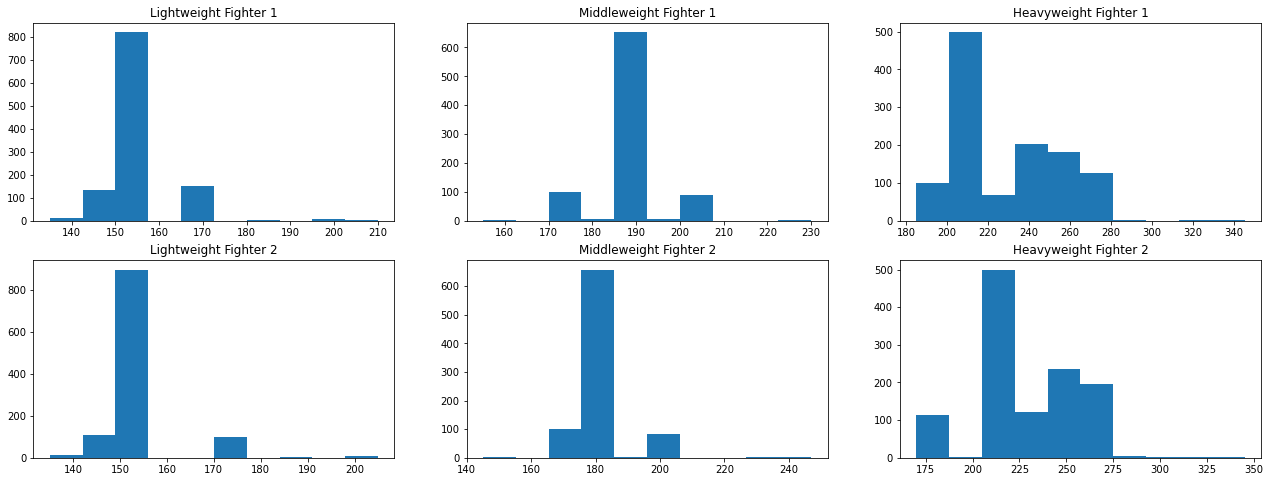

In [86]:
# see the distribution of weights in each weight class above: lightweight, Middleweight, Heavyweight
lightweight = fighter_weight_check[fighter_weight_check['Weight class'].str.contains('Lightweight', na=False)]
middleweight = fighter_weight_check[fighter_weight_check['Weight class'].str.contains('Middleweight', na=False)]
heavyweight = fighter_weight_check[fighter_weight_check['Weight class'].str.contains('Heavyweight', na=False)]

# add histogram plots
plt.subplot(2,3,1)
plt.hist(lightweight['Weight F_1'])
plt.title('Lightweight Fighter 1')

plt.subplot(2,3,2)
plt.hist(middleweight['Weight F_1'])
plt.title('Middleweight Fighter 1')

plt.subplot(2,3,3)
plt.hist(heavyweight['Weight F_1'])
plt.title('Heavyweight Fighter 1')

plt.subplot(2,3,4)
plt.hist(lightweight['Weight F_2'])
plt.title('Lightweight Fighter 2')

plt.subplot(2,3,5)
plt.hist(middleweight['Weight F_2'])
plt.title('Middleweight Fighter 2')

plt.subplot(2,3,6)
plt.hist(heavyweight['Weight F_2'])
plt.title('Heavyweight Fighter 2')

plt.savefig('../graphs/weight_class_nan_dist.jpg', bbox_inches="tight", dpi=150)
plt.show()

From the distributions above we can see that for each weight class there is an overwhelming majority <br>
at the limit range for each weight class. We can check this by getting the mean and mode for the fighter <br>
weights in these weight classes. 

In [87]:
# get the mean for each of the three weight classes
lightweight_mean_1 = lightweight['Weight F_1'].mean()
lightweight_mean_2 = lightweight['Weight F_2'].mean()

middleweight_mean_1 = middleweight['Weight F_1'].mean()
middleweight_mean_2 = middleweight['Weight F_2'].mean()

heavyweight_mean_1 = heavyweight['Weight F_1'].mean()
heavyweight_mean_2 = heavyweight['Weight F_2'].mean()

print('Mean for Lightweight Fighter 1: ' + str(lightweight_mean_1))
print('Mean for Lightweight Fighter 2: ' + str(lightweight_mean_2))
print('\n')
print('Mean for Middleweight Fighter 1: ' + str(middleweight_mean_1))
print('Mean for Middleweight Fighter 2: ' + str(middleweight_mean_2))
print('\n')
print('Mean for Heavyweight Fighter 1: ' + str(heavyweight_mean_1))
print('Mean for Heavyweight Fighter 2: ' + str(heavyweight_mean_2))

Mean for Lightweight Fighter 1: 156.06222222222223
Mean for Lightweight Fighter 2: 155.6094306049822


Mean for Middleweight Fighter 1: 185.43793911007026
Mean for Middleweight Fighter 2: 185.20774647887325


Mean for Heavyweight Fighter 1: 225.54198473282443
Mean for Heavyweight Fighter 2: 224.66808149405773


In [88]:
# get the mode for each of the three weight classes
lightweight_mode_1 = lightweight['Weight F_1'].mode()
lightweight_mode_2 = lightweight['Weight F_2'].mode()

middleweight_mode_1 = middleweight['Weight F_1'].mode()
middleweight_mode_2 = middleweight['Weight F_2'].mode()

heavyweight_mode_1 = heavyweight['Weight F_1'].mode()
heavyweight_mode_2 = heavyweight['Weight F_2'].mode()

print('Mode for Lightweight Fighter 1: ' + str(lightweight_mode_1))
print('Mode for Lightweight Fighter 2: ' + str(lightweight_mode_2))
print('\n')
print('Mode for Middleweight Fighter 1: ' + str(middleweight_mode_1))
print('Mode for Middleweight Fighter 2: ' + str(middleweight_mode_2))
print('\n')
print('Mode for Heavyweight Fighter 1: ' + str(heavyweight_mode_1))
print('Mode for Heavyweight Fighter 2: ' + str(heavyweight_mode_2))

Mode for Lightweight Fighter 1: 0    155.0
dtype: float64
Mode for Lightweight Fighter 2: 0    155.0
dtype: float64


Mode for Middleweight Fighter 1: 0    185.0
dtype: float64
Mode for Middleweight Fighter 2: 0    185.0
dtype: float64


Mode for Heavyweight Fighter 1: 0    205.0
dtype: float64
Mode for Heavyweight Fighter 2: 0    205.0
dtype: float64


For Lightweight fighters we can see that the mean and mode are almost the same and sit at <br>
the weight bracket limit which is 155lbs.<br> 
<br>
For the Middleweight fighters we can see similarly that the mean and mode are almost the same<br>
at the weight bracket limit of 185lbs.<br>
<br>
For the Heavyweight fighters there is more of a range with the mean sitting at approx 225lbs<br>
and the mode sitting at the weight bracket lower limit of 205 lbs. <br>
<br>
<br>
For the missing values:<br>
1. Lightweight - using the mode
2. Middleweight - using the mode
3. Heavyweight - As only missing one value, using one random value between the mean and the mode

In [89]:
# setting fighter 1 weight for Lightweight to mode of lightweight weights
fighter_df['Weight F_1'] = np.where((fighter_df['Weight F_1'].isnull()) & 
                                    (fighter_df['Weight class'].str.contains('Lightweight', na=False)), 
                                    lightweight_mode_1,fighter_df['Weight F_1'])

# setting fighter 2 weight for Lightweight to mode of lightweight weights
fighter_df['Weight F_2'] = np.where((fighter_df['Weight F_2'].isnull()) & 
                                    (fighter_df['Weight class'].str.contains('Lightweight', na=False)), 
                                    lightweight_mode_2,fighter_df['Weight F_2'])

In [90]:
# setting fighter 1 weight for Middleweight to mode of lightweight weights
fighter_df['Weight F_1'] = np.where((fighter_df['Weight F_1'].isnull()) & 
                                    (fighter_df['Weight class'].str.contains('Middleweight', na=False)), 
                                    middleweight_mode_1,fighter_df['Weight F_1'])

# setting fighter 2 weight for Middleweight to mode of lightweight weights
fighter_df['Weight F_2'] = np.where((fighter_df['Weight F_2'].isnull()) & 
                                    (fighter_df['Weight class'].str.contains('Middleweight', na=False)), 
                                    middleweight_mode_2,fighter_df['Weight F_2'])

In [91]:
# get ranom number between 205 and 225 to set the missing weight value in Heavyweight
rand_weight = np.random.randint(low=205, high=225)

# setting fighter 1 weight for Heavyweight to random weight between mean and mode
fighter_df['Weight F_1'] = np.where((fighter_df['Weight F_1'].isnull()) & 
                                    (fighter_df['Weight class'].str.contains('Heavyweight', na=False)), 
                                    rand_weight,fighter_df['Weight F_1'])

# setting fighter 2 weight for Heavyweight to random weight between mean and mode
fighter_df['Weight F_2'] = np.where((fighter_df['Weight F_2'].isnull()) & 
                                    (fighter_df['Weight class'].str.contains('Heavyweight', na=False)), 
                                    rand_weight,fighter_df['Weight F_2'])

In [92]:
# Check NaN values now for fighter 1 in each weight class
nan_count = fighter_df['Weight F_1'].isna().groupby(fighter_df['Weight class']).sum()
nan_count

Weight class
Bantamweight             0
Catch Weight             0
Featherweight            0
Flyweight                0
Heavyweight              0
Light Heavyweight        0
Lightweight              0
Middleweight             0
Welterweight             0
Women's Bantamweight     0
Women's Featherweight    0
Women's Flyweight        0
Women's Strawweight      0
Name: Weight F_1, dtype: int64

In [93]:
# Check NaN values now for fighter 2 in each weight class
nan_count = fighter_df['Weight F_2'].isna().groupby(fighter_df['Weight class']).sum()
nan_count

Weight class
Bantamweight             0
Catch Weight             0
Featherweight            0
Flyweight                0
Heavyweight              0
Light Heavyweight        0
Lightweight              0
Middleweight             0
Welterweight             0
Women's Bantamweight     0
Women's Featherweight    0
Women's Flyweight        0
Women's Strawweight      0
Name: Weight F_2, dtype: int64

Recheck the Fighter 1 details

In [94]:
# Print Fighter 1 data info
print(fighter_df[['Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1','Wins F_1','Losses F_1','Draws F_1',
                    'DOB F_1','KD F_1', 'Sig. str. landed F_1',
                    'Sig. str. thrown F_1','Sig. str. % F_1',
                    'Total str. landed F_1', 'Total str. thrown F_1',
                    'Td completed F_1','Td attempted F_1','Td % F_1',
                    'Sub. att F_1', 'Rev. F_1', 'Ctrl F_1',
                    'Head landed F_1', 'Head thrown F_1',
                    'Body landed F_1','Body thrown F_1',
                    'Leg landed F_1', 'Leg thrown F_1',
                    'Distance landed F_1','Distance thrown F_1',
                    'Clinch landed F_1','Clinch thrown F_1',
                    'Ground landed F_1','Ground thrown F_1']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6233
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 1              6158 non-null   object 
 1   Height F_1             6156 non-null   float64
 2   Weight F_1             6158 non-null   float64
 3   Reach F_1              5941 non-null   float64
 4   Stance F_1             6149 non-null   object 
 5   Wins F_1               6158 non-null   int64  
 6   Losses F_1             6158 non-null   int64  
 7   Draws F_1              6158 non-null   int64  
 8   DOB F_1                6132 non-null   object 
 9   KD F_1                 6158 non-null   float64
 10  Sig. str. landed F_1   6158 non-null   float64
 11  Sig. str. thrown F_1   6158 non-null   float64
 12  Sig. str. % F_1        6136 non-null   float64
 13  Total str. landed F_1  6158 non-null   float64
 14  Total str. thrown F_1  6158 non-null   float64
 15  Td c

Recheck the Fighter 2 details

In [95]:
# Print Fighter 2 data info
print(fighter_df[['Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2','Wins F_2','Losses F_2','Draws F_2',
                    'DOB F_2','KD F_2', 'Sig. str. landed F_2',
                    'Sig. str. thrown F_2','Sig. str. % F_2',
                    'Total str. landed F_2', 'Total str. thrown F_2',
                    'Td completed F_2','Td attempted F_2','Td % F_2',
                    'Sub. att F_2', 'Rev. F_2', 'Ctrl F_2',
                    'Head landed F_2', 'Head thrown F_2',
                    'Body landed F_2','Body thrown F_2',
                    'Leg landed F_2', 'Leg thrown F_2',
                    'Distance landed F_2','Distance thrown F_2',
                    'Clinch landed F_2','Clinch thrown F_2',
                    'Ground landed F_2','Ground thrown F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6233
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 2              6158 non-null   object 
 1   Height F_2             6150 non-null   float64
 2   Weight F_2             6158 non-null   float64
 3   Reach F_2              5294 non-null   float64
 4   Stance F_2             6093 non-null   object 
 5   Wins F_2               6158 non-null   int64  
 6   Losses F_2             6158 non-null   int64  
 7   Draws F_2              6158 non-null   int64  
 8   DOB F_2                6058 non-null   object 
 9   KD F_2                 6158 non-null   float64
 10  Sig. str. landed F_2   6158 non-null   float64
 11  Sig. str. thrown F_2   6158 non-null   float64
 12  Sig. str. % F_2        6117 non-null   float64
 13  Total str. landed F_2  6158 non-null   float64
 14  Total str. thrown F_2  6158 non-null   float64
 15  Td c

## Fighter Height and Reach

Comparitive studies have shown there is a correlation between height and wingspan (Reach) <br>
One such study from came to the conclusion that: "Correlation coefficients (r = 0.73-0.89) indicated a clear <br>
association between arm-span measurements and height in all groups. However, arm-span was found to be <br>
significantly different (P < 0.01) from height in two ethnic groups, the Afro-Caribbean's of both sexes <br>
and Asian males. This suggests that arm-span measurements may be an inappropriate proxy <br>
for height in certain populations." (SL Reeves European Journal Clinical Nutrition Jun 1996) <br>
<br>
To fill in missing values we can:
1. Measure for correlation with the UFC fighters in each weight class and see if we can use any descernable<br>
pattern to fill in the missing values <br>
2. Random Forest can also be applied to attempt to predict missing values<br>
3. Or mean reach and mean height can be used.<br>


In [96]:
# duplicate the fighter dataframe
fighter_hr = fighter_df.copy()

# create a dataframe for fighters 1 and 2 seperately
fighter_hr1 = fighter_hr[(~fighter_hr['Height F_1'].isnull()) & (~fighter_hr['Reach F_1'].isnull()) ]
fighter_hr2 = fighter_hr[(~fighter_hr['Height F_2'].isnull()) & (~fighter_hr['Reach F_2'].isnull()) ]

# reindex for just fighter name, weight class, height, weight, reach
fighter_hr1 = fighter_hr1.reindex(columns=['Weight class','Fighter 1', 'Weight F_1', 'Height F_1', 'Reach F_1'])
fighter_hr2 = fighter_hr2.reindex(columns=['Weight class','Fighter 2', 'Weight F_2', 'Height F_2', 'Reach F_2'])

# rename the columns in each to concatenate
fighter_hr1.rename(columns={'Fighter 1':'Fighter', 'Weight F_1':'Weight',
                            'Height F_1':'Height', 'Reach F_1':'Reach'}, inplace=True)

fighter_hr2.rename(columns={'Fighter 2':'Fighter', 'Weight F_2':'Weight',
                            'Height F_2':'Height', 'Reach F_2':'Reach'}, inplace=True)

# concatenate both together
fighter_hr_reshaped = pd.concat([fighter_hr1, fighter_hr2])
#drop duplicates
fighter_hr_reshaped.drop_duplicates()

,Weight class,Fighter,Weight,Height,Reach
0,Light Heavyweight,Glover Teixeira,205.0,74.0,76.0
1,Bantamweight,Petr Yan,135.0,67.0,67.0
2,Lightweight,Islam Makhachev,155.0,70.0,70.0
3,Heavyweight,Alexander Volkov,250.0,79.0,80.0
4,Welterweight,Khamzat Chimaev,170.0,74.0,75.0
...,...,...,...,...,...
5940,Lightweight,Mike Brown,145.0,66.0,70.0
5948,Lightweight,Jeff Curran,135.0,66.0,69.0
6054,Welterweight,Yves Edwards,155.0,69.0,73.0
6072,Light Heavyweight,Ricardo Almeida,170.0,72.0,74.0


In [97]:
# check for nans in Height
nan_count = fighter_hr_reshaped['Height'].isna().groupby(fighter_hr_reshaped['Weight class']).sum()
nan_count

Weight class
Bantamweight             0
Catch Weight             0
Featherweight            0
Flyweight                0
Heavyweight              0
Light Heavyweight        0
Lightweight              0
Middleweight             0
Welterweight             0
Women's Bantamweight     0
Women's Featherweight    0
Women's Flyweight        0
Women's Strawweight      0
Name: Height, dtype: int64

In [98]:
# check for nans in Reach
nan_count = fighter_hr_reshaped['Reach'].isna().groupby(fighter_hr_reshaped['Weight class']).sum()
nan_count

Weight class
Bantamweight             0
Catch Weight             0
Featherweight            0
Flyweight                0
Heavyweight              0
Light Heavyweight        0
Lightweight              0
Middleweight             0
Welterweight             0
Women's Bantamweight     0
Women's Featherweight    0
Women's Flyweight        0
Women's Strawweight      0
Name: Reach, dtype: int64

Check the correlation coefficient between the Heights and Reach for the fighters

In [99]:
# Correlation between Reach and Height
fighter_hr_reshaped['Reach'].corr(fighter_hr_reshaped['Height'])

0.8928052841532638

In [100]:
# Just to double check our coefficient we can reverse the numbers
fighter_hr_reshaped['Height'].corr(fighter_hr_reshaped['Reach'])

0.8928052841532637

The correlation coefficient in the reach versus height for the fighters matches the upper bound of the <br>
the study mentioned above at 0.89.

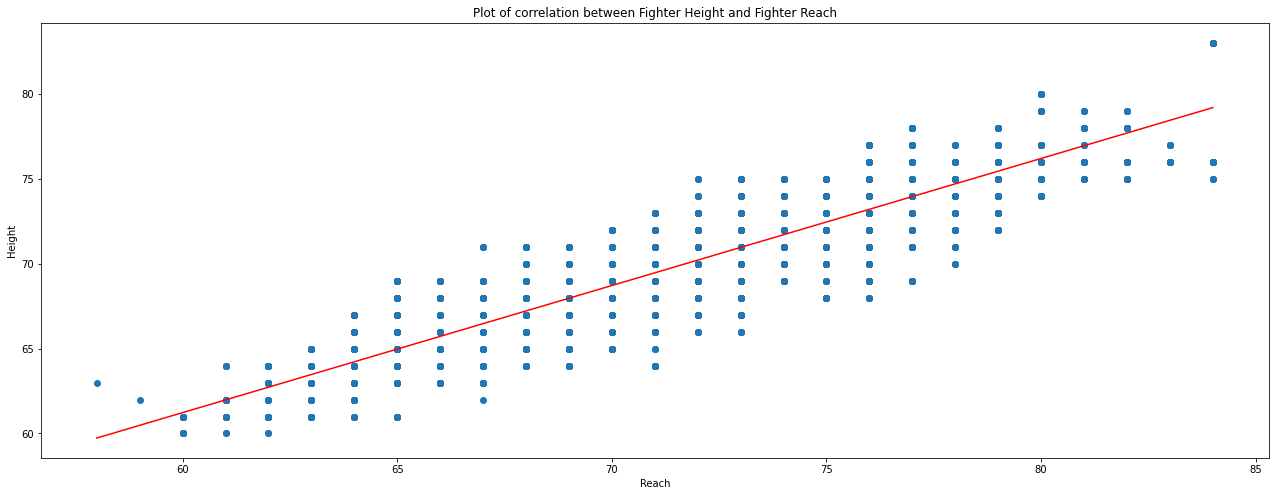

In [101]:
# plot a scatter plot to visualise the correlations
x = fighter_hr_reshaped['Reach']
y = fighter_hr_reshaped['Height']

plt.scatter(x, y)
plt.title('Plot of correlation between Fighter Height and Fighter Reach')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.savefig('../graphs/height_versus_reach.jpg', bbox_inches="tight", dpi=150)
plt.show()

We can do the same again but this time split out by weight class

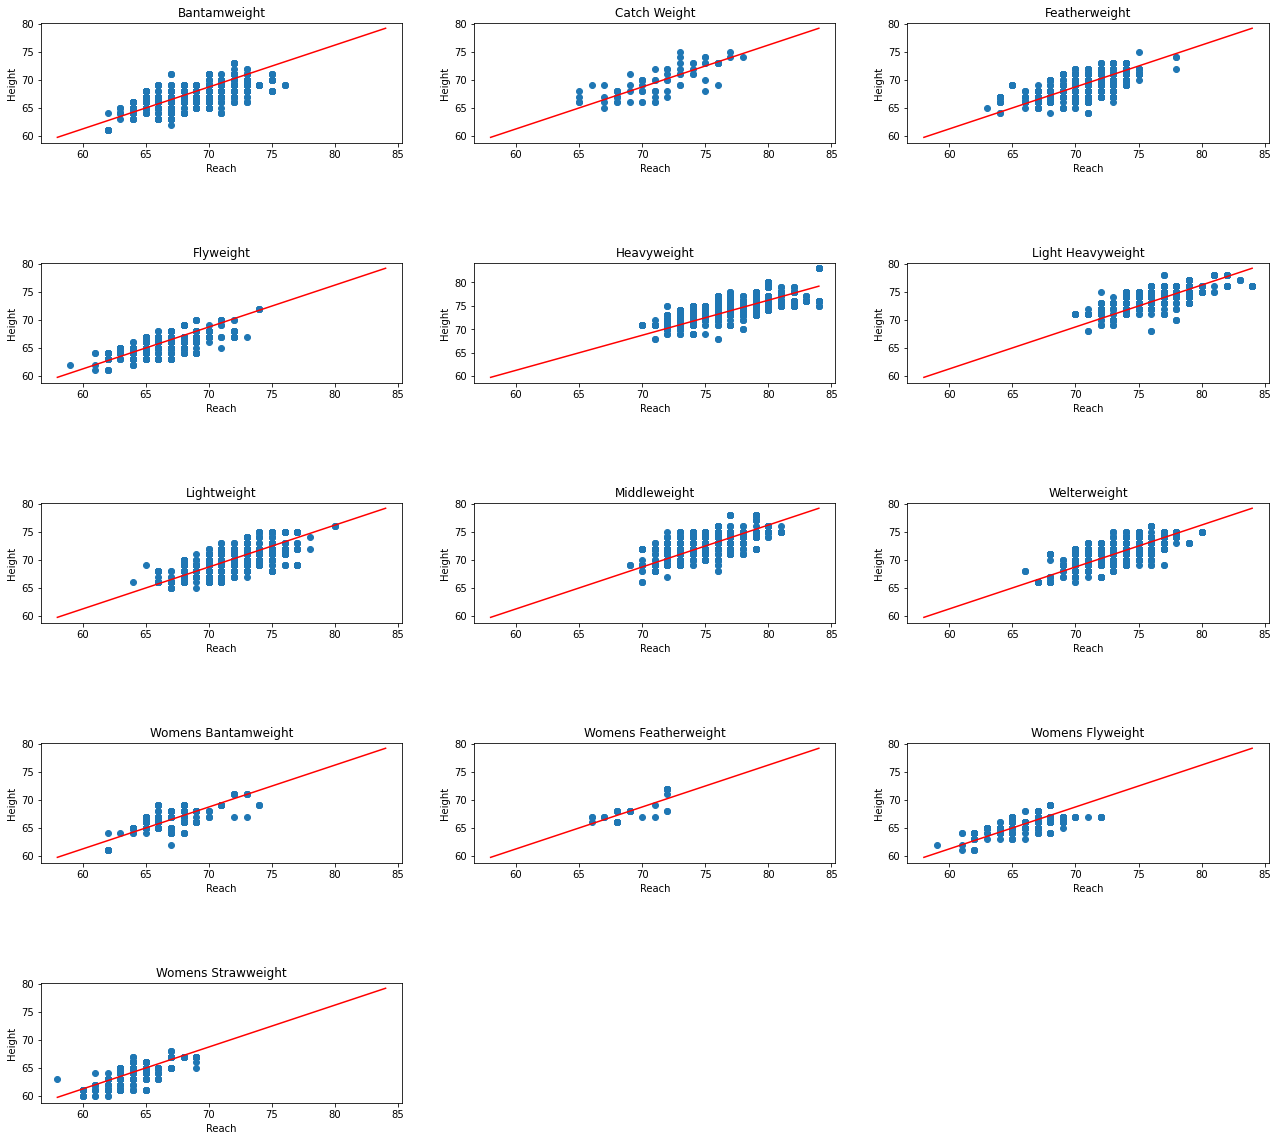

In [102]:
# Seperate out each weight class
Bantamweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains('Bantamweight', na=False)]            
Catch_Weight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains('Catch Weight', na=False)]            
Featherweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains('Featherweight', na=False)]           
Flyweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains('Flyweight', na=False)]                
Heavyweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains('Heavyweight', na=False)]              
Light_Heavyweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains('Light Heavyweight', na=False)] 
Lightweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains('Lightweight', na=False)]      
Middleweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains('Middleweight', na=False)]             
Welterweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains('Welterweight', na=False)]           
Women_Bantamweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains("Women's Bantamweight", na=False)] 
Women_Featherweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains("Women's Featherweight", na=False)]   
Women_Flyweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains("Women's Flyweight", na=False)]  
Women_Strawweight = fighter_hr_reshaped[fighter_hr_reshaped['Weight class'].str.contains("Women's Strawweight", na=False)]      

# add scatter plots
plt.subplot(5,3,1)
plt.scatter(Bantamweight['Reach'], Bantamweight['Height'])
plt.title('Bantamweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,2)
plt.scatter(Catch_Weight['Reach'], Catch_Weight['Height'])
plt.title('Catch Weight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,3)
plt.scatter(Featherweight['Reach'], Featherweight['Height'])
plt.title('Featherweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,4)
plt.scatter(Flyweight['Reach'], Flyweight['Height'])
plt.title('Flyweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,5)
plt.scatter(Heavyweight['Reach'], Heavyweight['Height'])
plt.title('Heavyweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,6)
plt.scatter(Light_Heavyweight['Reach'], Light_Heavyweight['Height'])
plt.title('Light Heavyweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,7)
plt.scatter(Lightweight['Reach'], Lightweight['Height'])
plt.title('Lightweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,8)
plt.scatter(Middleweight['Reach'], Middleweight['Height'])
plt.title('Middleweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,9)
plt.scatter(Welterweight['Reach'], Welterweight['Height'])
plt.title('Welterweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,10)
plt.scatter(Women_Bantamweight['Reach'], Women_Bantamweight['Height'])
plt.title('Womens Bantamweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,11)
plt.scatter(Women_Featherweight['Reach'], Women_Featherweight['Height'])
plt.title('Womens Featherweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,12)
plt.scatter(Women_Flyweight['Reach'], Women_Flyweight['Height'])
plt.title('Womens Flyweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplot(5,3,13)
plt.scatter(Women_Strawweight['Reach'], Women_Strawweight['Height'])
plt.title('Womens Strawweight')
plt.xlabel('Reach')
plt.ylabel('Height')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.subplots_adjust(top=2, hspace=1.0)
plt.savefig('../graphs/weight_class_height_versus_reach.jpg', bbox_inches="tight", dpi=150)
plt.show()


There is definitely a visible corelation but the coefficient implies that we can not use a 1:1 relationship between <br>
the fighters heights and their reaches. <br>

Next a Random Forest approach will be tested to see if a good enough prediction can be made<br> 
to use it on the missing values for the reach.

In [103]:
# make duplicate of the fighter_hr_reshaped dataframe as it has no nulls
fighter_reach_rf = fighter_hr_reshaped.copy()

# create our feautures list
features = fighter_reach_rf.columns[:4]
features


Index(['Weight class', 'Fighter', 'Weight', 'Height'], dtype='object')

In [104]:
# factorize the weight class and fighters
fighter_reach_rf['Weight class'] = pd.factorize(fighter_reach_rf['Weight class'])[0]
fighter_reach_rf['Fighter'] = pd.factorize(fighter_reach_rf['Fighter'])[0]

# print the head
fighter_reach_rf.head()

,Weight class,Fighter,Weight,Height,Reach
0,0,0,205.0,74.0,76.0
1,1,1,135.0,67.0,67.0
2,2,2,155.0,70.0,70.0
3,3,3,250.0,79.0,80.0
4,4,4,170.0,74.0,75.0


In [105]:
# set the column for what we want to predict
reach_y = fighter_reach_rf['Reach']
reach_y

0       76.0
1       67.0
2       70.0
3       80.0
4       75.0
        ... 
6178    74.0
6179    75.0
6204    74.0
6209    75.0
6220    74.0
Name: Reach, Length: 11233, dtype: float64

In [106]:
# create the test and train sets
x_reach_train, x_reach_test, y_reach_train, y_reach_test = train_test_split(fighter_reach_rf[features], reach_y, test_size=0.1)

In [107]:
# check the size of x_train and x_test
print('Size of x_train: ' + str(len(x_reach_train)) +  ', Size of x_test: ' + str(len(x_reach_test)))

Size of x_train: 10109, Size of x_test: 1124


In [108]:
# check the size of fighter_reach
print('Size of Fighter Reach Dataframe: ' + str(len(fighter_reach_rf)))

Size of Fighter Reach Dataframe: 11233


In [109]:
# check the contents of the x_train
x_reach_train.head()

,Weight class,Fighter,Weight,Height
2939,8,555,125.0,64.0
1211,2,225,155.0,70.0
4846,4,771,185.0,69.0
2735,4,359,170.0,72.0
522,12,372,135.0,67.0


In [110]:
# check the contents of the y_train
y_reach_train

2939    65.0
1211    74.0
4846    69.0
2735    73.0
522     68.0
        ... 
2629    75.0
4636    69.0
3992    66.0
126     77.0
2547    74.0
Name: Reach, Length: 10109, dtype: float64

In [111]:
# instantiate classifier
reach_rf_model = RandomForestClassifier(n_jobs=5, n_estimators=50)
reach_rf_model.fit(x_reach_train, y_reach_train)

RandomForestClassifier(n_estimators=50, n_jobs=5)

In [112]:
# Get the accuracy against the test data
reach_rf_model.score(x_reach_test, y_reach_test)

0.9644128113879004

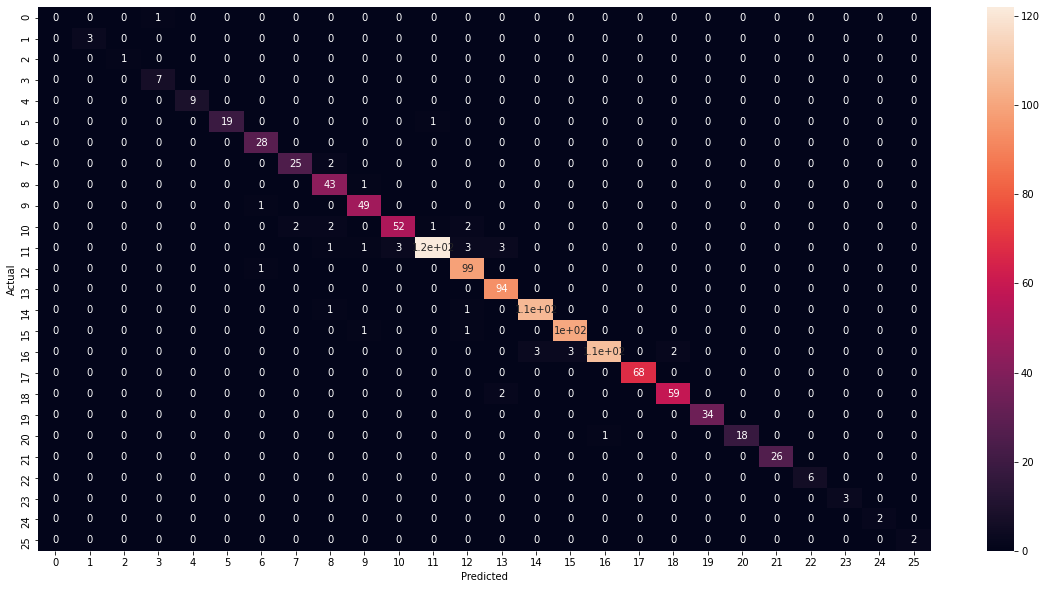

In [113]:
# creating a confusion matrix to visualize the performance of the random forest
reach_y_predicted = reach_rf_model.predict(x_reach_test)

reach_confusion = confusion_matrix(y_reach_test, reach_y_predicted)


# plot a confusion matrix of the Random Forest Classifier
plt.figure(figsize=(20,10))
sn.heatmap(reach_confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../graphs/reach_confusion_matrix.jpg', bbox_inches="tight", dpi=150)
plt.show()

The random forest classifer after several adjustments to parameters seems to work best at a 90/10 split for training<br>
and test. With 50 esitmators and 5 jobs. Gives an accuracy of ~96/97%<br>
<br>
Before applying the model to the missing data, checking the distributions of reach for each weight class to see if mean<br>
might be a good fit for the missing values.<br>

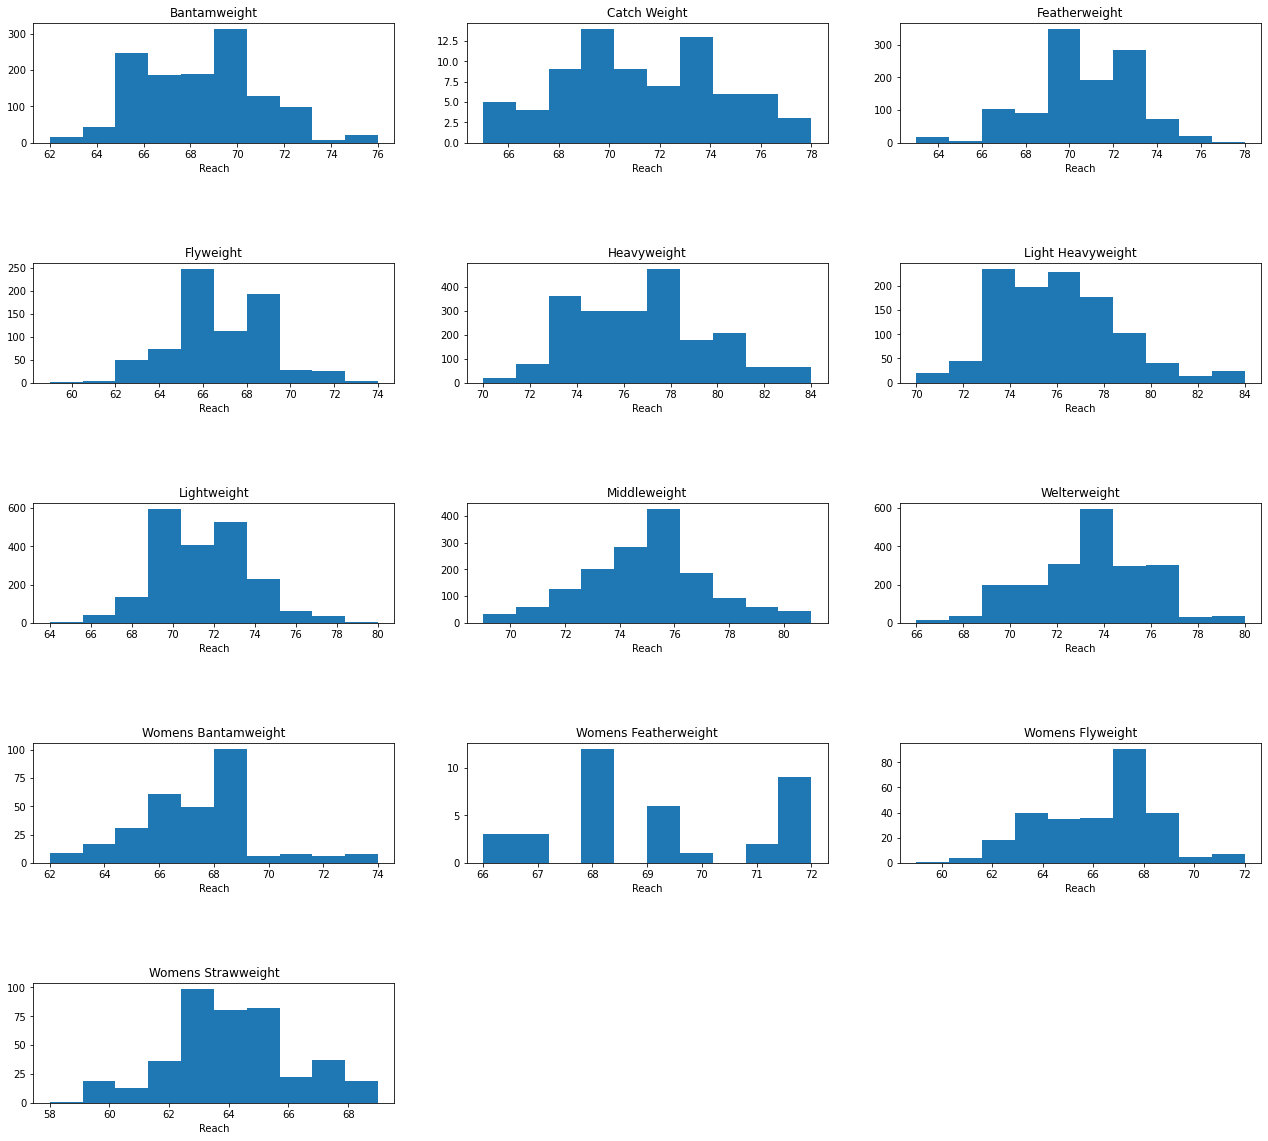

In [114]:
# add histogram plots
plt.subplot(5,3,1)
plt.hist(Bantamweight['Reach'])
plt.title('Bantamweight')
plt.xlabel('Reach')

plt.subplot(5,3,2)
plt.hist(Catch_Weight['Reach'])
plt.title('Catch Weight')
plt.xlabel('Reach')

plt.subplot(5,3,3)
plt.hist(Featherweight['Reach'])
plt.title('Featherweight')
plt.xlabel('Reach')

plt.subplot(5,3,4)
plt.hist(Flyweight['Reach'])
plt.title('Flyweight')
plt.xlabel('Reach')

plt.subplot(5,3,5)
plt.hist(Heavyweight['Reach'])
plt.title('Heavyweight')
plt.xlabel('Reach')

plt.subplot(5,3,6)
plt.hist(Light_Heavyweight['Reach'])
plt.title('Light Heavyweight')
plt.xlabel('Reach')

plt.subplot(5,3,7)
plt.hist(Lightweight['Reach'])
plt.title('Lightweight')
plt.xlabel('Reach')

plt.subplot(5,3,8)
plt.hist(Middleweight['Reach'])
plt.title('Middleweight')
plt.xlabel('Reach')

plt.subplot(5,3,9)
plt.hist(Welterweight['Reach'])
plt.title('Welterweight')
plt.xlabel('Reach')

plt.subplot(5,3,10)
plt.hist(Women_Bantamweight['Reach'])
plt.title('Womens Bantamweight')
plt.xlabel('Reach')

plt.subplot(5,3,11)
plt.hist(Women_Featherweight['Reach'])
plt.title('Womens Featherweight')
plt.xlabel('Reach')

plt.subplot(5,3,12)
plt.hist(Women_Flyweight['Reach'])
plt.title('Womens Flyweight')
plt.xlabel('Reach')

plt.subplot(5,3,13)
plt.hist(Women_Strawweight['Reach'])
plt.title('Womens Strawweight')
plt.xlabel('Reach')

plt.subplots_adjust(top=2, hspace=1.0)
plt.savefig('../graphs/weight_class_reach_distro.jpg', bbox_inches="tight", dpi=150)
plt.show()


With the exception of Middleweight and Welterweight classes, there are no real gausian distributions<br>
for the weight classes. For that reason I think the random forest classifier with a ~97% accuracy will fit <br>
better than applying mean or mode to each weight class.<br>

With the model for reach trained we can apply the same again for height. <br>


In [115]:
# make duplicate of the fighter_hr_reshaped dataframe as it has no nulls
fighter_height_rf = fighter_hr_reshaped.copy()

# reindex to put reach in place of height
fighter_height_rf = fighter_height_rf.reindex(columns=['Weight class', 'Fighter', 'Weight', 'Reach', 'Height'])

# create our feautures list
features = fighter_height_rf.columns[:4]
features

Index(['Weight class', 'Fighter', 'Weight', 'Reach'], dtype='object')

In [116]:
# factorize the weight class and fighters
fighter_height_rf['Weight class'] = pd.factorize(fighter_height_rf['Weight class'])[0]
fighter_height_rf['Fighter'] = pd.factorize(fighter_height_rf['Fighter'])[0]

# print the head
fighter_height_rf.head()

,Weight class,Fighter,Weight,Reach,Height
0,0,0,205.0,76.0,74.0
1,1,1,135.0,67.0,67.0
2,2,2,155.0,70.0,70.0
3,3,3,250.0,80.0,79.0
4,4,4,170.0,75.0,74.0


In [117]:
# set the column for what we want to predict
height_y = fighter_height_rf['Height']
height_y

0       74.0
1       67.0
2       70.0
3       79.0
4       74.0
        ... 
6178    73.0
6179    73.0
6204    72.0
6209    73.0
6220    75.0
Name: Height, Length: 11233, dtype: float64

In [118]:
# create the test and train sets
x_height_train, x_height_test, y_height_train, y_height_test = train_test_split(fighter_height_rf[features], 
                                                                                height_y, test_size=0.1)

In [119]:
# check the size of x_train and x_test
print('Size of x_train: ' + str(len(x_height_train)) +  ', Size of x_test: ' + str(len(x_height_test)))

Size of x_train: 10109, Size of x_test: 1124


In [120]:
# check the size of fighter_height
print('Size of Fighter Reach Dataframe: ' + str(len(fighter_height_rf)))

Size of Fighter Reach Dataframe: 11233


In [121]:
# check the contents of the x_train
x_height_train.head()

,Weight class,Fighter,Weight,Reach
117,2,456,155.0,73.0
1231,9,631,135.0,68.0
3203,9,284,145.0,69.0
4125,2,1007,155.0,70.0
2160,7,85,185.0,77.0


In [122]:
# check the contents of the y_train
y_height_train

117     74.0
1231    64.0
3203    68.0
4125    67.0
2160    73.0
        ... 
5259    68.0
207     66.0
3226    69.0
1710    73.0
1983    74.0
Name: Height, Length: 10109, dtype: float64

In [123]:
# instantiate classifier
height_rf_model = RandomForestClassifier(n_jobs=5, n_estimators=50)
height_rf_model.fit(x_height_train, y_height_train)

RandomForestClassifier(n_estimators=50, n_jobs=5)

In [124]:
# Get the accuracy against the test data
height_rf_model.score(x_height_test, y_height_test)

0.9697508896797153

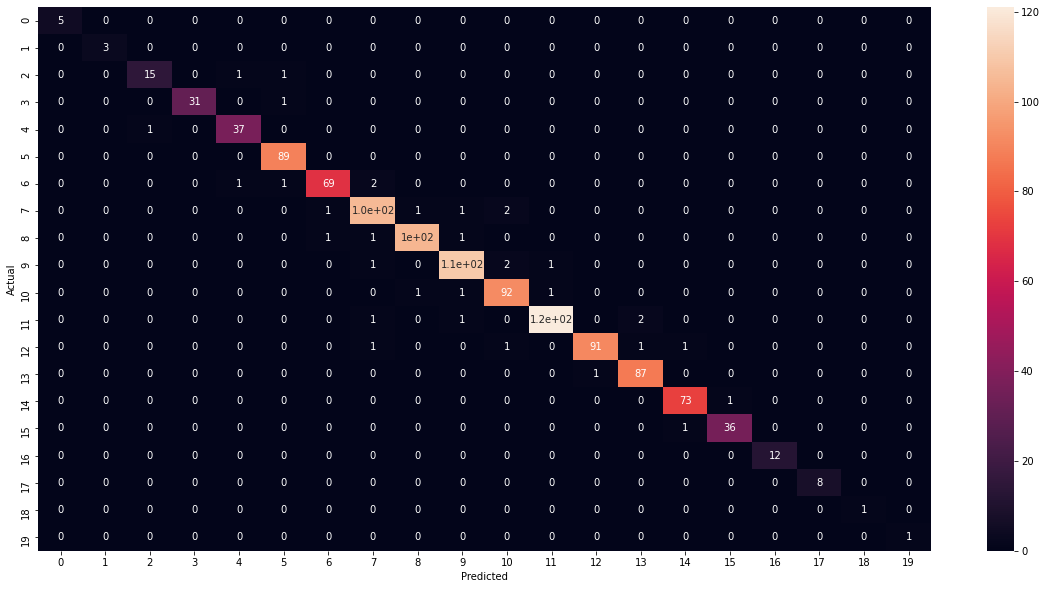

In [125]:
# creating a confusion matrix to visualize the performance of the random forest
height_y_predicted = height_rf_model.predict(x_height_test)

height_confusion = confusion_matrix(y_height_test, height_y_predicted)


# plot a confusion matrix of the Random Forest Classifier
plt.figure(figsize=(20,10))
sn.heatmap(height_confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../graphs/height_confusion_matrix.jpg', bbox_inches="tight", dpi=150)
plt.show()

Similar (as expected) the height classifier returned an approx 97% accuracy level. From the confusion matrix<br>
it is notable that most of the predictions fall close to the actual with only a few being completely off. <br>
<br>
Again plot the Height distribution to see how heights are distributed for each weight class.<br>
It should be similar to the reach distribution.<br>

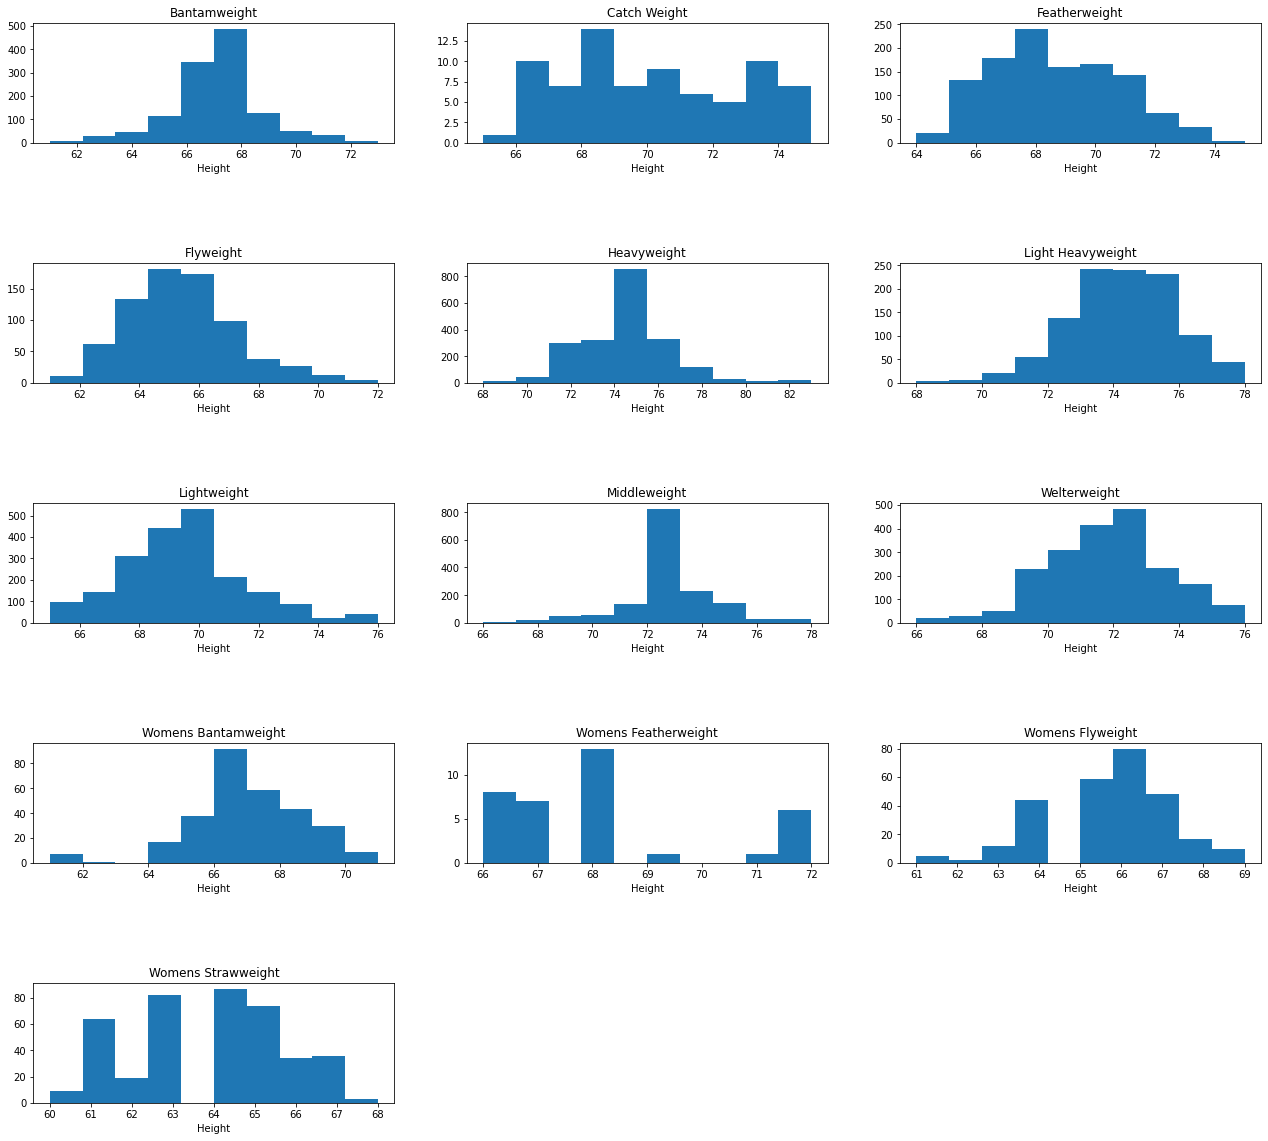

In [126]:
# add histogram plots
plt.subplot(5,3,1)
plt.hist(Bantamweight['Height'])
plt.title('Bantamweight')
plt.xlabel('Height')

plt.subplot(5,3,2)
plt.hist(Catch_Weight['Height'])
plt.title('Catch Weight')
plt.xlabel('Height')

plt.subplot(5,3,3)
plt.hist(Featherweight['Height'])
plt.title('Featherweight')
plt.xlabel('Height')

plt.subplot(5,3,4)
plt.hist(Flyweight['Height'])
plt.title('Flyweight')
plt.xlabel('Height')

plt.subplot(5,3,5)
plt.hist(Heavyweight['Height'])
plt.title('Heavyweight')
plt.xlabel('Height')

plt.subplot(5,3,6)
plt.hist(Light_Heavyweight['Height'])
plt.title('Light Heavyweight')
plt.xlabel('Height')

plt.subplot(5,3,7)
plt.hist(Lightweight['Height'])
plt.title('Lightweight')
plt.xlabel('Height')

plt.subplot(5,3,8)
plt.hist(Middleweight['Height'])
plt.title('Middleweight')
plt.xlabel('Height')

plt.subplot(5,3,9)
plt.hist(Welterweight['Height'])
plt.title('Welterweight')
plt.xlabel('Height')

plt.subplot(5,3,10)
plt.hist(Women_Bantamweight['Height'])
plt.title('Womens Bantamweight')
plt.xlabel('Height')

plt.subplot(5,3,11)
plt.hist(Women_Featherweight['Height'])
plt.title('Womens Featherweight')
plt.xlabel('Height')

plt.subplot(5,3,12)
plt.hist(Women_Flyweight['Height'])
plt.title('Womens Flyweight')
plt.xlabel('Height')

plt.subplot(5,3,13)
plt.hist(Women_Strawweight['Height'])
plt.title('Womens Strawweight')
plt.xlabel('Height')

plt.subplots_adjust(top=2, hspace=1.0)
plt.savefig('../graphs/weight_class_height_distro.jpg', bbox_inches="tight", dpi=150)
plt.show()


For the height distrubutions they are alot more gausian than the reach distributions.<br>
Random forest classifier appears to work well in both scenarios. <br>
<br>
Impute options to be applied to the Height and Reach colums will be:
1. For Fighters with a Height but no Reach value, the reach random forest will be applied.
2. For Fighter with a Reach but no Height value, the height random forest will be applied. 
3. The remaining Fighters who have both Height and Reach Values missing, mean will be applied. 

Getting the Fighters with Reach but Missing Height

In [127]:
# Fighters where Height null and Reach not null
fighters_reach1 = fighter_df[fighter_df['Height F_1'].isnull() & fighter_df['Reach F_1'].notnull()]
fighters_reach2 = fighter_df[fighter_df['Height F_2'].isnull() & fighter_df['Reach F_2'].notnull()]

In [128]:
# reindex columns needed
fighters_reach1 = fighters_reach1.reindex(columns=['Weight class', 'Fighter 1', 'Weight F_1', 'Height F_1', 'Reach F_1'])
fighters_reach2 = fighters_reach2.reindex(columns=['Weight class', 'Fighter 2', 'Weight F_2', 'Height F_2', 'Reach F_2'])

In [129]:
# rename columns to concatenate
fighters_reach1.rename(columns={'Fighter 1':'Fighter', 'Weight F_1':'Weight',
                                'Height F_1':'Height', 'Reach F_1':'Reach'}, inplace=True)

fighters_reach2.rename(columns={'Fighter 2':'Fighter', 'Weight F_2':'Weight',
                                'Height F_2':'Height', 'Reach F_2':'Reach'}, inplace=True)

# concatenate and drop duplicates
fighters_reach = pd.concat([fighters_reach1, fighters_reach2])
fighters_reach = fighters_reach.drop_duplicates()

#  reindex for applying model
fighters_reach = fighters_reach.reindex(columns=['Weight class','Fighter', 'Weight', 'Reach', 'Height'])

# print the dataframe
fighters_reach

,Weight class,Fighter,Weight,Reach,Height
4590,Lightweight,Edward Faaloloto,155.0,70.0,NaN


Getting Fighters with Height but missing Reach

In [130]:
# Fighters where Height null and Reach not null
fighters_height1 = fighter_df[fighter_df['Reach F_1'].isnull() & fighter_df['Height F_1'].notnull()]
fighters_height2 = fighter_df[fighter_df['Reach F_2'].isnull() & fighter_df['Height F_2'].notnull()]

In [131]:
# reindex columns needed
fighters_height1 = fighters_height1.reindex(columns=['Weight class', 'Fighter 1', 'Weight F_1', 'Height F_1', 'Reach F_1'])
fighters_height2 = fighters_height2.reindex(columns=['Weight class', 'Fighter 2', 'Weight F_2', 'Height F_2', 'Reach F_2'])

In [132]:
# rename columns to concatenate
fighters_height1.rename(columns={'Fighter 1':'Fighter', 'Weight F_1':'Weight',
                                'Height F_1':'Height', 'Reach F_1':'Reach'}, inplace=True)

fighters_height2.rename(columns={'Fighter 2':'Fighter', 'Weight F_2':'Weight',
                                'Height F_2':'Height', 'Reach F_2':'Reach'}, inplace=True)

# concatenate and drop duplicates
fighters_height = pd.concat([fighters_height1, fighters_height2])
fighters_height = fighters_height.drop_duplicates()

# print the dataframe
fighters_height

,Weight class,Fighter,Weight,Height,Reach
421,Bantamweight,Umar Nurmagomedov,135.0,68.0,NaN
1490,Lightweight,Jesus Pinedo,155.0,70.0,NaN
2061,Light Heavyweight,Abdul-Kerim Edilov,205.0,74.0,NaN
2403,Welterweight,Jonathan Meunier,170.0,75.0,NaN
3073,Bantamweight,Sirwan Kakai,135.0,65.0,NaN
...,...,...,...,...,...
6226,Lightweight,Wes Albritton,188.0,70.0,NaN
6229,Lightweight,Nick Sanzo,190.0,69.0,NaN
6231,Heavyweight,Jim Mullen,215.0,73.0,NaN
6232,Lightweight,Wallid Ismail,205.0,67.0,NaN


Get Fighters missing both Height and Reach

In [133]:
# Fighters where Height null and Reach null
fighters_height_reach1 = fighter_df[fighter_df['Reach F_1'].isnull() & fighter_df['Height F_1'].isnull()]
fighters_height_reach2 = fighter_df[fighter_df['Reach F_2'].isnull() & fighter_df['Height F_2'].isnull()]

In [134]:
# reindex columns needed
fighters_height_reach1 = fighters_height_reach1.reindex(columns=['Weight class', 'Fighter 1', 
                                                                 'Weight F_1', 'Height F_1', 'Reach F_1'])
fighters_height_reach2 = fighters_height_reach2.reindex(columns=['Weight class', 'Fighter 2',
                                                                 'Weight F_2', 'Height F_2', 'Reach F_2'])

In [135]:
# rename columns to concatenate
fighters_height_reach1.rename(columns={'Fighter 1':'Fighter', 'Weight F_1':'Weight',
                                'Height F_1':'Height', 'Reach F_1':'Reach'}, inplace=True)

fighters_height_reach2.rename(columns={'Fighter 2':'Fighter', 'Weight F_2':'Weight',
                                'Height F_2':'Height', 'Reach F_2':'Reach'}, inplace=True)

# concatenate and drop duplicates
fighters_height_reach = pd.concat([fighters_height_reach1, fighters_height_reach2])
fighters_height_reach = fighters_height_reach.drop_duplicates()

# print the dataframe
fighters_height_reach

,Weight class,Fighter,Weight,Height,Reach
6176,Middleweight,Tulio Palhares,180.0,NaN,NaN
6225,Lightweight,Jack Nilson,155.0,NaN,NaN
4795,Light Heavyweight,Tom Blackledge,205.0,NaN,NaN
6169,Lightweight,Frank Caracci,155.0,NaN,NaN
6176,Middleweight,Adriano Santos,185.0,NaN,NaN
6186,Middleweight,Noe Hernandez,185.0,NaN,NaN
6216,Heavyweight,Sam Fulton,219.0,NaN,NaN
6225,Lightweight,Saeed Hosseini,155.0,NaN,NaN


Model Applications:
- For Fighter with Reach but no Height : 1
- For Fighter with Height but no Reach: 656
- For Fighter with no Height and no Reach: 8

First Apply the Height Predictions

In [136]:
# Factorize whats needed for height predictions
fighters_reach_apply_rf = fighters_reach.copy()
fighters_reach_apply_rf['Weight class'] = pd.factorize(fighters_reach_apply_rf['Weight class'])[0]
fighters_reach_apply_rf['Fighter'] = pd.factorize(fighters_reach_apply_rf['Fighter'])[0]

fighters_reach_apply_rf.head()

,Weight class,Fighter,Weight,Reach,Height
4590,0,0,155.0,70.0,NaN


In [137]:
# create the features
height_pred_features = fighters_reach_apply_rf.columns[:4]
height_pred_features

Index(['Weight class', 'Fighter', 'Weight', 'Reach'], dtype='object')

In [138]:
# apply the height prediction model
height_pred = height_rf_model.predict(fighters_reach_apply_rf[height_pred_features])
height_pred
fighters_reach['Height']=height_pred
fighters_reach

,Weight class,Fighter,Weight,Reach,Height
4590,Lightweight,Edward Faaloloto,155.0,70.0,70.0


Next Apply the Reach Predictions

In [139]:
# Factorize whats needed for reach predictions
fighters_height_apply_rf = fighters_height.copy()
fighters_height_apply_rf['Weight class'] = pd.factorize(fighters_height_apply_rf['Weight class'])[0]
fighters_height_apply_rf['Fighter'] = pd.factorize(fighters_height_apply_rf['Fighter'])[0]

fighters_height_apply_rf.head()

,Weight class,Fighter,Weight,Height,Reach
421,0,0,135.0,68.0,NaN
1490,1,1,155.0,70.0,NaN
2061,2,2,205.0,74.0,NaN
2403,3,3,170.0,75.0,NaN
3073,0,4,135.0,65.0,NaN


In [140]:
# create the features
reach_pred_features = fighters_height_apply_rf.columns[:4]
reach_pred_features

Index(['Weight class', 'Fighter', 'Weight', 'Height'], dtype='object')

In [141]:
# apply the height prediction model
reach_pred = reach_rf_model.predict(fighters_height_apply_rf[reach_pred_features])
reach_pred
fighters_height['Reach']=reach_pred
fighters_height

,Weight class,Fighter,Weight,Height,Reach
421,Bantamweight,Umar Nurmagomedov,135.0,68.0,67.0
1490,Lightweight,Jesus Pinedo,155.0,70.0,70.0
2061,Light Heavyweight,Abdul-Kerim Edilov,205.0,74.0,76.0
2403,Welterweight,Jonathan Meunier,170.0,75.0,78.0
3073,Bantamweight,Sirwan Kakai,135.0,65.0,67.0
...,...,...,...,...,...
6226,Lightweight,Wes Albritton,188.0,70.0,73.0
6229,Lightweight,Nick Sanzo,190.0,69.0,76.0
6231,Heavyweight,Jim Mullen,215.0,73.0,72.0
6232,Lightweight,Wallid Ismail,205.0,67.0,70.0


Apply Mean Height and Reach for remaining Null Values

In [142]:
# get the mean Height for each weight class
mean_height = fighter_hr_reshaped.groupby(['Weight class'])['Height'].mean()
mean_height

Weight class
Bantamweight             67.076121
Catch Weight             69.671053
Featherweight            68.763324
Flyweight                65.468817
Heavyweight              74.958678
Light Heavyweight        73.790009
Lightweight              69.596267
Middleweight             72.710891
Welterweight             71.311598
Women's Bantamweight     66.570946
Women's Featherweight    68.138889
Women's Flyweight        65.624549
Women's Strawweight      63.789216
Name: Height, dtype: float64

In [143]:
# get the mean Reach for each weight class
mean_reach = fighter_hr_reshaped.groupby(['Weight class'])['Reach'].mean()
mean_reach

Weight class
Bantamweight             68.742440
Catch Weight             71.276316
Featherweight            70.478771
Flyweight                66.698925
Heavyweight              77.472107
Light Heavyweight        76.000925
Lightweight              71.448919
Middleweight             74.879208
Welterweight             73.336486
Women's Bantamweight     67.148649
Women's Featherweight    69.138889
Women's Flyweight        66.303249
Women's Strawweight      64.080882
Name: Reach, dtype: float64

In [144]:
# set the mean height for each of the needed weight class
LHW_height = Light_Heavyweight['Height'].mean()
LHW_reach = Light_Heavyweight['Reach'].mean()

MW_height = Middleweight['Height'].mean()
MW_reach = Middleweight['Reach'].mean()

LW_height = Lightweight['Height'].mean()
LW_reach = Lightweight['Reach'].mean()

HW_height = Heavyweight['Height'].mean()
HW_reach = Heavyweight['Reach'].mean()


In [145]:
# set the mean height values to the fighters_height_reach data frame
fighters_height_reach['Height'] = np.where(fighters_height_reach['Weight class']=='Light Heavyweight',
                                           round(LHW_height),
                                           fighters_height_reach['Height'])

fighters_height_reach['Height'] = np.where(fighters_height_reach['Weight class']=='Middleweight',
                                           round(MW_height),
                                           fighters_height_reach['Height'])

fighters_height_reach['Height'] = np.where(fighters_height_reach['Weight class']=='Lightweight',
                                           round(LW_height),
                                           fighters_height_reach['Height'])

fighters_height_reach['Height'] = np.where(fighters_height_reach['Weight class']=='Heavyweight',
                                           round(HW_height),
                                           fighters_height_reach['Height'])


fighters_height_reach

,Weight class,Fighter,Weight,Height,Reach
6176,Middleweight,Tulio Palhares,180.0,73.0,NaN
6225,Lightweight,Jack Nilson,155.0,70.0,NaN
4795,Light Heavyweight,Tom Blackledge,205.0,74.0,NaN
6169,Lightweight,Frank Caracci,155.0,70.0,NaN
6176,Middleweight,Adriano Santos,185.0,73.0,NaN
6186,Middleweight,Noe Hernandez,185.0,73.0,NaN
6216,Heavyweight,Sam Fulton,219.0,74.0,NaN
6225,Lightweight,Saeed Hosseini,155.0,70.0,NaN


In [146]:
# set the mean reach values to the fighters_height_reach data frame
fighters_height_reach['Reach'] = np.where(fighters_height_reach['Weight class']=='Light Heavyweight',
                                           round(LHW_reach),
                                           fighters_height_reach['Reach'])

fighters_height_reach['Reach'] = np.where(fighters_height_reach['Weight class']=='Middleweight',
                                           round(MW_reach),
                                           fighters_height_reach['Reach'])

fighters_height_reach['Reach'] = np.where(fighters_height_reach['Weight class']=='Lightweight',
                                           round(LW_reach),
                                           fighters_height_reach['Reach'])

fighters_height_reach['Reach'] = np.where(fighters_height_reach['Weight class']=='Heavyweight',
                                           round(HW_reach),
                                           fighters_height_reach['Reach'])


fighters_height_reach

,Weight class,Fighter,Weight,Height,Reach
6176,Middleweight,Tulio Palhares,180.0,73.0,75.0
6225,Lightweight,Jack Nilson,155.0,70.0,71.0
4795,Light Heavyweight,Tom Blackledge,205.0,74.0,76.0
6169,Lightweight,Frank Caracci,155.0,70.0,71.0
6176,Middleweight,Adriano Santos,185.0,73.0,75.0
6186,Middleweight,Noe Hernandez,185.0,73.0,75.0
6216,Heavyweight,Sam Fulton,219.0,74.0,77.0
6225,Lightweight,Saeed Hosseini,155.0,70.0,71.0


Create a single dataframe now for all the corrected fighter height and reach information

In [147]:
# concatenate the adjusted dataframes back to a single dataframe
fighter_hr_adjusted = pd.concat([fighters_height_reach, fighters_height, fighters_reach])
fighter_hr_adjusted.drop_duplicates(subset=['Fighter'], keep='last')
fighter_hr_adjusted

,Weight class,Fighter,Weight,Height,Reach
6176,Middleweight,Tulio Palhares,180.0,73.0,75.0
6225,Lightweight,Jack Nilson,155.0,70.0,71.0
4795,Light Heavyweight,Tom Blackledge,205.0,74.0,76.0
6169,Lightweight,Frank Caracci,155.0,70.0,71.0
6176,Middleweight,Adriano Santos,185.0,73.0,75.0
...,...,...,...,...,...
6229,Lightweight,Nick Sanzo,190.0,69.0,76.0
6231,Heavyweight,Jim Mullen,215.0,73.0,72.0
6232,Lightweight,Wallid Ismail,205.0,67.0,70.0
6233,Lightweight,Rainy Martinez,199.0,72.0,74.0


In [148]:
# create duplicates for fighter 1 and fighter 2
fighter1_adj = fighter_hr_adjusted.copy()
fighter2_adj = fighter_hr_adjusted.copy()

# rename the columns to suite fighter 1
fighter1_adj.rename(columns={'Fighter':'Fighter 1','Height':'Height F_1', 'Reach':'Reach F_1'}, inplace=True)

# rename the columns to suite fighter 2
fighter2_adj.rename(columns={'Fighter':'Fighter 2','Height':'Height F_2', 'Reach':'Reach F_2'}, inplace=True)

Apply the corrected information to the main data frame

In [149]:
# Make duplicate of the fighter hr dataframe
fighter_df_adjusted = fighter_hr.copy()

# merge the adjusted Fighter 1 data onto dataframe
fighter_df_adjusted = fighter_df_adjusted.merge(fighter1_adj[['Fighter 1',
                                                              'Height F_1',
                                                              'Reach F_1']], on='Fighter 1', how='left')
# drop duplicates created
fighter_df_adjusted = fighter_df_adjusted.drop_duplicates(subset=['Event','Date',
                                                                  'Weight class',
                                                                  'Winner', 'Loser', 
                                                                  'Win decided by', 'Win Method'], keep='last')
# fill NA for Height
fighter_df_adjusted['Height F_1_y'] = fighter_df_adjusted['Height F_1_y'].fillna(fighter_df_adjusted['Height F_1_x'])

# fille NA for Reach
fighter_df_adjusted['Reach F_1_y'] = fighter_df_adjusted['Reach F_1_y'].fillna(fighter_df_adjusted['Reach F_1_x'])

# Swap columns
fighter_df_adjusted['Height F_1_x'] = fighter_df_adjusted['Height F_1_y']
fighter_df_adjusted['Reach F_1_x'] = fighter_df_adjusted['Reach F_1_y']

# drop the y versions
fighter_df_adjusted.drop(fighter_df_adjusted[['Height F_1_y', 'Reach F_1_y']], axis=1, inplace=True)

# rename the x version
fighter_df_adjusted.rename(columns={'Height F_1_x': 'Height F_1', 'Reach F_1_x': 'Reach F_1'}, inplace=True)


In [150]:
# print fighter 1 info
print(fighter_df_adjusted[['Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1','Wins F_1','Losses F_1','Draws F_1',
                    'DOB F_1','KD F_1', 'Sig. str. landed F_1',
                    'Sig. str. thrown F_1','Sig. str. % F_1',
                    'Total str. landed F_1', 'Total str. thrown F_1',
                    'Td completed F_1','Td attempted F_1','Td % F_1',
                    'Sub. att F_1', 'Rev. F_1', 'Ctrl F_1',
                    'Head landed F_1', 'Head thrown F_1',
                    'Body landed F_1','Body thrown F_1',
                    'Leg landed F_1', 'Leg thrown F_1',
                    'Distance landed F_1','Distance thrown F_1',
                    'Clinch landed F_1','Clinch thrown F_1',
                    'Ground landed F_1','Ground thrown F_1']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6234
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 1              6158 non-null   object 
 1   Height F_1             6158 non-null   float64
 2   Weight F_1             6158 non-null   float64
 3   Reach F_1              6158 non-null   float64
 4   Stance F_1             6149 non-null   object 
 5   Wins F_1               6158 non-null   int64  
 6   Losses F_1             6158 non-null   int64  
 7   Draws F_1              6158 non-null   int64  
 8   DOB F_1                6132 non-null   object 
 9   KD F_1                 6158 non-null   float64
 10  Sig. str. landed F_1   6158 non-null   float64
 11  Sig. str. thrown F_1   6158 non-null   float64
 12  Sig. str. % F_1        6136 non-null   float64
 13  Total str. landed F_1  6158 non-null   float64
 14  Total str. thrown F_1  6158 non-null   float64
 15  Td c

In [151]:
# merge the adjusted Fighter 1 data onto dataframe
fighter_df_adjusted = fighter_df_adjusted.merge(fighter2_adj[['Fighter 2',
                                                              'Height F_2',
                                                              'Reach F_2']], on='Fighter 2', how='left')
# drop duplicates created
fighter_df_adjusted = fighter_df_adjusted.drop_duplicates(subset=['Event','Date',
                                                                  'Weight class',
                                                                  'Winner', 'Loser', 
                                                                  'Win decided by', 'Win Method'], keep='last')
# fill NA for Height
fighter_df_adjusted['Height F_2_y'] = fighter_df_adjusted['Height F_2_y'].fillna(fighter_df_adjusted['Height F_2_x'])

# fille NA for Reach
fighter_df_adjusted['Reach F_2_y'] = fighter_df_adjusted['Reach F_2_y'].fillna(fighter_df_adjusted['Reach F_2_x'])

# Swap columns
fighter_df_adjusted['Height F_2_x'] = fighter_df_adjusted['Height F_2_y']
fighter_df_adjusted['Reach F_2_x'] = fighter_df_adjusted['Reach F_2_y']

# drop the y versions
fighter_df_adjusted.drop(fighter_df_adjusted[['Height F_2_y', 'Reach F_2_y']], axis=1, inplace=True)

# rename the x version
fighter_df_adjusted.rename(columns={'Height F_2_x': 'Height F_2', 'Reach F_2_x': 'Reach F_2'}, inplace=True)

In [152]:
# Print Fighter 2 data info
print(fighter_df_adjusted[['Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2','Wins F_2','Losses F_2','Draws F_2',
                    'DOB F_2','KD F_2', 'Sig. str. landed F_2',
                    'Sig. str. thrown F_2','Sig. str. % F_2',
                    'Total str. landed F_2', 'Total str. thrown F_2',
                    'Td completed F_2','Td attempted F_2','Td % F_2',
                    'Sub. att F_2', 'Rev. F_2', 'Ctrl F_2',
                    'Head landed F_2', 'Head thrown F_2',
                    'Body landed F_2','Body thrown F_2',
                    'Leg landed F_2', 'Leg thrown F_2',
                    'Distance landed F_2','Distance thrown F_2',
                    'Clinch landed F_2','Clinch thrown F_2',
                    'Ground landed F_2','Ground thrown F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 2              6158 non-null   object 
 1   Height F_2             6158 non-null   float64
 2   Weight F_2             6158 non-null   float64
 3   Reach F_2              6158 non-null   float64
 4   Stance F_2             6093 non-null   object 
 5   Wins F_2               6158 non-null   int64  
 6   Losses F_2             6158 non-null   int64  
 7   Draws F_2              6158 non-null   int64  
 8   DOB F_2                6058 non-null   object 
 9   KD F_2                 6158 non-null   float64
 10  Sig. str. landed F_2   6158 non-null   float64
 11  Sig. str. thrown F_2   6158 non-null   float64
 12  Sig. str. % F_2        6117 non-null   float64
 13  Total str. landed F_2  6158 non-null   float64
 14  Total str. thrown F_2  6158 non-null   float64
 15  Td c

## Fighter Stance

Investigate the current features to see what is there. <br>

In [153]:
# make duplicate of the finished datframe so far
fighter_stance_df = fighter_df_adjusted.copy()

In [154]:
# make a data frame of all fighters and the stance, height, weight, reach and weightlcass
fighters_st1 = fighter_stance_df.copy()
fighters_st2 = fighter_stance_df.copy()

fighters_st1 = fighters_st1.reindex(columns=['Weight class','Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1'])

fighters_st2 = fighters_st2.reindex(columns=['Weight class','Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2'])

# rename the columns to concatenate
fighters_st1.rename(columns={'Fighter 1':'Fighter','Height F_1':'Height', 
                             'Weight F_1':'Height','Reach F_1':'Reach',
                             'Stance F_1':'Stance'}, inplace=True)

fighters_st2.rename(columns={'Fighter 2':'Fighter','Height F_2':'Height', 
                             'Weight F_2':'Height','Reach F_2':'Reach',
                             'Stance F_2':'Stance'}, inplace=True)

# concatenate together
fighters_st = pd.concat([fighters_st1, fighters_st2])
#drop duplicates
fighters_st.drop_duplicates(subset=['Fighter'], inplace=True)
fighters_st

,Weight class,Fighter,Height,Height,Reach,Stance
0,Light Heavyweight,Glover Teixeira,74.0,205.0,76.0,Orthodox
1,Bantamweight,Petr Yan,67.0,135.0,67.0,Switch
2,Lightweight,Islam Makhachev,70.0,155.0,70.0,Southpaw
3,Heavyweight,Alexander Volkov,79.0,250.0,80.0,Orthodox
4,Welterweight,Khamzat Chimaev,74.0,170.0,75.0,Orthodox
...,...,...,...,...,...,...
6337,Lightweight,Wes Albritton,70.0,188.0,73.0,Orthodox
6340,Lightweight,Nick Sanzo,69.0,190.0,76.0,NaN
6342,Heavyweight,Jim Mullen,73.0,215.0,72.0,Southpaw
6343,Lightweight,Wallid Ismail,67.0,205.0,70.0,Orthodox


In [155]:
# count how many of each stance there is used (not including NaN)
stance_count = fighters_st.groupby(['Stance'])['Stance'].count()
stance_count

Stance
Open Stance       5
Orthodox       1603
Sideways          1
Southpaw        366
Switch           99
Name: Stance, dtype: int64

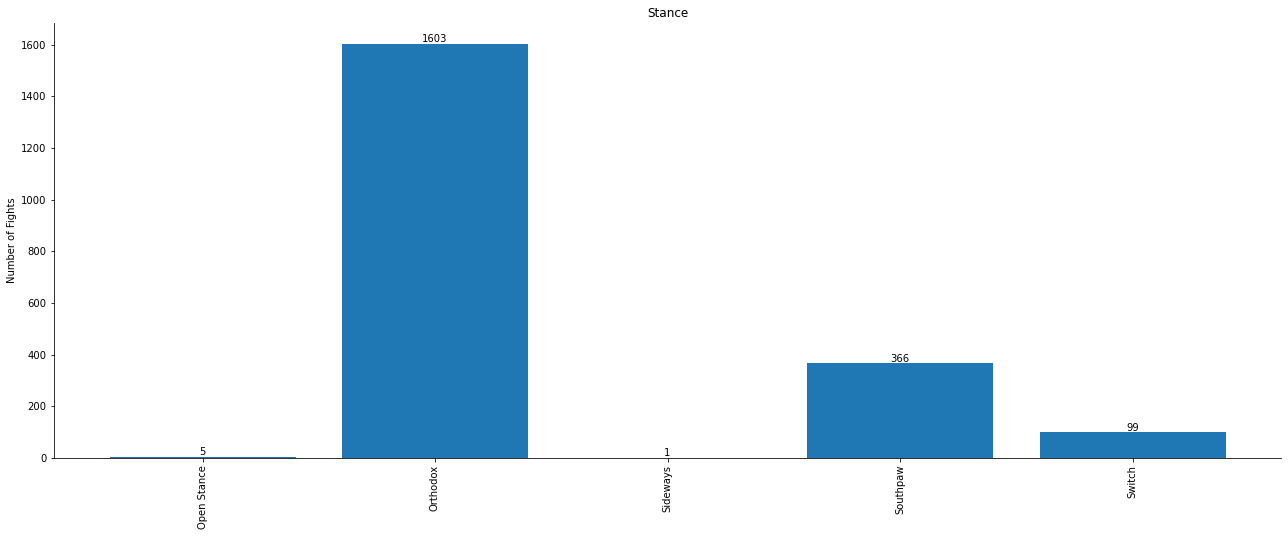

In [156]:
# plot the stance data
plot_bar(fighters_st, 'Fighters Stances', 'Stance')

In [157]:
# count the NaN values
nan_count = fighters_st['Stance'].isna().sum()
nan_count

55

In [158]:
# count the NaN values per weight class
nan_count = fighters_st['Stance'].isna().groupby(fighters_st['Weight class']).sum()
nan_count

Weight class
Bantamweight              4
Catch Weight              0
Featherweight             4
Flyweight                 1
Heavyweight               7
Light Heavyweight         4
Lightweight              16
Middleweight              5
Welterweight              7
Women's Bantamweight      2
Women's Featherweight     1
Women's Flyweight         2
Women's Strawweight       2
Name: Stance, dtype: int64

In [159]:
# count how many of each stance there is used per weight class (not including NaN)
stance_count_wc = fighters_st.groupby(['Weight class','Stance'])['Stance'].count()
stance_wc_count = stance_count_wc.to_frame('count')
stance_wc = stance_wc_count.reset_index()
stance_wc

,Weight class,Stance,count
0,Bantamweight,Orthodox,140
1,Bantamweight,Southpaw,32
2,Bantamweight,Switch,15
3,Catch Weight,Orthodox,9
4,Catch Weight,Southpaw,4
5,Featherweight,Orthodox,162
6,Featherweight,Southpaw,27
7,Featherweight,Switch,13
8,Flyweight,Orthodox,60
9,Flyweight,Southpaw,20


Display the stances per wight class visually

In [160]:
# Seperate out each weight class
Bantamweight = stance_wc[stance_wc['Weight class'].str.contains('Bantamweight', na=False)]            
Catch_Weight = stance_wc[stance_wc['Weight class'].str.contains('Catch Weight', na=False)]            
Featherweight = stance_wc[stance_wc['Weight class'].str.contains('Featherweight', na=False)]           
Flyweight = stance_wc[stance_wc['Weight class'].str.contains('Flyweight', na=False)]                
Heavyweight = stance_wc[stance_wc['Weight class'].str.contains('Heavyweight', na=False)]              
Light_Heavyweight = stance_wc[stance_wc['Weight class'].str.contains('Light Heavyweight', na=False)] 
Lightweight = stance_wc[stance_wc['Weight class'].str.contains('Lightweight', na=False)]      
Middleweight = stance_wc[stance_wc['Weight class'].str.contains('Middleweight', na=False)]             
Welterweight = stance_wc[stance_wc['Weight class'].str.contains('Welterweight', na=False)]           
Women_Bantamweight = stance_wc[stance_wc['Weight class'].str.contains("Women's Bantamweight", na=False)] 
Women_Featherweight = stance_wc[stance_wc['Weight class'].str.contains("Women's Featherweight", na=False)]   
Women_Flyweight = stance_wc[stance_wc['Weight class'].str.contains("Women's Flyweight", na=False)]  
Women_Strawweight = stance_wc[stance_wc['Weight class'].str.contains("Women's Strawweight", na=False)]  

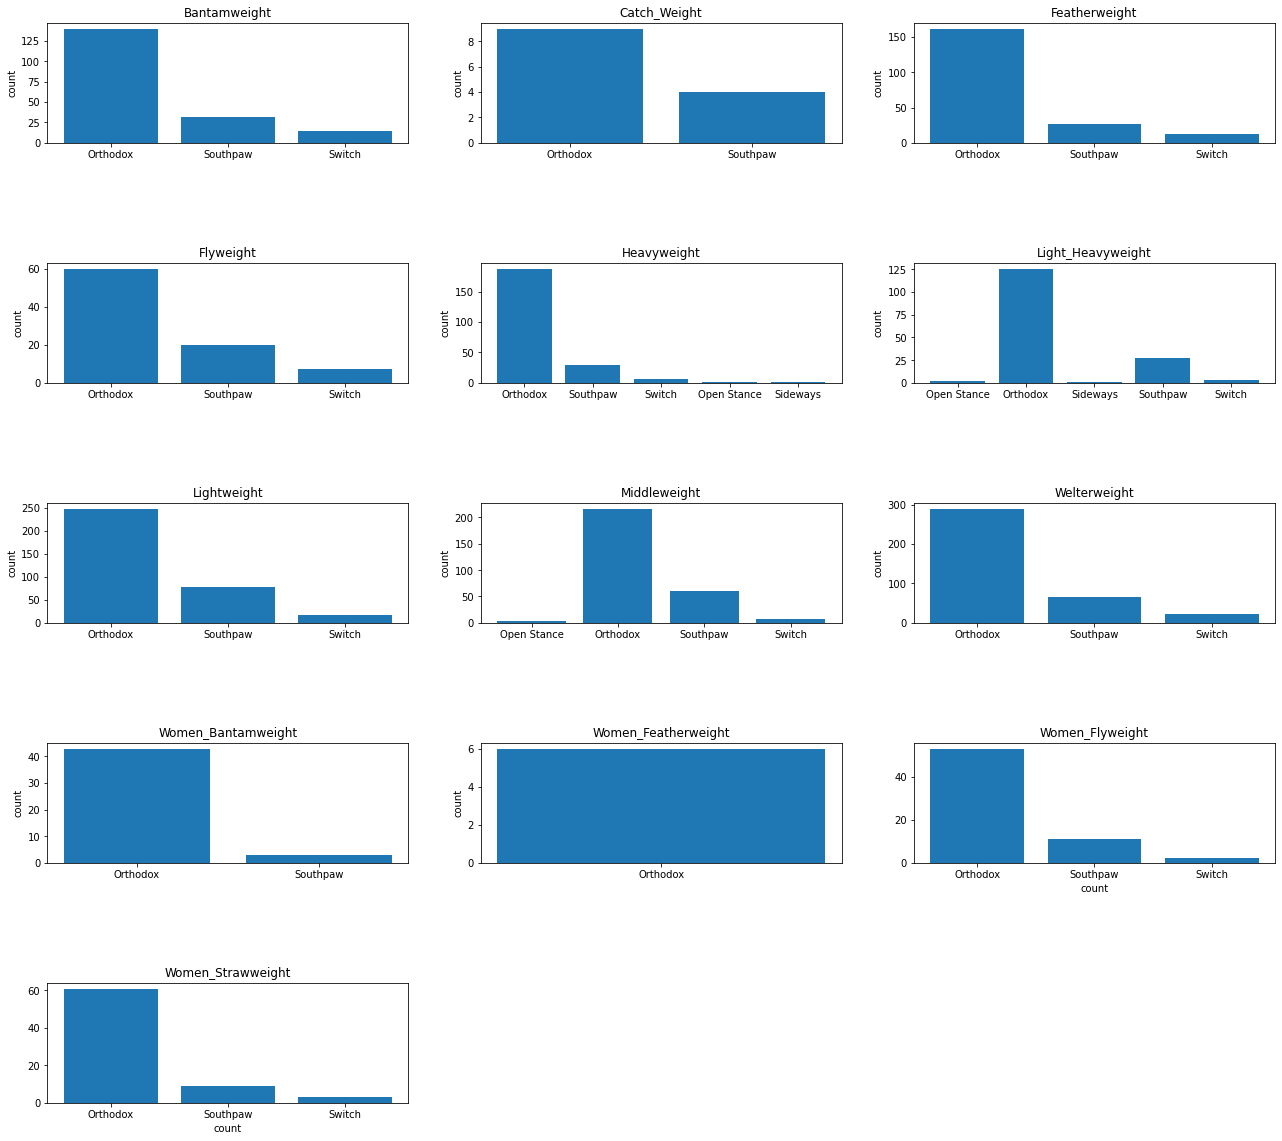

In [161]:
# add bar charts
plt.subplot(5,3,1)
plt.bar(Bantamweight['Stance'], Bantamweight['count'])
plt.title('Bantamweight')
plt.ylabel('count')

plt.subplot(5,3,2)
plt.bar(Catch_Weight['Stance'], Catch_Weight['count'])
plt.title('Catch_Weight')
plt.ylabel('count')

plt.subplot(5,3,3)
plt.bar(Featherweight['Stance'], Featherweight['count'])
plt.title('Featherweight')
plt.ylabel('count')

plt.subplot(5,3,4)
plt.bar(Flyweight['Stance'], Flyweight['count'])
plt.title('Flyweight')
plt.ylabel('count')

plt.subplot(5,3,5)
plt.bar(Heavyweight['Stance'], Heavyweight['count'])
plt.title('Heavyweight')
plt.ylabel('count')

plt.subplot(5,3,6)
plt.bar(Light_Heavyweight['Stance'], Light_Heavyweight['count'])
plt.title('Light_Heavyweight')
plt.ylabel('count')

plt.subplot(5,3,7)
plt.bar(Lightweight['Stance'], Lightweight['count'])
plt.title('Lightweight')
plt.ylabel('count')

plt.subplot(5,3,8)
plt.bar(Middleweight['Stance'], Middleweight['count'])
plt.title('Middleweight')
plt.ylabel('count')

plt.subplot(5,3,9)
plt.bar(Welterweight['Stance'], Welterweight['count'])
plt.title('Welterweight')
plt.ylabel('count')

plt.subplot(5,3,10)
plt.bar(Women_Bantamweight['Stance'], Women_Bantamweight['count'])
plt.title('Women_Bantamweight')
plt.ylabel('count')

plt.subplot(5,3,11)
plt.bar(Women_Featherweight['Stance'], Women_Featherweight['count'])
plt.title('Women_Featherweight')
plt.ylabel('count')

plt.subplot(5,3,12)
plt.bar(Women_Flyweight['Stance'], Women_Flyweight['count'])
plt.title('Women_Flyweight')
plt.xlabel('count')

plt.subplot(5,3,13)
plt.bar(Women_Strawweight['Stance'], Women_Strawweight['count'])
plt.title('Women_Strawweight')
plt.xlabel('count')

plt.subplots_adjust(top=2, hspace=1.0)
plt.savefig('../graphs/weight_class_stances.jpg', bbox_inches="tight", dpi=150)
plt.show()

The data in each weight class and overall is highly skewewd towards fighters using an Orthodox stance <br>
and any training of a model would most likely not give correct results <br>
<br>
Using the most reoccuiring method would introduce bias. For that reason using the null value<br>
as it's own category would most likely produce the best results. To do that null values can be<br>
replaced with 'Not Known' stance.

In [162]:
# replace NaN in Stance F_1 and Stance F_2
fighter_stance_df['Stance F_1'] = fighter_stance_df['Stance F_1'].fillna('Not Known')
fighter_stance_df['Stance F_2'] = fighter_stance_df['Stance F_2'].fillna('Not Known')

In [163]:
# make another data frame of all fighters and the stance, height, weight, reach and weightlcass
fighters_st3 = fighter_stance_df.copy()
fighters_st4 = fighter_stance_df.copy()

fighters_st3 = fighters_st3.reindex(columns=['Weight class','Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1'])

fighters_st4 = fighters_st4.reindex(columns=['Weight class','Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2'])

# rename the columns to concatenate
fighters_st3.rename(columns={'Fighter 1':'Fighter','Height F_1':'Height', 
                             'Weight F_1':'Height','Reach F_1':'Reach',
                             'Stance F_1':'Stance'}, inplace=True)

fighters_st4.rename(columns={'Fighter 2':'Fighter','Height F_2':'Height', 
                             'Weight F_2':'Height','Reach F_2':'Reach',
                             'Stance F_2':'Stance'}, inplace=True)

# concatenate together
fighters_st_B = pd.concat([fighters_st3, fighters_st4])
#drop duplicates
fighters_st_B.drop_duplicates(subset=['Fighter'], inplace=True)
fighters_st_B

,Weight class,Fighter,Height,Height,Reach,Stance
0,Light Heavyweight,Glover Teixeira,74.0,205.0,76.0,Orthodox
1,Bantamweight,Petr Yan,67.0,135.0,67.0,Switch
2,Lightweight,Islam Makhachev,70.0,155.0,70.0,Southpaw
3,Heavyweight,Alexander Volkov,79.0,250.0,80.0,Orthodox
4,Welterweight,Khamzat Chimaev,74.0,170.0,75.0,Orthodox
...,...,...,...,...,...,...
6337,Lightweight,Wes Albritton,70.0,188.0,73.0,Orthodox
6340,Lightweight,Nick Sanzo,69.0,190.0,76.0,Not Known
6342,Heavyweight,Jim Mullen,73.0,215.0,72.0,Southpaw
6343,Lightweight,Wallid Ismail,67.0,205.0,70.0,Orthodox


In [164]:
# count again how many of each stance there is used (not including NaN)
stance_count2 = fighters_st_B.groupby(['Stance'])['Stance'].count()
stance_count2

Stance
Not Known        55
Open Stance       5
Orthodox       1603
Sideways          1
Southpaw        366
Switch           99
Name: Stance, dtype: int64

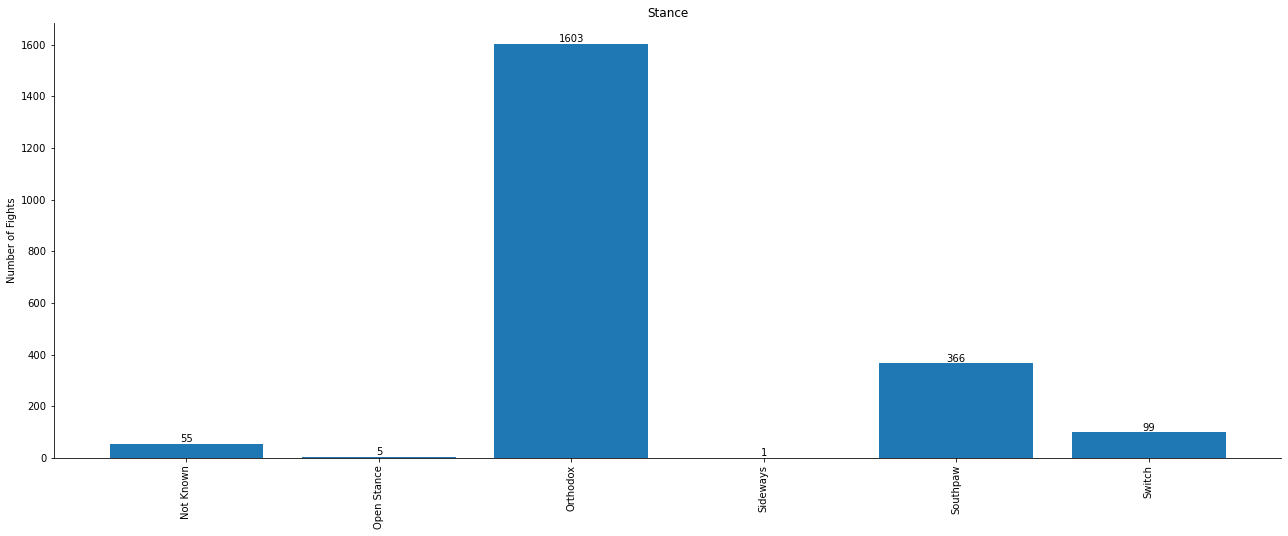

In [165]:
# plot the stance data
plot_bar(fighters_st_B, 'Fighters Stances Adjusted', 'Stance')

In [166]:
# count the NaN values per weight class
nan_count = fighters_st_B['Stance'].isna().groupby(fighters_st_B['Weight class']).sum()
nan_count

Weight class
Bantamweight             0
Catch Weight             0
Featherweight            0
Flyweight                0
Heavyweight              0
Light Heavyweight        0
Lightweight              0
Middleweight             0
Welterweight             0
Women's Bantamweight     0
Women's Featherweight    0
Women's Flyweight        0
Women's Strawweight      0
Name: Stance, dtype: int64

In [167]:
# count again how many of each stance there is used per weight class
stance_count_wc2 = fighters_st_B.groupby(['Weight class','Stance'])['Stance'].count()
stance_wc_count2 = stance_count_wc2.to_frame('count')
stance_wc2 = stance_wc_count2.reset_index()
stance_wc2

,Weight class,Stance,count
0,Bantamweight,Not Known,4
1,Bantamweight,Orthodox,140
2,Bantamweight,Southpaw,32
3,Bantamweight,Switch,15
4,Catch Weight,Orthodox,9
5,Catch Weight,Southpaw,4
6,Featherweight,Not Known,4
7,Featherweight,Orthodox,162
8,Featherweight,Southpaw,27
9,Featherweight,Switch,13


In [168]:
# Seperate out each weight class
Bantamweight = stance_wc2[stance_wc2['Weight class'].str.contains('Bantamweight', na=False)]            
Catch_Weight = stance_wc2[stance_wc2['Weight class'].str.contains('Catch Weight', na=False)]            
Featherweight = stance_wc2[stance_wc2['Weight class'].str.contains('Featherweight', na=False)]           
Flyweight = stance_wc2[stance_wc2['Weight class'].str.contains('Flyweight', na=False)]                
Heavyweight = stance_wc2[stance_wc2['Weight class'].str.contains('Heavyweight', na=False)]              
Light_Heavyweight = stance_wc2[stance_wc2['Weight class'].str.contains('Light Heavyweight', na=False)] 
Lightweight = stance_wc2[stance_wc2['Weight class'].str.contains('Lightweight', na=False)]      
Middleweight = stance_wc2[stance_wc2['Weight class'].str.contains('Middleweight', na=False)]             
Welterweight = stance_wc2[stance_wc2['Weight class'].str.contains('Welterweight', na=False)]           
Women_Bantamweight = stance_wc2[stance_wc2['Weight class'].str.contains("Women's Bantamweight", na=False)] 
Women_Featherweight = stance_wc2[stance_wc2['Weight class'].str.contains("Women's Featherweight", na=False)]   
Women_Flyweight = stance_wc2[stance_wc2['Weight class'].str.contains("Women's Flyweight", na=False)]  
Women_Strawweight = stance_wc2[stance_wc2['Weight class'].str.contains("Women's Strawweight", na=False)] 

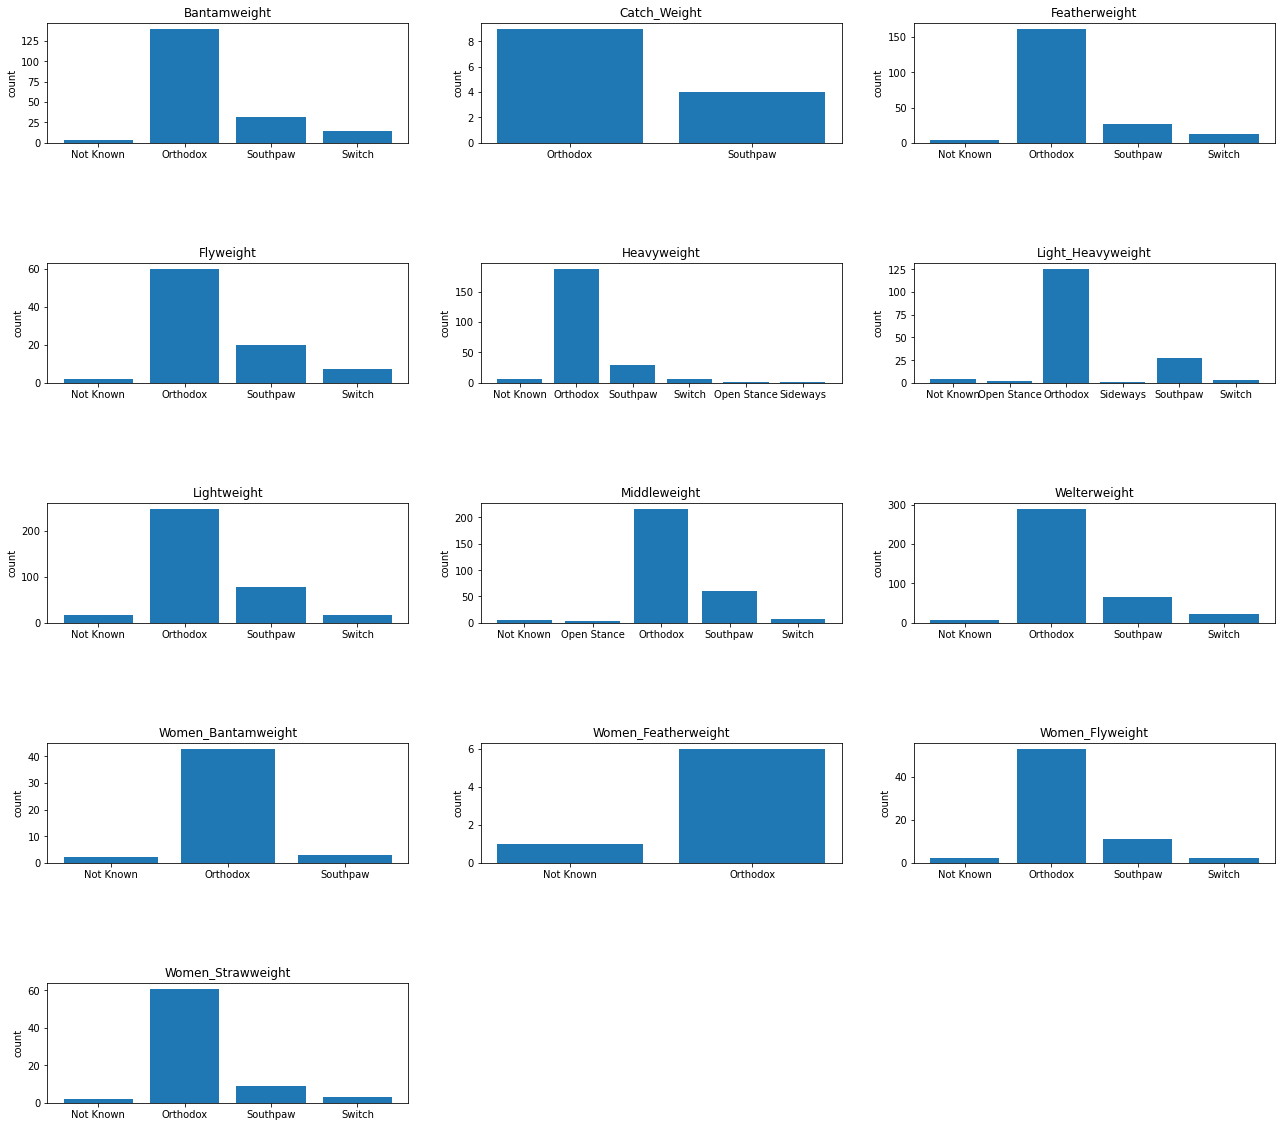

In [169]:
# add bar charts
plt.subplot(5,3,1)
plt.bar(Bantamweight['Stance'], Bantamweight['count'])
plt.title('Bantamweight')
plt.ylabel('count')

plt.subplot(5,3,2)
plt.bar(Catch_Weight['Stance'], Catch_Weight['count'])
plt.title('Catch_Weight')
plt.ylabel('count')

plt.subplot(5,3,3)
plt.bar(Featherweight['Stance'], Featherweight['count'])
plt.title('Featherweight')
plt.ylabel('count')

plt.subplot(5,3,4)
plt.bar(Flyweight['Stance'], Flyweight['count'])
plt.title('Flyweight')
plt.ylabel('count')

plt.subplot(5,3,5)
plt.bar(Heavyweight['Stance'], Heavyweight['count'])
plt.title('Heavyweight')
plt.ylabel('count')

plt.subplot(5,3,6)
plt.bar(Light_Heavyweight['Stance'], Light_Heavyweight['count'])
plt.title('Light_Heavyweight')
plt.ylabel('count')

plt.subplot(5,3,7)
plt.bar(Lightweight['Stance'], Lightweight['count'])
plt.title('Lightweight')
plt.ylabel('count')

plt.subplot(5,3,8)
plt.bar(Middleweight['Stance'], Middleweight['count'])
plt.title('Middleweight')
plt.ylabel('count')

plt.subplot(5,3,9)
plt.bar(Welterweight['Stance'], Welterweight['count'])
plt.title('Welterweight')
plt.ylabel('count')

plt.subplot(5,3,10)
plt.bar(Women_Bantamweight['Stance'], Women_Bantamweight['count'])
plt.title('Women_Bantamweight')
plt.ylabel('count')

plt.subplot(5,3,11)
plt.bar(Women_Featherweight['Stance'], Women_Featherweight['count'])
plt.title('Women_Featherweight')
plt.ylabel('count')

plt.subplot(5,3,12)
plt.bar(Women_Flyweight['Stance'], Women_Flyweight['count'])
plt.title('Women_Flyweight')
plt.ylabel('count')

plt.subplot(5,3,13)
plt.bar(Women_Strawweight['Stance'], Women_Strawweight['count'])
plt.title('Women_Strawweight')
plt.ylabel('count')

plt.subplots_adjust(top=2, hspace=1.0)
plt.savefig('../graphs/weight_class_stances_adjusted.jpg', bbox_inches="tight", dpi=150)
plt.show()

In [170]:
# print fighter 1 info
print(fighter_stance_df[['Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1','Wins F_1','Losses F_1','Draws F_1',
                    'DOB F_1','KD F_1', 'Sig. str. landed F_1',
                    'Sig. str. thrown F_1','Sig. str. % F_1',
                    'Total str. landed F_1', 'Total str. thrown F_1',
                    'Td completed F_1','Td attempted F_1','Td % F_1',
                    'Sub. att F_1', 'Rev. F_1', 'Ctrl F_1',
                    'Head landed F_1', 'Head thrown F_1',
                    'Body landed F_1','Body thrown F_1',
                    'Leg landed F_1', 'Leg thrown F_1',
                    'Distance landed F_1','Distance thrown F_1',
                    'Clinch landed F_1','Clinch thrown F_1',
                    'Ground landed F_1','Ground thrown F_1']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 1              6158 non-null   object 
 1   Height F_1             6158 non-null   float64
 2   Weight F_1             6158 non-null   float64
 3   Reach F_1              6158 non-null   float64
 4   Stance F_1             6158 non-null   object 
 5   Wins F_1               6158 non-null   int64  
 6   Losses F_1             6158 non-null   int64  
 7   Draws F_1              6158 non-null   int64  
 8   DOB F_1                6132 non-null   object 
 9   KD F_1                 6158 non-null   float64
 10  Sig. str. landed F_1   6158 non-null   float64
 11  Sig. str. thrown F_1   6158 non-null   float64
 12  Sig. str. % F_1        6136 non-null   float64
 13  Total str. landed F_1  6158 non-null   float64
 14  Total str. thrown F_1  6158 non-null   float64
 15  Td c

In [171]:
# Print Fighter 2 data info
print(fighter_stance_df[['Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2','Wins F_2','Losses F_2','Draws F_2',
                    'DOB F_2','KD F_2', 'Sig. str. landed F_2',
                    'Sig. str. thrown F_2','Sig. str. % F_2',
                    'Total str. landed F_2', 'Total str. thrown F_2',
                    'Td completed F_2','Td attempted F_2','Td % F_2',
                    'Sub. att F_2', 'Rev. F_2', 'Ctrl F_2',
                    'Head landed F_2', 'Head thrown F_2',
                    'Body landed F_2','Body thrown F_2',
                    'Leg landed F_2', 'Leg thrown F_2',
                    'Distance landed F_2','Distance thrown F_2',
                    'Clinch landed F_2','Clinch thrown F_2',
                    'Ground landed F_2','Ground thrown F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 2              6158 non-null   object 
 1   Height F_2             6158 non-null   float64
 2   Weight F_2             6158 non-null   float64
 3   Reach F_2              6158 non-null   float64
 4   Stance F_2             6158 non-null   object 
 5   Wins F_2               6158 non-null   int64  
 6   Losses F_2             6158 non-null   int64  
 7   Draws F_2              6158 non-null   int64  
 8   DOB F_2                6058 non-null   object 
 9   KD F_2                 6158 non-null   float64
 10  Sig. str. landed F_2   6158 non-null   float64
 11  Sig. str. thrown F_2   6158 non-null   float64
 12  Sig. str. % F_2        6117 non-null   float64
 13  Total str. landed F_2  6158 non-null   float64
 14  Total str. thrown F_2  6158 non-null   float64
 15  Td c

## Fighter Date of Birth

The fighters date of birth is the last column for the fighter info that needs imputation <br>
Invetigation into which method would suit the best will be done. <br>
I will be looking at the type of missigness in this column and investigate <br>
Mean and Mode versions of imputation for this column. <br>

In [172]:
# duplicate fighter dataframe so for
fighter_dob_df = fighter_stance_df.copy()

In [173]:
# print fights with missing DOB
missing_dob = fighter_dob_df[fighter_dob_df['DOB F_1'].isnull() | fighter_dob_df['DOB F_2'].isnull()]
missing_dob

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
4604,UFC on FOX: Velasquez vs Dos Santos,2011-11-12,Light Heavyweight,Aaron Rosa,Matt Lucas,Decision,Majority Decision,3,300,Aaron Rosa,...,0.0,0.0,0.0,0.0,14.0,34.0,4.0,4.0,1.0,1.0
4727,UFC Live: Kongo vs Barry,2011-06-26,Lightweight,Joe Lauzon,Curt Warburton,SUB,Kimura,1,118,Joe Lauzon,...,1.0,1.0,0.0,0.0,5.0,23.0,0.0,0.0,0.0,0.0
4820,UFC 127: Penn vs Fitch,2011-02-26,Light Heavyweight,Anthony Perosh,Tom Blackledge,SUB,Rear Naked Choke,1,165,Anthony Perosh,...,1.0,1.0,1.0,1.0,4.0,9.0,0.0,0.0,4.0,4.0
4825,UFC 127: Penn vs Fitch,2011-02-26,Lightweight,Curt Warburton,Maciej Jewtuszko,Decision,Unanimous Decision,3,300,Curt Warburton,...,9.0,9.0,2.0,3.0,26.0,61.0,4.0,6.0,0.0,0.0
4898,UFC 122: Marquardt vs Okami,2010-11-13,Welterweight,Pascal Krauss,Mark Scanlon,Decision,Unanimous Decision,3,300,Pascal Krauss,...,2.0,7.0,3.0,4.0,26.0,79.0,3.0,9.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,UFC 13: The Ultimate Force,1997-05-30,Lightweight,Jack Nilson,Saeed Hosseini,KO/TKO,Elbow,1,83,Jack Nilson,...,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,0.0,0.0
6337,UFC 13: The Ultimate Force,1997-05-30,Lightweight,Tito Ortiz,Wes Albritton,KO/TKO,Punch,1,31,Tito Ortiz,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6340,UFC 12: Judgement Day,1997-02-07,Lightweight,Jerry Bohlander,Nick Sanzo,SUB,Neck Crank,1,39,Jerry Bohlander,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6342,UFC 12: Judgement Day,1997-02-07,Heavyweight,Scott Ferrozzo,Jim Mullen,KO/TKO,Knee,1,482,Scott Ferrozzo,...,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,0.0,0.0


In [174]:
# create df of fighters
fighters_dob1 = fighter_dob_df.copy()
fighters_dob2 = fighter_dob_df.copy()

# keep columns wanted
fighters_dob1 = fighters_dob1.reindex(columns=['Weight class','Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1', 'DOB F_1', 'Wins F_1', 'Losses F_1', 'Draws F_1'])

fighters_dob2 = fighters_dob2.reindex(columns=['Weight class','Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2','DOB F_2', 'Wins F_2', 'Losses F_2', 'Draws F_2'])

# rename the columns to concatenate
fighters_dob1.rename(columns={'Fighter 1':'Fighter','Height F_1':'Height', 
                             'Weight F_1':'Height','Reach F_1':'Reach',
                             'Stance F_1':'Stance', 'DOB F_1': 'DOB',
                             'Wins F_1':'Wins', 'Losses F_1':'Losses', 'Draws F_1':'Draws'}, inplace=True)

fighters_dob2.rename(columns={'Fighter 2':'Fighter','Height F_2':'Height', 
                             'Weight F_2':'Height','Reach F_2':'Reach',
                             'Stance F_2':'Stance', 'DOB F_2': 'DOB',
                             'Wins F_2':'Wins', 'Losses F_2':'Losses', 'Draws F_2':'Draws'}, inplace=True)

# concatenate together
fighters_dob = pd.concat([fighters_dob1, fighters_dob2])
#drop duplicates
fighters_dob.drop_duplicates(subset=['Fighter'], inplace=True)
fighters_dob

,Weight class,Fighter,Height,Height,Reach,Stance,DOB,Wins,Losses,Draws
0,Light Heavyweight,Glover Teixeira,74.0,205.0,76.0,Orthodox,1979-10-28,33,7,0
1,Bantamweight,Petr Yan,67.0,135.0,67.0,Switch,1993-02-11,16,2,0
2,Lightweight,Islam Makhachev,70.0,155.0,70.0,Southpaw,1991-10-27,21,1,0
3,Heavyweight,Alexander Volkov,79.0,250.0,80.0,Orthodox,1988-10-24,34,9,0
4,Welterweight,Khamzat Chimaev,74.0,170.0,75.0,Orthodox,1994-05-01,10,0,0
...,...,...,...,...,...,...,...,...,...,...
6337,Lightweight,Wes Albritton,70.0,188.0,73.0,Orthodox,NaN,0,1,0
6340,Lightweight,Nick Sanzo,69.0,190.0,76.0,Not Known,NaN,1,1,0
6342,Heavyweight,Jim Mullen,73.0,215.0,72.0,Southpaw,NaN,0,2,0
6343,Lightweight,Wallid Ismail,67.0,205.0,70.0,Orthodox,1968-02-23,9,3,0


In [175]:
# add age
now = pd.Timestamp('now')
fighters_dob['DOB'] = pd.to_datetime(fighters_dob['DOB'], format='%Y-%m-%d')

fighters_dob['Age'] = (now - fighters_dob['DOB']).astype('<m8[Y]') 
fighters_dob

,Weight class,Fighter,Height,Height,Reach,Stance,DOB,Wins,Losses,Draws,Age
0,Light Heavyweight,Glover Teixeira,74.0,205.0,76.0,Orthodox,1979-10-28,33,7,0,42.0
1,Bantamweight,Petr Yan,67.0,135.0,67.0,Switch,1993-02-11,16,2,0,28.0
2,Lightweight,Islam Makhachev,70.0,155.0,70.0,Southpaw,1991-10-27,21,1,0,30.0
3,Heavyweight,Alexander Volkov,79.0,250.0,80.0,Orthodox,1988-10-24,34,9,0,33.0
4,Welterweight,Khamzat Chimaev,74.0,170.0,75.0,Orthodox,1994-05-01,10,0,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
6337,Lightweight,Wes Albritton,70.0,188.0,73.0,Orthodox,NaT,0,1,0,NaN
6340,Lightweight,Nick Sanzo,69.0,190.0,76.0,Not Known,NaT,1,1,0,NaN
6342,Heavyweight,Jim Mullen,73.0,215.0,72.0,Southpaw,NaT,0,2,0,NaN
6343,Lightweight,Wallid Ismail,67.0,205.0,70.0,Orthodox,1968-02-23,9,3,0,53.0


In [176]:
# create dataframes for the null and the not null DOB
fighters_dob_empty = fighters_dob[fighters_dob['DOB'].isnull()].copy()
fighters_dob_Notnull = fighters_dob[fighters_dob['DOB'].notnull()].copy()

In [177]:
print('Not Null DOBs: ' + str(len(fighters_dob_Notnull)) + ' Null DOBs: ' + str(len(fighters_dob_empty)))

Not Null DOBs: 2039 Null DOBs: 90


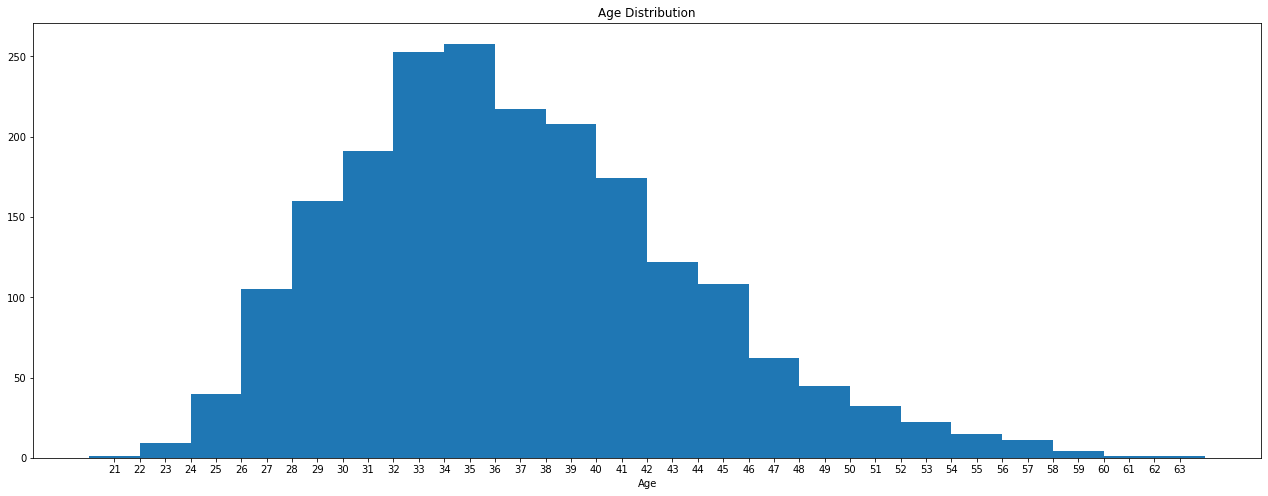

In [178]:
# plot distribution of ages 
bin_size = [20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64]
plt.plot()
plt.hist(fighters_dob_Notnull['Age'], bins=bin_size)
plt.xticks(np.arange(min(fighters_dob_Notnull['Age']), max(fighters_dob_Notnull['Age'])+1, 1.0))
plt.title('Age Distribution')
plt.xlabel('Age')

plt.savefig('../graphs/Age Distribution.jpg', bbox_inches="tight", dpi=150)
plt.show()

The age distribution appears normal, although slightly skewed towareds the younger end of the <br>
distribution, it also appears centered around the 32 to 35 year age group. Which would make sense <br>
for a physical sport such as MMA.

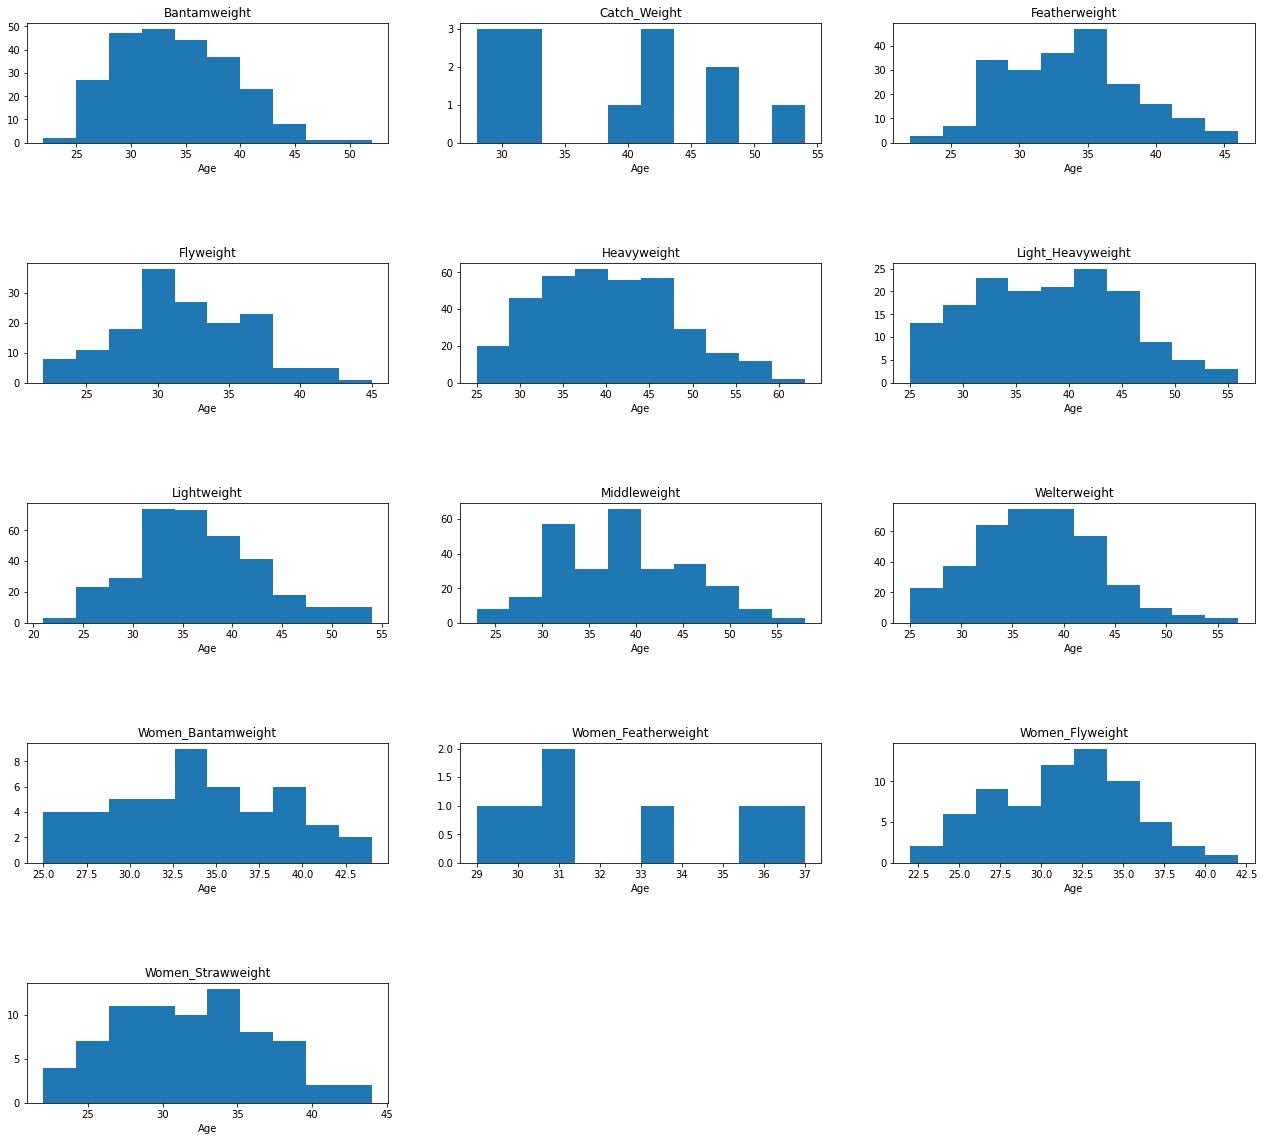

In [179]:
# plot distribution of ages per weight class
plt.subplot(5,3,1)
Bantamweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Bantamweight', na=False)] 
plt.hist(Bantamweight['Age'])
plt.title('Bantamweight')
plt.xlabel('Age')

plt.subplot(5,3,2)
Catch_Weight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Catch Weight', na=False)] 
plt.hist(Catch_Weight['Age'])
plt.title('Catch_Weight')
plt.xlabel('Age')

plt.subplot(5,3,3)
Featherweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Featherweight', na=False)] 
plt.hist(Featherweight['Age'])
plt.title('Featherweight')
plt.xlabel('Age')

plt.subplot(5,3,4)         
Flyweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Flyweight', na=False)]                
plt.hist(Flyweight['Age'])
plt.title('Flyweight')
plt.xlabel('Age')

plt.subplot(5,3,5)
Heavyweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Heavyweight', na=False)]              
plt.hist(Heavyweight['Age'])
plt.title('Heavyweight')
plt.xlabel('Age')

plt.subplot(5,3,6)
Light_Heavyweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Light Heavyweight', na=False)] 
plt.hist(Light_Heavyweight['Age'])
plt.title('Light_Heavyweight')
plt.xlabel('Age')

plt.subplot(5,3,7)
Lightweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Lightweight', na=False)]      
plt.hist(Lightweight['Age'])
plt.title('Lightweight')
plt.xlabel('Age')

plt.subplot(5,3,8)
Middleweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Middleweight', na=False)]             
plt.hist(Middleweight['Age'])
plt.title('Middleweight')
plt.xlabel('Age')

plt.subplot(5,3,9)
Welterweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Welterweight', na=False)]           
plt.hist(Welterweight['Age'])
plt.title('Welterweight')
plt.xlabel('Age')

plt.subplot(5,3,10)
Women_Bantamweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains("Women's Bantamweight", na=False)] 
plt.hist(Women_Bantamweight['Age'])
plt.title('Women_Bantamweight')
plt.xlabel('Age')

plt.subplot(5,3,11)
Women_Featherweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains("Women's Featherweight", na=False)]   
plt.hist(Women_Featherweight['Age'])
plt.title('Women_Featherweight')
plt.xlabel('Age')

plt.subplot(5,3,12)
Women_Flyweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains("Women's Flyweight", na=False)]  
plt.hist(Women_Flyweight['Age'])
plt.title('Women_Flyweight')
plt.xlabel('Age')

plt.subplot(5,3,13)
Women_Strawweight = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains("Women's Strawweight", na=False)]
plt.hist(Women_Strawweight['Age'])
plt.title('Women_Strawweight')
plt.xlabel('Age')

plt.subplots_adjust(top=2, hspace=1.0)
plt.savefig('../graphs/weight_class_ages.jpg', bbox_inches="tight", dpi=150)
plt.show()

When looking at the age distribution per weight class it is a different picture. <br>
The median age still appears to be in the mid to early 30's. <br>

We can check the median and mode dates of birth overall as well as broken down by weight class. <br>


In [180]:
# median dob
median_dob = fighters_dob_Notnull['DOB'].median()
median_dob

Timestamp('1985-11-09 00:00:00')

In [181]:
# mean dob
mean_dob = fighters_dob_Notnull['DOB'].mean()
mean_dob

Timestamp('1985-01-14 08:11:32.103972544')

In [182]:
# mode of DOB
mode_dob = fighters_dob_Notnull['DOB'].mode()
mode_dob

0   1987-01-21
dtype: datetime64[ns]

The median and mean DOB are very close in year 1985, while the mode is 1987<br>
<br>
Check by weight class next.

In [183]:
# median dob by weight class
median_dob_wc = fighters_dob_Notnull.groupby(['Weight class'])['DOB'].agg(pd.Series.median).to_frame()
median_dob_wc 

,DOB
Weight class,
Bantamweight,1988-02-21 00:00:00
Catch Weight,1981-01-22 00:00:00
Featherweight,1988-02-29 00:00:00
Flyweight,1988-08-25 12:00:00
Heavyweight,1980-02-07 00:00:00
Light Heavyweight,1983-04-26 12:00:00
Lightweight,1985-02-12 00:00:00
Middleweight,1982-11-15 00:00:00
Welterweight,1984-04-10 00:00:00


In [184]:
# mean dob by weight class
mean_dob_wc = fighters_dob_Notnull.groupby(['Weight class'])['DOB'].agg(pd.Series.mean).to_frame()
mean_dob_wc 

,DOB
Weight class,
Bantamweight,1988-01-05 12:56:32.670157056
Catch Weight,1983-01-18 16:36:55.384615360
Featherweight,1987-11-04 21:33:12.233009728
Flyweight,1988-08-18 23:27:16.363636352
Heavyweight,1979-12-30 14:58:13.069306944
Light Heavyweight,1983-02-22 08:09:13.846153856
Lightweight,1984-11-29 00:17:05.519287808
Middleweight,1983-01-17 00:47:17.956204352
Welterweight,1983-12-22 22:08:20.534759360


In [185]:
# mode of dob by weight class
mode_dob_wc = fighters_dob_Notnull.groupby(['Weight class'])['DOB'].agg(pd.Series.mode).to_frame()
mode_dob_wc

,DOB
Weight class,
Bantamweight,"[1984-09-26 00:00:00, 1987-01-21 00:00:00]"
Catch Weight,"[1966-12-12 00:00:00, 1974-02-08 00:00:00, 197..."
Featherweight,1986-03-14 00:00:00
Flyweight,"[1976-09-08 00:00:00, 1979-08-30 00:00:00, 197..."
Heavyweight,"[1965-02-24 00:00:00, 1971-01-18 00:00:00, 197..."
Light Heavyweight,"[1981-11-27 00:00:00, 1984-09-25 00:00:00, 198..."
Lightweight,"[1973-08-05 00:00:00, 1981-12-08 00:00:00, 198..."
Middleweight,"[1981-05-19 00:00:00, 1981-09-26 00:00:00, 198..."
Welterweight,"[1974-11-26 00:00:00, 1982-09-22 00:00:00, 198..."


In [186]:
# check where the NaN values are for DOB
empty_dob_wc = fighters_dob_empty['DOB'].isna().groupby(fighters_dob_empty['Weight class']).sum().to_frame()
empty_dob_wc

,DOB
Weight class,
Heavyweight,29
Light Heavyweight,7
Lightweight,23
Middleweight,20
Welterweight,11


For imputing the missing values in the DOB I will use the mean age for each weight class. <br>
From the values above there is a central tendancy for each weight class. I will use this <br>
instead of the overall mean value. <br>

In [187]:
# get the mean for each needed weight class
hw = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Heavyweight', na=False)] 
hw_mean = hw['DOB'].mean()
hw_mean = pd.DatetimeIndex([hw_mean]).normalize()[0]

lhw = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Light Heavyweight',na=False)] 
lhw_mean= lhw['DOB'].mean()
lhw_mean = pd.DatetimeIndex([lhw_mean]).normalize()[0]

lw = fighters_dob_Notnull[ fighters_dob_Notnull['Weight class'].str.contains('Lightweight',na=False)] 
lw_mean= lw['DOB'].mean()
lw_mean = pd.DatetimeIndex([lw_mean]).normalize()[0]

mw = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Middleweight',na=False)] 
mw_mean= mw['DOB'].mean()
mw_mean = pd.DatetimeIndex([mw_mean]).normalize()[0]

ww = fighters_dob_Notnull[fighters_dob_Notnull['Weight class'].str.contains('Welterweight', na=False)] 
ww_mean= ww['DOB'].mean()
ww_mean = pd.DatetimeIndex([ww_mean]).normalize()[0]

In [188]:
# print the values
print('Heavyweight: ' +str(hw_mean))
print('Light Heavyweight: ' +str(lhw_mean))
print('Lightweight: ' +str(lw_mean))
print('Middleweight: ' +str(mw_mean))
print('Welterweight: ' +str(ww_mean))

Heavyweight: 1981-05-14 00:00:00
Light Heavyweight: 1983-02-22 00:00:00
Lightweight: 1984-11-29 00:00:00
Middleweight: 1983-01-17 00:00:00
Welterweight: 1983-12-22 00:00:00


#### Impute the DOB values for each weight class

In [189]:
# Heavyweight Fighter 1
fighter_dob_df['DOB F_1'] = np.where(fighter_dob_df['DOB F_1'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Heavyweight', na=False),
                                    hw_mean, fighter_dob_df['DOB F_1'] )

# Heavyweight Fighter 2
fighter_dob_df['DOB F_2'] = np.where(fighter_dob_df['DOB F_2'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Heavyweight',na=False),
                                    hw_mean, fighter_dob_df['DOB F_2'] )

# Lightweight Fighter 1
fighter_dob_df['DOB F_1'] = np.where(fighter_dob_df['DOB F_1'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Lightweight', na=False),
                                    lw_mean, fighter_dob_df['DOB F_1'] )

# Lightweight Fighter 2
fighter_dob_df['DOB F_2'] = np.where(fighter_dob_df['DOB F_2'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Lightweight',na=False),
                                    lw_mean, fighter_dob_df['DOB F_2'] )

# Light Heavyweight Fighter 1
fighter_dob_df['DOB F_1'] = np.where(fighter_dob_df['DOB F_1'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Light Heavyweight', na=False),
                                    lhw_mean, fighter_dob_df['DOB F_1'] )

# Light Heavyweight Fighter 2
fighter_dob_df['DOB F_2'] = np.where(fighter_dob_df['DOB F_2'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Light Heavyweight',na=False),
                                    lhw_mean, fighter_dob_df['DOB F_2'] )

# Middleweight Fighter 1
fighter_dob_df['DOB F_1'] = np.where(fighter_dob_df['DOB F_1'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Middleweight',na=False),
                                    mw_mean, fighter_dob_df['DOB F_1'] )

# Middleweight Fighter 2
fighter_dob_df['DOB F_2'] = np.where(fighter_dob_df['DOB F_2'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Middleweight',na=False),
                                    mw_mean, fighter_dob_df['DOB F_2'] )

# Welterweight Fighter 1
fighter_dob_df['DOB F_1'] = np.where(fighter_dob_df['DOB F_1'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Welterweight',na=False),
                                    ww_mean, fighter_dob_df['DOB F_1'] )

# Welterweight Fighter 2
fighter_dob_df['DOB F_2'] = np.where(fighter_dob_df['DOB F_2'].isna() & 
                                     fighter_dob_df['Weight class'].str.contains('Welterweight', na=False),
                                    ww_mean, fighter_dob_df['DOB F_2'] )

In [190]:
# print fighter 1 info
print(fighter_dob_df[['Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1','Wins F_1','Losses F_1','Draws F_1',
                    'DOB F_1','KD F_1', 'Sig. str. landed F_1',
                    'Sig. str. thrown F_1','Sig. str. % F_1',
                    'Total str. landed F_1', 'Total str. thrown F_1',
                    'Td completed F_1','Td attempted F_1','Td % F_1',
                    'Sub. att F_1', 'Rev. F_1', 'Ctrl F_1',
                    'Head landed F_1', 'Head thrown F_1',
                    'Body landed F_1','Body thrown F_1',
                    'Leg landed F_1', 'Leg thrown F_1',
                    'Distance landed F_1','Distance thrown F_1',
                    'Clinch landed F_1','Clinch thrown F_1',
                    'Ground landed F_1','Ground thrown F_1']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 1              6158 non-null   object 
 1   Height F_1             6158 non-null   float64
 2   Weight F_1             6158 non-null   float64
 3   Reach F_1              6158 non-null   float64
 4   Stance F_1             6158 non-null   object 
 5   Wins F_1               6158 non-null   int64  
 6   Losses F_1             6158 non-null   int64  
 7   Draws F_1              6158 non-null   int64  
 8   DOB F_1                6158 non-null   object 
 9   KD F_1                 6158 non-null   float64
 10  Sig. str. landed F_1   6158 non-null   float64
 11  Sig. str. thrown F_1   6158 non-null   float64
 12  Sig. str. % F_1        6136 non-null   float64
 13  Total str. landed F_1  6158 non-null   float64
 14  Total str. thrown F_1  6158 non-null   float64
 15  Td c

In [191]:
# Print Fighter 2 data info
print(fighter_dob_df[['Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2','Wins F_2','Losses F_2','Draws F_2',
                    'DOB F_2','KD F_2', 'Sig. str. landed F_2',
                    'Sig. str. thrown F_2','Sig. str. % F_2',
                    'Total str. landed F_2', 'Total str. thrown F_2',
                    'Td completed F_2','Td attempted F_2','Td % F_2',
                    'Sub. att F_2', 'Rev. F_2', 'Ctrl F_2',
                    'Head landed F_2', 'Head thrown F_2',
                    'Body landed F_2','Body thrown F_2',
                    'Leg landed F_2', 'Leg thrown F_2',
                    'Distance landed F_2','Distance thrown F_2',
                    'Clinch landed F_2','Clinch thrown F_2',
                    'Ground landed F_2','Ground thrown F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 2              6158 non-null   object 
 1   Height F_2             6158 non-null   float64
 2   Weight F_2             6158 non-null   float64
 3   Reach F_2              6158 non-null   float64
 4   Stance F_2             6158 non-null   object 
 5   Wins F_2               6158 non-null   int64  
 6   Losses F_2             6158 non-null   int64  
 7   Draws F_2              6158 non-null   int64  
 8   DOB F_2                6158 non-null   object 
 9   KD F_2                 6158 non-null   float64
 10  Sig. str. landed F_2   6158 non-null   float64
 11  Sig. str. thrown F_2   6158 non-null   float64
 12  Sig. str. % F_2        6117 non-null   float64
 13  Total str. landed F_2  6158 non-null   float64
 14  Total str. thrown F_2  6158 non-null   float64
 15  Td c

# Sig. str. % ,  TD % and Ctrl

The remainging columns left that have empty(Null values) are:<br>
1. The signiture strikes % 
2. Takedown %
3. Control
<br><br>
We can investigate to see why these are null but from initial visual inspection<br>
these are empty in the % columns as it would be divided by zero.<br>
For the Contrl column it would be the fighter didn't acrue any seconds of control while<br>
in a ground position.

In [192]:
# duplicate the fighter_dob_df dataframe to date
fighter_stats_df = fighter_dob_df.copy()

In [193]:
# fighter strikes %
fighter_stats_str = fighter_stats_df[fighter_stats_df['Sig. str. % F_1'].isna() | fighter_stats_df['Sig. str. % F_2'].isna()]

# fighter Td % F_2ghter takedown %
fighter_stats_td = fighter_stats_df[fighter_stats_df['Td % F_1'].isna() | fighter_stats_df['Td % F_2'].isna()]

#  fighter control
fighter_stats_ctrl = fighter_stats_df[fighter_stats_df['Ctrl F_1'].isna() | fighter_stats_df['Ctrl F_2'].isna()]


In [194]:
# show strike % nan
fighter_stats_str[['Sig. str. landed F_1','Sig. str. thrown F_1', 'Sig. str. % F_1',
                  'Sig. str. landed F_2','Sig. str. thrown F_2', 'Sig. str. % F_2']]

,Sig. str. landed F_1,Sig. str. thrown F_1,Sig. str. % F_1,Sig. str. landed F_2,Sig. str. thrown F_2,Sig. str. % F_2
154,1.0,1.0,1.00,0.0,0.0,NaN
208,4.0,5.0,0.80,0.0,0.0,NaN
271,0.0,0.0,NaN,1.0,2.0,0.50
654,40.0,62.0,0.64,0.0,0.0,NaN
1132,3.0,3.0,1.00,0.0,0.0,NaN
1259,5.0,5.0,1.00,0.0,0.0,NaN
1445,9.0,15.0,0.60,0.0,0.0,NaN
1570,0.0,2.0,0.00,0.0,0.0,NaN
1910,1.0,9.0,0.11,0.0,0.0,NaN
1990,0.0,1.0,0.00,0.0,0.0,NaN


In [195]:
# show takedown % nan
fighter_stats_td[['Td completed F_1','Td attempted F_1','Td % F_1',
                 'Td completed F_2','Td attempted F_2','Td % F_2']]


,Td completed F_1,Td attempted F_1,Td % F_1,Td completed F_2,Td attempted F_2,Td % F_2
0,2.0,6.0,0.33,0.0,0.0,NaN
2,1.0,1.0,1.00,0.0,0.0,NaN
3,0.0,0.0,NaN,0.0,16.0,0.0
4,1.0,2.0,0.50,0.0,0.0,NaN
7,2.0,7.0,0.28,0.0,0.0,NaN
...,...,...,...,...,...,...
6338,0.0,0.0,NaN,0.0,3.0,0.0
6339,0.0,0.0,NaN,0.0,0.0,NaN
6341,0.0,0.0,NaN,0.0,0.0,NaN
6342,2.0,2.0,1.00,0.0,0.0,NaN


In [196]:
# show figther control
fighter_stats_ctrl[['Sub. att F_1', 'Rev. F_1','Ctrl F_1',
                   'Sub. att F_2', 'Rev. F_2','Ctrl F_2']]


,Sub. att F_1,Rev. F_1,Ctrl F_1,Sub. att F_2,Rev. F_2,Ctrl F_2
6239,0.0,0.0,NaN,1.0,0.0,NaN
6254,1.0,0.0,NaN,0.0,0.0,NaN
6255,0.0,0.0,NaN,0.0,0.0,NaN
6256,2.0,0.0,NaN,0.0,0.0,NaN
6257,0.0,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...
6340,1.0,0.0,NaN,0.0,0.0,NaN
6341,0.0,0.0,NaN,0.0,0.0,NaN
6342,1.0,0.0,NaN,0.0,0.0,NaN
6343,0.0,0.0,NaN,0.0,0.0,NaN


For the sig str % we can fill the na with zero as the NaN is the results of 0 division between<br>
Sig strike thrown versus Sig strike landed.

In [197]:
# fill nan sig str % with 0
fighter_stats_df['Sig. str. % F_1'] = fighter_stats_df['Sig. str. % F_1'].fillna(0)
fighter_stats_df['Sig. str. % F_2'] = fighter_stats_df['Sig. str. % F_2'].fillna(0)

In [198]:
# check for NaN in the sig str % columns again
fighter_stats_str = fighter_stats_df[fighter_stats_df['Sig. str. % F_1'].isna() | fighter_stats_df['Sig. str. % F_2'].isna()]

# show strike % nan
fighter_stats_str[['Sig. str. landed F_1','Sig. str. thrown F_1', 'Sig. str. % F_1',
                  'Sig. str. landed F_2','Sig. str. thrown F_2', 'Sig. str. % F_2']]

,Sig. str. landed F_1,Sig. str. thrown F_1,Sig. str. % F_1,Sig. str. landed F_2,Sig. str. thrown F_2,Sig. str. % F_2


Filling NaN in strikes % completed.<br>
<br>

For the TD % we can fill the na with zero as the NaN is the results of 0 division between<br>
Takedowns attempted versus Takedown complete.<br>

In [199]:
# fill nan in TD% with 0
fighter_stats_df['Td % F_1'] = fighter_stats_df['Td % F_1'].fillna(0)
fighter_stats_df['Td % F_2'] = fighter_stats_df['Td % F_2'].fillna(0)

In [200]:
# check for NaNs for takedowns again
fighter_stats_td = fighter_stats_df[fighter_stats_df['Td % F_1'].isna() | fighter_stats_df['Td % F_2'].isna()]

# show takedown % nan
fighter_stats_td[['Td completed F_1','Td attempted F_1','Td % F_1',
                 'Td completed F_2','Td attempted F_2','Td % F_2']]

,Td completed F_1,Td attempted F_1,Td % F_1,Td completed F_2,Td attempted F_2,Td % F_2


Filling NaN in TD % comepleted<br>
<br>
The Contrl column is where the fighter didn't acrue any seconds of control while in a ground position.<br>
NaN can be filled with 0

In [201]:
# fill NaN in Ctrl with 0
fighter_stats_df['Ctrl F_1'] = fighter_stats_df['Ctrl F_1'].fillna(0)
fighter_stats_df['Ctrl F_2'] = fighter_stats_df['Ctrl F_2'].fillna(0)

In [202]:
# check fighter control again
fighter_stats_ctrl = fighter_stats_df[fighter_stats_df['Ctrl F_1'].isna() | fighter_stats_df['Ctrl F_2'].isna()]

# show figther control
fighter_stats_ctrl[['Sub. att F_1', 'Rev. F_1','Ctrl F_1',
                   'Sub. att F_2', 'Rev. F_2','Ctrl F_2']]

,Sub. att F_1,Rev. F_1,Ctrl F_1,Sub. att F_2,Rev. F_2,Ctrl F_2


Filling NaN in Ctrl completed

With all empty values in the data dealt with we can check the Event, Fighter 1 and Fighter 2 info.

In [203]:
# print event info
print(fighter_stats_df[['Event', 'Date', 'Weight class', 'Winner', 'Loser', 'Win decided by', 'Win Method',
                    'Round', 'Time']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Event           6158 non-null   object
 1   Date            6158 non-null   object
 2   Weight class    6158 non-null   object
 3   Winner          6158 non-null   object
 4   Loser           6158 non-null   object
 5   Win decided by  6158 non-null   object
 6   Win Method      6158 non-null   object
 7   Round           6158 non-null   int64 
 8   Time            6158 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 481.1+ KB
None


In [204]:
# print fighter 1 info
print(fighter_stats_df[['Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1','Wins F_1','Losses F_1','Draws F_1',
                    'DOB F_1','KD F_1', 'Sig. str. landed F_1',
                    'Sig. str. thrown F_1','Sig. str. % F_1',
                    'Total str. landed F_1', 'Total str. thrown F_1',
                    'Td completed F_1','Td attempted F_1','Td % F_1',
                    'Sub. att F_1', 'Rev. F_1', 'Ctrl F_1',
                    'Head landed F_1', 'Head thrown F_1',
                    'Body landed F_1','Body thrown F_1',
                    'Leg landed F_1', 'Leg thrown F_1',
                    'Distance landed F_1','Distance thrown F_1',
                    'Clinch landed F_1','Clinch thrown F_1',
                    'Ground landed F_1','Ground thrown F_1']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 1              6158 non-null   object 
 1   Height F_1             6158 non-null   float64
 2   Weight F_1             6158 non-null   float64
 3   Reach F_1              6158 non-null   float64
 4   Stance F_1             6158 non-null   object 
 5   Wins F_1               6158 non-null   int64  
 6   Losses F_1             6158 non-null   int64  
 7   Draws F_1              6158 non-null   int64  
 8   DOB F_1                6158 non-null   object 
 9   KD F_1                 6158 non-null   float64
 10  Sig. str. landed F_1   6158 non-null   float64
 11  Sig. str. thrown F_1   6158 non-null   float64
 12  Sig. str. % F_1        6158 non-null   float64
 13  Total str. landed F_1  6158 non-null   float64
 14  Total str. thrown F_1  6158 non-null   float64
 15  Td c

In [205]:
# Print Fighter 2 data info
print(fighter_stats_df[['Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2','Wins F_2','Losses F_2','Draws F_2',
                    'DOB F_2','KD F_2', 'Sig. str. landed F_2',
                    'Sig. str. thrown F_2','Sig. str. % F_2',
                    'Total str. landed F_2', 'Total str. thrown F_2',
                    'Td completed F_2','Td attempted F_2','Td % F_2',
                    'Sub. att F_2', 'Rev. F_2', 'Ctrl F_2',
                    'Head landed F_2', 'Head thrown F_2',
                    'Body landed F_2','Body thrown F_2',
                    'Leg landed F_2', 'Leg thrown F_2',
                    'Distance landed F_2','Distance thrown F_2',
                    'Clinch landed F_2','Clinch thrown F_2',
                    'Ground landed F_2','Ground thrown F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 2              6158 non-null   object 
 1   Height F_2             6158 non-null   float64
 2   Weight F_2             6158 non-null   float64
 3   Reach F_2              6158 non-null   float64
 4   Stance F_2             6158 non-null   object 
 5   Wins F_2               6158 non-null   int64  
 6   Losses F_2             6158 non-null   int64  
 7   Draws F_2              6158 non-null   int64  
 8   DOB F_2                6158 non-null   object 
 9   KD F_2                 6158 non-null   float64
 10  Sig. str. landed F_2   6158 non-null   float64
 11  Sig. str. thrown F_2   6158 non-null   float64
 12  Sig. str. % F_2        6158 non-null   float64
 13  Total str. landed F_2  6158 non-null   float64
 14  Total str. thrown F_2  6158 non-null   float64
 15  Td c

# Data Type Conversion

Now with the data set fully cleaned, before export we can correct the datatypes for each column

In [206]:
main_df = fighter_stats_df.copy()

#### Integer Columns part 1

In [207]:
main_df[['Height F_1', 'Height F_2',
         'Weight F_1', 'Weight F_2', 
         'Reach F_1', 'Reach F_2']] = main_df[['Height F_1', 'Height F_2', 
                                               'Weight F_1', 'Weight F_2', 
                                               'Reach F_1', 'Reach F_2']].astype('int64')

In [208]:
# Print integer columns so far
print(main_df[['Height F_1', 'Height F_2',
         'Weight F_1', 'Weight F_2', 
         'Reach F_1', 'Reach F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Height F_1  6158 non-null   int64
 1   Height F_2  6158 non-null   int64
 2   Weight F_1  6158 non-null   int64
 3   Weight F_2  6158 non-null   int64
 4   Reach F_1   6158 non-null   int64
 5   Reach F_2   6158 non-null   int64
dtypes: int64(6)
memory usage: 336.8 KB
None


#### Integer Columns part 2

In [209]:
# convert data types
main_df[['KD F_1','KD F_2',
        'Sig. str. landed F_1','Sig. str. landed F_2',
        'Sig. str. thrown F_1','Sig. str. thrown F_2',
        'Total str. landed F_1', 'Total str. landed F_2',
        'Total str. thrown F_1', 'Total str. thrown F_2',
        'Td completed F_1', 'Td completed F_2',
        'Td attempted F_1', 'Td attempted F_2']] = main_df[['KD F_1','KD F_2',
                                                            'Sig. str. landed F_1','Sig. str. landed F_2',
                                                            'Sig. str. thrown F_1','Sig. str. thrown F_2',
                                                            'Total str. landed F_1', 'Total str. landed F_2',
                                                            'Total str. thrown F_1', 'Total str. thrown F_2',
                                                            'Td completed F_1', 'Td completed F_2',
                                                            'Td attempted F_1', 'Td attempted F_2']].astype('int64') 



In [210]:
# Print integer columns so far
print(main_df[['KD F_1','KD F_2',
        'Sig. str. landed F_1','Sig. str. landed F_2',
        'Sig. str. thrown F_1','Sig. str. thrown F_2',
        'Total str. landed F_1', 'Total str. landed F_2',
        'Total str. thrown F_1', 'Total str. thrown F_2',
        'Td completed F_1', 'Td completed F_2',
        'Td attempted F_1', 'Td attempted F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   KD F_1                 6158 non-null   int64
 1   KD F_2                 6158 non-null   int64
 2   Sig. str. landed F_1   6158 non-null   int64
 3   Sig. str. landed F_2   6158 non-null   int64
 4   Sig. str. thrown F_1   6158 non-null   int64
 5   Sig. str. thrown F_2   6158 non-null   int64
 6   Total str. landed F_1  6158 non-null   int64
 7   Total str. landed F_2  6158 non-null   int64
 8   Total str. thrown F_1  6158 non-null   int64
 9   Total str. thrown F_2  6158 non-null   int64
 10  Td completed F_1       6158 non-null   int64
 11  Td completed F_2       6158 non-null   int64
 12  Td attempted F_1       6158 non-null   int64
 13  Td attempted F_2       6158 non-null   int64
dtypes: int64(14)
memory usage: 721.6 KB
None


#### Integer Columns part 3 

In [211]:
main_df[['Sub. att F_1','Sub. att F_2',
        'Rev. F_1','Rev. F_2',
        'Ctrl F_1','Ctrl F_2',
        'Head landed F_1','Head landed F_2',
        'Head thrown F_1','Head thrown F_2',
        'Body landed F_1','Body landed F_2',
        'Body thrown F_1','Body thrown F_2',
        'Leg landed F_1','Leg landed F_2',
        'Leg thrown F_1','Leg thrown F_2',
        'Distance landed F_1','Distance landed F_2',
        'Distance thrown F_1','Distance thrown F_2',
        'Clinch landed F_1','Clinch landed F_2',
        'Clinch thrown F_1','Clinch thrown F_2',
        'Ground landed F_1','Ground landed F_2',
        'Ground thrown F_1','Ground thrown F_2' ]] = main_df[['Sub. att F_1','Sub. att F_2',
                                                                'Rev. F_1','Rev. F_2',
                                                                'Ctrl F_1','Ctrl F_2',
                                                                'Head landed F_1','Head landed F_2',
                                                                'Head thrown F_1','Head thrown F_2',
                                                                'Body landed F_1','Body landed F_2',
                                                                'Body thrown F_1','Body thrown F_2',
                                                                'Leg landed F_1','Leg landed F_2',
                                                                'Leg thrown F_1','Leg thrown F_2',
                                                                'Distance landed F_1','Distance landed F_2',
                                                                'Distance thrown F_1','Distance thrown F_2',
                                                                'Clinch landed F_1','Clinch landed F_2',
                                                                'Clinch thrown F_1','Clinch thrown F_2',
                                                                'Ground landed F_1','Ground landed F_2',
                                                                'Ground thrown F_1','Ground thrown F_2' ]].astype('int64')

In [212]:
# Print integer columns so far
print(main_df[['Sub. att F_1','Sub. att F_2',
                'Rev. F_1','Rev. F_2',
                'Ctrl F_1','Ctrl F_2',
                'Head landed F_1','Head landed F_2',
                'Head thrown F_1','Head thrown F_2',
                'Body landed F_1','Body landed F_2',
                'Body thrown F_1','Body thrown F_2',
                'Leg landed F_1','Leg landed F_2',
                'Leg thrown F_1','Leg thrown F_2',
                'Distance landed F_1','Distance landed F_2',
                'Distance thrown F_1','Distance thrown F_2',
                'Clinch landed F_1','Clinch landed F_2',
                'Clinch thrown F_1','Clinch thrown F_2',
                'Ground landed F_1','Ground landed F_2',
                'Ground thrown F_1','Ground thrown F_2' ]].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sub. att F_1         6158 non-null   int64
 1   Sub. att F_2         6158 non-null   int64
 2   Rev. F_1             6158 non-null   int64
 3   Rev. F_2             6158 non-null   int64
 4   Ctrl F_1             6158 non-null   int64
 5   Ctrl F_2             6158 non-null   int64
 6   Head landed F_1      6158 non-null   int64
 7   Head landed F_2      6158 non-null   int64
 8   Head thrown F_1      6158 non-null   int64
 9   Head thrown F_2      6158 non-null   int64
 10  Body landed F_1      6158 non-null   int64
 11  Body landed F_2      6158 non-null   int64
 12  Body thrown F_1      6158 non-null   int64
 13  Body thrown F_2      6158 non-null   int64
 14  Leg landed F_1       6158 non-null   int64
 15  Leg landed F_2       6158 non-null   int64
 16  Leg thrown F_1       615

Check the Fighter info to make sure float and int columns are correct

In [213]:
# print fighter 1 info
print(main_df[['Fighter 1','Height F_1', 'Weight F_1','Reach F_1',
                    'Stance F_1','Wins F_1','Losses F_1','Draws F_1',
                    'DOB F_1','KD F_1', 'Sig. str. landed F_1',
                    'Sig. str. thrown F_1','Sig. str. % F_1',
                    'Total str. landed F_1', 'Total str. thrown F_1',
                    'Td completed F_1','Td attempted F_1','Td % F_1',
                    'Sub. att F_1', 'Rev. F_1', 'Ctrl F_1',
                    'Head landed F_1', 'Head thrown F_1',
                    'Body landed F_1','Body thrown F_1',
                    'Leg landed F_1', 'Leg thrown F_1',
                    'Distance landed F_1','Distance thrown F_1',
                    'Clinch landed F_1','Clinch thrown F_1',
                    'Ground landed F_1','Ground thrown F_1']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 1              6158 non-null   object 
 1   Height F_1             6158 non-null   int64  
 2   Weight F_1             6158 non-null   int64  
 3   Reach F_1              6158 non-null   int64  
 4   Stance F_1             6158 non-null   object 
 5   Wins F_1               6158 non-null   int64  
 6   Losses F_1             6158 non-null   int64  
 7   Draws F_1              6158 non-null   int64  
 8   DOB F_1                6158 non-null   object 
 9   KD F_1                 6158 non-null   int64  
 10  Sig. str. landed F_1   6158 non-null   int64  
 11  Sig. str. thrown F_1   6158 non-null   int64  
 12  Sig. str. % F_1        6158 non-null   float64
 13  Total str. landed F_1  6158 non-null   int64  
 14  Total str. thrown F_1  6158 non-null   int64  
 15  Td c

In [214]:
# Print Fighter 2 data info
print(main_df[['Fighter 2','Height F_2', 'Weight F_2','Reach F_2',
                    'Stance F_2','Wins F_2','Losses F_2','Draws F_2',
                    'DOB F_2','KD F_2', 'Sig. str. landed F_2',
                    'Sig. str. thrown F_2','Sig. str. % F_2',
                    'Total str. landed F_2', 'Total str. thrown F_2',
                    'Td completed F_2','Td attempted F_2','Td % F_2',
                    'Sub. att F_2', 'Rev. F_2', 'Ctrl F_2',
                    'Head landed F_2', 'Head thrown F_2',
                    'Body landed F_2','Body thrown F_2',
                    'Leg landed F_2', 'Leg thrown F_2',
                    'Distance landed F_2','Distance thrown F_2',
                    'Clinch landed F_2','Clinch thrown F_2',
                    'Ground landed F_2','Ground thrown F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fighter 2              6158 non-null   object 
 1   Height F_2             6158 non-null   int64  
 2   Weight F_2             6158 non-null   int64  
 3   Reach F_2              6158 non-null   int64  
 4   Stance F_2             6158 non-null   object 
 5   Wins F_2               6158 non-null   int64  
 6   Losses F_2             6158 non-null   int64  
 7   Draws F_2              6158 non-null   int64  
 8   DOB F_2                6158 non-null   object 
 9   KD F_2                 6158 non-null   int64  
 10  Sig. str. landed F_2   6158 non-null   int64  
 11  Sig. str. thrown F_2   6158 non-null   int64  
 12  Sig. str. % F_2        6158 non-null   float64
 13  Total str. landed F_2  6158 non-null   int64  
 14  Total str. thrown F_2  6158 non-null   int64  
 15  Td c

#### Categories Columns

In [215]:
# convert data type
main_df[['Weight class',
        'Win decided by',
        'Win Method',
        'Stance F_1',
        'Stance F_2']] = main_df[['Weight class',
                                'Win decided by',
                                'Win Method',
                                 'Stance F_1',
                                 'Stance F_2']].astype('category')




In [216]:
# Print Category data info
print(main_df[['Weight class', 'Win decided by', 'Win Method','Stance F_1','Stance F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Weight class    6158 non-null   category
 1   Win decided by  6158 non-null   category
 2   Win Method      6158 non-null   category
 3   Stance F_1      6158 non-null   category
 4   Stance F_2      6158 non-null   category
dtypes: category(5)
memory usage: 80.9 KB
None


#### Date Columns

In [217]:
# check the Events date structre
main_df.head()

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
0,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Light Heavyweight,Glover Teixeira,Jan Blachowicz,SUB,Rear Naked Choke,2,182,Glover Teixeira,...,6,6,2,2,26,43,1,1,1,1
1,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Bantamweight,Petr Yan,Cory Sandhagen,Decision,Unanimous Decision,5,300,Petr Yan,...,28,32,23,24,168,443,1,2,0,0
2,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Lightweight,Islam Makhachev,Dan Hooker,SUB,Kimura,1,145,Islam Makhachev,...,0,0,3,3,4,13,0,0,0,0
3,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Heavyweight,Alexander Volkov,Marcin Tybura,Decision,Unanimous Decision,3,300,Alexander Volkov,...,15,17,4,5,47,121,11,18,0,0
4,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Welterweight,Khamzat Chimaev,Li Jingliang,SUB,Rear Naked Choke,1,196,Khamzat Chimaev,...,0,0,0,0,0,1,0,0,0,0


In [218]:
# convert date types
main_df['DOB F_1'] = pd.to_datetime(main_df['DOB F_1'], format = '%Y-%m-%d')
main_df['DOB F_2'] = pd.to_datetime(main_df['DOB F_2'], format = '%Y-%m-%d')
main_df['Date'] = pd.to_datetime(main_df['Date'], format = '%Y-%m-%d')

In [219]:
# Print date data info
print(main_df[['Date', 'DOB F_1', 'DOB F_2']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     6158 non-null   datetime64[ns]
 1   DOB F_1  6158 non-null   datetime64[ns]
 2   DOB F_2  6158 non-null   datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 192.4 KB
None


Date data types completed

# Final Column Data Check and Export Data

With all the column data types now changed we can export the data fram to a csv as complete.

In [220]:
# final column check
print(main_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 6344
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event                  6158 non-null   object        
 1   Date                   6158 non-null   datetime64[ns]
 2   Weight class           6158 non-null   category      
 3   Winner                 6158 non-null   object        
 4   Loser                  6158 non-null   object        
 5   Win decided by         6158 non-null   category      
 6   Win Method             6158 non-null   category      
 7   Round                  6158 non-null   int64         
 8   Time                   6158 non-null   int64         
 9   Fighter 1              6158 non-null   object        
 10  Height F_1             6158 non-null   int64         
 11  Weight F_1             6158 non-null   int64         
 12  Reach F_1              6158 non-null   int64         
 13  Sta

In [221]:
# export the finished datase
main_df.to_csv('../data/main_data.csv', index=False)